In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

# Compiling Individual Player Data

In [3]:
#we first want to compile all the individual players data into two large datasets to work with. one for defenders, and one for midfielders/attackers
att_path = 'Player_Data'

att_dataframe = []
if os.path.exists(att_path):
    for file in os.listdir(att_path):
        if file.endswith('.csv'):
            file_path = os.path.join(att_path, file)
            df = pd.read_csv(file_path)
            att_dataframe.append(df)
    final_df = pd.concat(att_dataframe, ignore_index=
                         True)
final_df.to_csv(os.path.join("", "att_finaldat.csv"))

In [4]:
def_path = os.path.join("Player_Data", "Defenders")

def_dataframe = []
if os.path.exists(def_path):
    for file in os.listdir(def_path):
        if file.endswith('.csv'):
            file_path = os.path.join(def_path, file)
            df = pd.read_csv(file_path)
            def_dataframe.append(df)
    final_df_def = pd.concat(def_dataframe, ignore_index= True)
    
final_df_def.to_csv(os.path.join("", "def_finaldat.csv"))

# Data Exploration (Attackers)

In [5]:
final_df.describe()

Unnamed: 0     Matchweek  Minutes Played         Goals      Assists  \
count  39673.000000  39673.000000    39673.000000  39673.000000  39673.00000   
mean      57.789227     19.531394       64.916417      0.152345      0.09475   
std       48.740601     10.993223       30.468864      0.413440      0.31820   
min        0.000000      1.000000        0.000000      0.000000      0.00000   
25%       19.000000     10.000000       35.000000      0.000000      0.00000   
50%       44.000000     19.000000       80.000000      0.000000      0.00000   
75%       87.000000     29.000000       90.000000      0.000000      0.00000   
max      249.000000     38.000000       90.000000      4.000000      4.00000   

       Penalties Scored  Penalties Attempted         Shots  Shots on Target  \
count      39673.000000         39673.000000  39673.000000     39673.000000   
mean           0.013813             0.017115      1.278552         0.446626   
std            0.120958             0.134847      1.448960         0.754051   
min            0.000000             0.000000      0.000000         0.000000   
25%            0.000000             0.000000      0.000000         0.000000   
50%            0.000000             0.000000      1.000000         0.000000   
75%            0.000000             0.000000      2.000000         1.000000   
max            2.000000             2.000000     12.000000         6.000000   

       Yellow Cards  ...  loaned_in  loaned_out      offside  \
count  39673.000000  ...     1971.0      1971.0  1971.000000   
mean       0.120107  ...        0.0         0.0     0.210553   
std        0.329328  ...        0.0         0.0     0.552622   
min        0.000000  ...        0.0         0.0     0.000000   
25%        0.000000  ...        0.0         0.0     0.000000   
50%        0.000000  ...        0.0         0.0     0.000000   
75%        0.000000  ...        0.0         0.0     0.000000   
max        2.000000  ...        0.0         0.0     5.000000   

       open_play_crosses  penalties_conceded   recoveries      tackled  \
count        1971.000000         1971.000000  1971.000000  1971.000000   
mean            0.174531            0.003551     3.723491     1.562659   
std             0.464999            0.059504     3.127762     1.711563   
min             0.000000            0.000000     0.000000     0.000000   
25%             0.000000            0.000000     1.000000     0.000000   
50%             0.000000            0.000000     3.000000     1.000000   
75%             0.000000            0.000000     6.000000     2.000000   
max             4.000000            1.000000    17.000000    10.000000   

           tackles  target_missed  winning_goals  
count  1971.000000    1971.000000    1971.000000  
mean      0.582445       0.414003       0.034500  
std       0.969419       0.718915       0.182557  
min       0.000000       0.000000       0.000000  
25%       0.000000       0.000000       0.000000  
50%       0.000000       0.000000       0.000000  
75%       1.000000       1.000000       0.000000  
max       6.000000       5.000000       1.000000  

[8 rows x 124 columns]

In [6]:
final_df.head()

Unnamed: 0        Date  Day  Matchweek Venue Result      Team  \
0           0  2023-08-12  Sat          1  Home  W 4–1  Brighton   
1           1  2023-08-19  Sat          2  Away  W 4–1  Brighton   
2           2  2023-08-26  Sat          3  Home  L 1–3  Brighton   
3           3  2023-09-02  Sat          4  Home  W 3–1  Brighton   
4           4  2023-09-16  Sat          5  Away  W 3–1  Brighton   

         Opponent Start Position  ...  loaned_in  loaned_out  offside  \
0      Luton Town     N       FW  ...        NaN         NaN      NaN   
1          Wolves     N       FW  ...        NaN         NaN      NaN   
2        West Ham     Y       FW  ...        NaN         NaN      NaN   
3   Newcastle Utd     Y       FW  ...        NaN         NaN      NaN   
4  Manchester Utd     N       RW  ...        NaN         NaN      NaN   

   open_play_crosses  penalties_conceded  recoveries  tackled  tackles  \
0                NaN                 NaN         NaN      NaN      NaN   
1                NaN                 NaN         NaN      NaN      NaN   
2                NaN                 NaN         NaN      NaN      NaN   
3                NaN                 NaN         NaN      NaN      NaN   
4                NaN                 NaN         NaN      NaN      NaN   

   target_missed  winning_goals  
0            NaN            NaN  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  

[5 rows x 135 columns]

Can see that some columns have NaN, so we want to have a look at how many columns contain null values

In [7]:
nan_columns = final_df.isna().sum()
nan_columns = nan_columns[nan_columns != False]
nan_columns = nan_columns.reset_index()
nan_columns.columns = ['Column Name', 'NaN Count']
print(nan_columns)

                        Column Name  NaN Count
0                          Position          2
1                  attempted_passes      37702
2               big_chances_created      37702
3                big_chances_missed      37702
4   clearances_blocks_interceptions      37702
5                  completed_passes      37702
6                          dribbles      37702
7                          ea_index      37702
8            errors_leading_to_goal      37702
9    errors_leading_to_goal_attempt      37702
10                            fouls      37702
11                               id      37702
12                       key_passes      37702
13           kickoff_time_formatted      37702
14                        loaned_in      37702
15                       loaned_out      37702
16                          offside      37702
17                open_play_crosses      37702
18               penalties_conceded      37702
19                       recoveries      37702
20           

The position column only has 2 NaN's, but the other columns have majority of the observations being NaN. I suspect this is due to the difference in data that is available throughout the years (big chance created data etc. is available for more recent seasons, but wasn't available previously. We can probably remove the features that have majority of their observations being NaN)

In [8]:
#this code first drops the column that contains info about how many NaN's in each feature. we then also drop the first row, because we would like to keep the 'position' feature for now. Finally, turn the 
#dataframe into a list, so that we can easily use the column names to remove them from the final_df
nan_columns = nan_columns.drop(nan_columns.columns[1], axis = 1)
nan_columns = nan_columns.drop(index = 0)
nan_columns = nan_columns['Column Name'].tolist()

In [9]:
final_df = final_df.drop(columns = nan_columns)

We now want to investigate the two NaN's in the position feature

In [10]:
#pd.set_option('display.max_columns', None)
final_df[final_df['Position'].isna()]

Unnamed: 0        Date  Day  Matchweek Venue Result             Team  \
2469           76  2021-01-20  Wed          1  Home  W 2–0  Manchester City   
34170         122  2021-01-12  Tue          1  Home  L 0–1          Burnley   

             Opponent Start Position  ...  round  saves  selected  threat  \
2469      Aston Villa     N      NaN  ...     19      0    109790    19.0   
34170  Manchester Utd     N      NaN  ...     18      0     23787     0.0   

       total_points  transfers_balance  transfers_in  transfers_out  value  \
2469              4              13192         24289          11097     91   
34170             1              -1159           115           1274     57   

       kickoff_date  
2469     2021-01-20  
34170    2021-01-12  

[2 rows x 112 columns]

By looking at the data manually, we can input positions for these two observations. 
* 2469 - Gabriel Jesus - LW
* 34170 - Dwight McNeil - LW 

In [11]:
final_df.loc[2469, 'Position'] = 'LW'
final_df.loc[34170, 'Position'] = 'LW'

#just checking to make sure the inputation worked 
final_df[final_df['Position'].isna()]

Empty DataFrame
Columns: [Unnamed: 0, Date, Day, Matchweek, Venue, Result, Team, Opponent, Start, Position, Minutes Played, Goals, Assists, Penalties Scored, Penalties Attempted, Shots, Shots on Target, Yellow Cards, Red Cards, Touches, Tackles, Interceptions, Blocks, xG, npxG, xAG, Shot Creating Actions, Goal Creating Actions, Passes Completed, Passes Attempted, Progressive Passes, Carries, Progressive Carries, Take-ons Attempted, Successful Take-ons, Passing Distance, Progressive Passing Distance, Short Passes Completed, Short Passes Attempted, Medium Passes Completed, Medium Passes Attempted, Long Passes Completed, Long Passes Attempted, Expected Assists, Key Passes, Passes into Final Third, Passes into Penalty Area, Crosses into Penalty Area, Live Pass, Dead Pass, Free Kick Pass, Through Balls, Switches, Crosses, Throw Ins Taken, Corners Taken, Passes Offside, Live SCA, Deadball SCA, Take-on SCA, Shot SCA, Foul SCA, Defense SCA, Live GCA, Deadball GCA, Take-on GCA, Shot GCA, Foul GCA, Defense GCA, Tackles Won, Defensive Third Tackles, Middle Third Tackles, Attacking Third Tackles, Dribblers Tackled, Dribblers Tackled Attempts, Challenges Lost, Shots Blocked, Passes Blocked, Clearances, Defensive Errors, Defensive Penalty Area Touches, Defensive Third Touches, Middle Third Touches, Attacking Third Touches, Penalty Area Touches, Carry Distance, Progressive Carry Distance, Final Third Carries, Carries into Penalty Area, Miscontrols, Dispossessed, Passes Received, Progressive Passes Received, bonus, bps, clean_sheets, creativity, ict_index, influence, kickoff_time, ...]
Index: []

[0 rows x 112 columns]

In [12]:
final_df.head(8)

Unnamed: 0        Date  Day  Matchweek Venue Result      Team  \
0           0  2023-08-12  Sat          1  Home  W 4–1  Brighton   
1           1  2023-08-19  Sat          2  Away  W 4–1  Brighton   
2           2  2023-08-26  Sat          3  Home  L 1–3  Brighton   
3           3  2023-09-02  Sat          4  Home  W 3–1  Brighton   
4           4  2023-09-16  Sat          5  Away  W 3–1  Brighton   
5           5  2023-09-24  Sun          6  Home  W 3–1  Brighton   
6           6  2023-09-30  Sat          7  Away  L 1–6  Brighton   
7           7  2023-10-08  Sun          8  Home  D 2–2  Brighton   

         Opponent Start Position  ...  round  saves  selected  threat  \
0      Luton Town     N       FW  ...      1      0    559185    37.0   
1          Wolves     N       FW  ...      2      0    593303     4.0   
2        West Ham     Y       FW  ...      3      0    506600    70.0   
3   Newcastle Utd     Y       FW  ...      4      0    453114    52.0   
4  Manchester Utd     N       RW  ...      5      0    765758    17.0   
5     Bournemouth     Y       FW  ...      6      0    802885     9.0   
6     Aston Villa     Y       FW  ...      7      0    779047     0.0   
7       Liverpool     Y       FW  ...      8      0    709129     1.0   

   total_points  transfers_balance  transfers_in  transfers_out  value  \
0             5                  0             0              0     60   
1             1             -16405         37439          53844     60   
2             2             -95362         22125         117487     60   
3            17             -60023         11535          71558     59   
4             1             272535        355471          82936     60   
5             1              34133        111860          77727     60   
6             1             -28049         75147         103196     60   
7             1             -71612         33271         104883     60   

   kickoff_date  
0    2023-08-12  
1    2023-08-19  
2    2023-08-26  
3    2023-09-02  
4    2023-09-16  
5    2023-09-24  
6    2023-09-30  
7    2023-10-08  

[8 rows x 112 columns]

A quick look at the first 5 rows yields the following observations
* The first column (Unnamed:0) can be removed, because it is just the index for the individual player dataframes 
* The 'Date' column can be removed, since this information is duplicated in the 'kickoff_time' column, for the same reason we can remove the 'kickoff_date' column
* The 'minutes' column can be removed, as this gives the same information as the 'Mins Played' column 
* The 'round' column can be removed, as this gives the same information as the 'Matchweek' column 


In [13]:
final_df = final_df.drop(columns = ['Unnamed: 0', 'Date', 'kickoff_date', 'minutes', 'round'])
final_df.head()

Day  Matchweek Venue Result      Team        Opponent Start Position  \
0  Sat          1  Home  W 4–1  Brighton      Luton Town     N       FW   
1  Sat          2  Away  W 4–1  Brighton          Wolves     N       FW   
2  Sat          3  Home  L 1–3  Brighton        West Ham     Y       FW   
3  Sat          4  Home  W 3–1  Brighton   Newcastle Utd     Y       FW   
4  Sat          5  Away  W 3–1  Brighton  Manchester Utd     N       RW   

   Minutes Played  Goals  ...               kickoff_time  own_goals  saves  \
0              13      1  ...  2023-08-12 14:00:00+00:00          0      0   
1              24      0  ...  2023-08-19 14:00:00+00:00          0      0   
2              90      0  ...  2023-08-26 16:30:00+00:00          0      0   
3              80      3  ...  2023-09-02 16:30:00+00:00          0      0   
4               6      0  ...  2023-09-16 14:00:00+00:00          0      0   

   selected  threat  total_points  transfers_balance  transfers_in  \
0    559185    37.0             5                  0             0   
1    593303     4.0             1             -16405         37439   
2    506600    70.0             2             -95362         22125   
3    453114    52.0            17             -60023         11535   
4    765758    17.0             1             272535        355471   

   transfers_out  value  
0              0     60  
1          53844     60  
2         117487     60  
3          71558     59  
4          82936     60  

[5 rows x 107 columns]

We now want to take a look at the data types of our remaining features, and then make any adjustments if necessary

In [14]:
final_df_datatypes = final_df.dtypes.reset_index()
final_df_datatypes.columns = ['Column Name', 'Data Type']

#pd.set_option('display.max_rows', None)
final_df_datatypes

Column Name Data Type
0                  Day    object
1            Matchweek     int64
2                Venue    object
3               Result    object
4                 Team    object
..                 ...       ...
102       total_points     int64
103  transfers_balance     int64
104       transfers_in     int64
105      transfers_out     int64
106              value     int64

[107 rows x 2 columns]

Looking at this, the main column we want to change right away is 'kickoff_time' into a datetime64 object. The rest we can leave for now

In [15]:
final_df['kickoff_time'] = pd.to_datetime(final_df['kickoff_time'])

Prior to actually exploring the data, we need to separate our dataset into training and test sets, so we don't draw any conclusions from data that is supposed to be unseen. 

In [16]:
from sklearn.model_selection import train_test_split
att_train, att_test = train_test_split(final_df, test_size = 0.2, random_state = 66)

We also make a copy of att_train for the purpose of data exploration. We can safely manipulate and make changes to this duplicated dataframe, without worrying about it having any impact on the original training set. 

In [17]:
att_explore = att_train

In [18]:
att_explore.head()

Day  Matchweek Venue Result             Team         Opponent Start  \
10000  Sun         32  Away  L 1–2   Crystal Palace   Leicester City     Y   
24977  Sat         29  Away  L 1–2      Bournemouth        Liverpool     N   
37756  Sun         37  Away  D 0–0     Huddersfield  Manchester City     Y   
18759  Sun         34  Away  D 2–2      Southampton         Brighton     N   
168    Sun         38  Home  W 5–0  Manchester City     Norwich City    Y*   

      Position  Minutes Played  Goals  ...              kickoff_time  \
10000       DM              90      0  ... 2022-04-10 13:00:00+00:00   
24977       LW              23      0  ... 2020-03-07 12:30:00+00:00   
37756       CM              90      0  ... 2018-05-06 12:30:00+00:00   
18759       LM              25      0  ... 2022-04-24 13:00:00+00:00   
168         LM              84      0  ... 2020-07-26 15:00:00+00:00   

       own_goals  saves  selected  threat  total_points  transfers_balance  \
10000          0      0      6955    36.0             2                 27   
24977          0      0     24392     0.0             1               -359   
37756          0      0     10349     0.0             3                -47   
18759          0      0     19229     5.0             1              -1446   
168            0      0    801163   101.0             3             198047   

       transfers_in  transfers_out  value  
10000           343            316     54  
24977           133            492     52  
37756           129            176     44  
18759           288           1734     58  
168          228466          30419     75  

[5 rows x 107 columns]

### 'Day' Feature Exploration

Our initial goal is to use the data available to predict the number of goals scored. We can start by exploring the relationships between each of the features and goals scored. We start off by looking at the relationship between the 'Day' feature and the 'Goals' feature. 

In [19]:
att_explore['Day'].unique()

array(['Sun', 'Sat', 'Mon', 'Wed', 'Fri', 'Tue', 'Thu'], dtype=object)

In [20]:
att_explore['Day'].value_counts()

Day
Sat    15337
Sun     8120
Wed     2752
Tue     1835
Mon     1790
Thu     1016
Fri      888
Name: count, dtype: int64

In [21]:
goals_by_day = att_explore.groupby(['Day', 'Goals']).size().unstack(fill_value = 0)

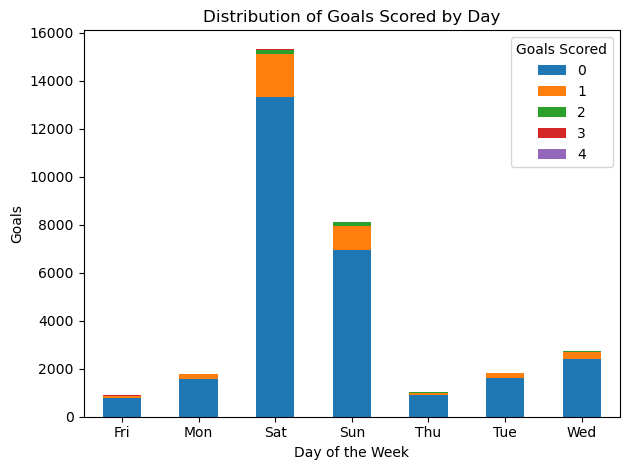

In [22]:
fig, ax = plt.subplots()

goals_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

First of all, we can see that majority of the games are played on either a Saturday or a Sunday which makes sense. Although it may appear that Saturdays and Sundays have a greater proportion of goals scored, this is not the case. It only appears that way because the Sat/Sun bar is quite a bit longer. This is made evident if we produce a similar plot, but this time we plot the proportion of the number of goals scored each day. 

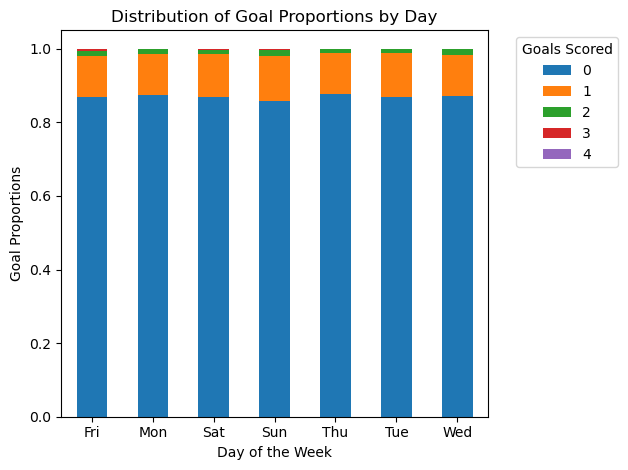

In [23]:
goalprop_by_day = goals_by_day.div(goals_by_day.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it clear that the proportion of goals scored does not really differ across the days. In other words, it doesn't appear that there is any relation between the number of goals scored, and the day the game was played. Another thing we can do to further investigate this is to group the observations by whether or not the game was played on a weekend, or on a weekday. In general, weekend games are much more common, as midweek games only happen in special circumstances such as rearranged fixtures or double gameweeks. Perhaps there is a difference in the number of goals scored when grouping the data in this manner. 

In [24]:
def categorize_day(day):
    if day in ['Sat', 'Sun']:
        return 'Weekend'
    else:
        return 'Weekday'

goalprop_by_daytype = att_explore[['Day', 'Goals']]


/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_21318/1867152727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)


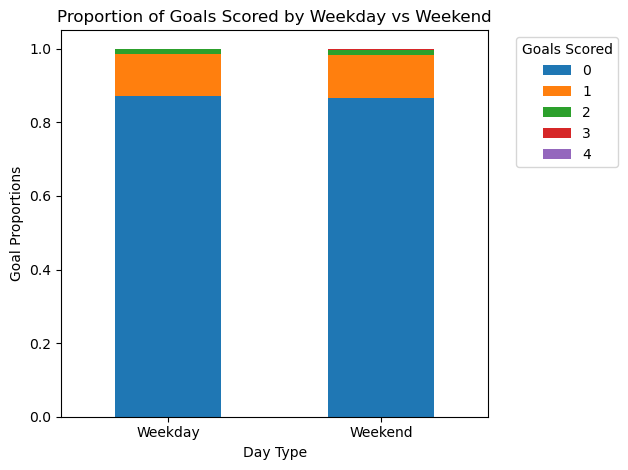

In [25]:
goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)

goals_by_daytype = goalprop_by_daytype.groupby(['DayType', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_daytype = goals_by_daytype.div(goals_by_daytype.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()
goalprop_by_daytype.plot(kind = 'bar', stacked = True, ax = ax)

ax.set_title('Proportion of Goals Scored by Weekday vs Weekend')
ax.set_xlabel('Day Type')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Once again, we can see that the proportion of goals scored by day type is essentially identical. Therefore, there is strong justification to say that the day the game was played does not have any impact on the number of goals scored. If building a model to predict the number of goals scored, we can remove this feature from consideration. 

### 'Matchweek' Feature Exploration

We now have a look at the relationship between goals scored and the matchweek where the game occurred. We don't anticipate there to be much relationship between this feature and the target variable. This is primarily for two reasons. The first reason is that the matchweek isn't necessarily representative of the order in which the games were played in. For example, rearranged games will keep their initial matchweek number (which is the original order of the fixtures when published at the beginning of the season), but may be played in non-consecutive order (so if the matchweek 5 game was rearranged to be played in February instead of September, it will still be classified as matchweek 5). Therefore, the only information that the 'Matchweek' feature is telling us is the initial fixture order. 

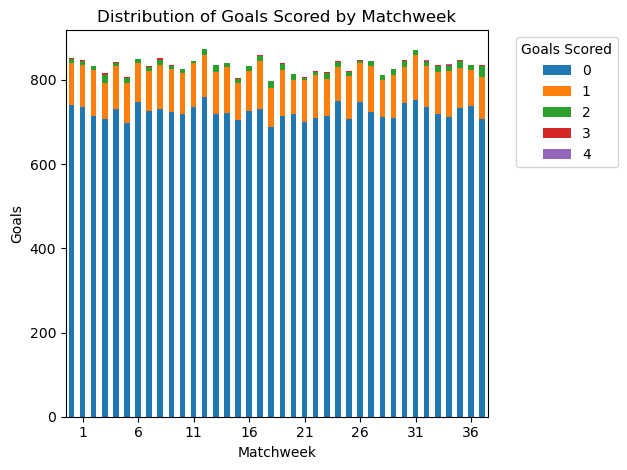

In [26]:
goals_by_matchweek = att_explore.groupby(['Matchweek', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_matchweek.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Matchweek')
ax.set_xlabel('Matchweek')

#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 38, 5))
ax.set_xticklabels(range(1, 38, 5))

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

As expected, there doesn't seem to be any particular relationship betweeen the number of goals scored and the matchweek. As there is no real logical way to categorise or transform the 'Matchweek' feature, we can conclude that this is another feature that is under strong consideration to be removed. 

### 'Venue' Feature Exploration

Our initial expectation is that there may be a relationship between the venue (whether or not the game was played home or away), and the number of goals scored. Typically, we expect teams (and therefore players) to perform better and score more goals when playing at home. Therefore, we expect to see a higher proportion of goals scored for observations that are categorised as playing at home. 

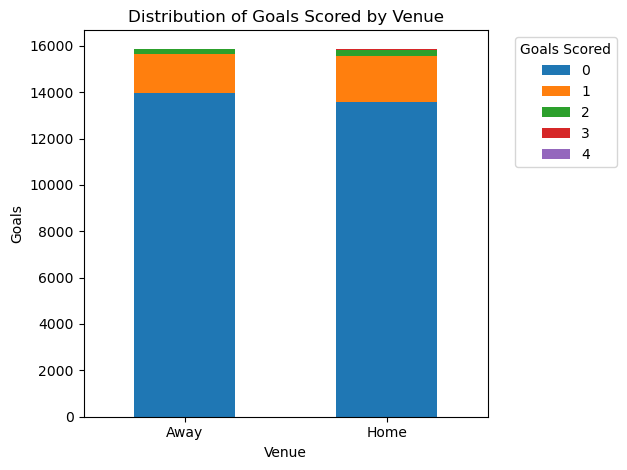

In [27]:
goals_by_venue = att_explore.groupby(['Venue', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_venue.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Venue')
ax.set_xlabel('Venue')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Perhaps surprisingly, we are not seeing any major difference between the number of goals scored at home compared to away from home. The plot does show that slightly more goals are scored at home compared to away, but this difference is perhaps not as pronounced as expected. 

### 'Result' Feature Exploration

In [28]:
att_explore['Result']

10000    L 1–2
24977    L 1–2
37756    D 0–0
18759    D 2–2
168      W 5–0
         ...  
31381    L 0–2
5199     W 3–0
8243     L 1–4
8823     L 0–4
25620    D 1–1
Name: Result, Length: 31738, dtype: object

We can see that the 'Result' feature is currently a dtype object, with information for both the final score (number of goals scored for each team), as well as the final result (win, loss or draw) in the same feature. We want to perhaps separate this feature, so that we can individually explore the relationship between goals scored and the final score/final result. 

In [29]:
#create new dataframe with just result and goals 
att_explore_result = att_explore[['Result', 'Goals']].copy()

#strip the result column of any whitespace, to make it easier to process the string 
att_explore_result.loc[:, 'Result'] = att_explore_result['Result'].str.strip()

#use str.extract method to extract the relevant strings from the result column. the purpose of this is to create two new features (outcome and score)
att_explore_result[['Outcome', 'Score']] = att_explore_result['Result'].str.extract(r'([LWD])\s+(\d+[–-]\d+)')

#drop the result column, as we no longer need this 
att_explore_result = att_explore_result.drop('Result', axis = 1)

#replace the dash in the score column with a hyphen, to make it easier to work with in the future 
att_explore_result['Score'] = att_explore_result['Score'].str.replace('\u2013', '-', regex = True)

att_explore_result.head()

Goals Outcome Score
10000      0       L   1-2
24977      0       L   1-2
37756      0       D   0-0
18759      0       D   2-2
168        0       W   5-0

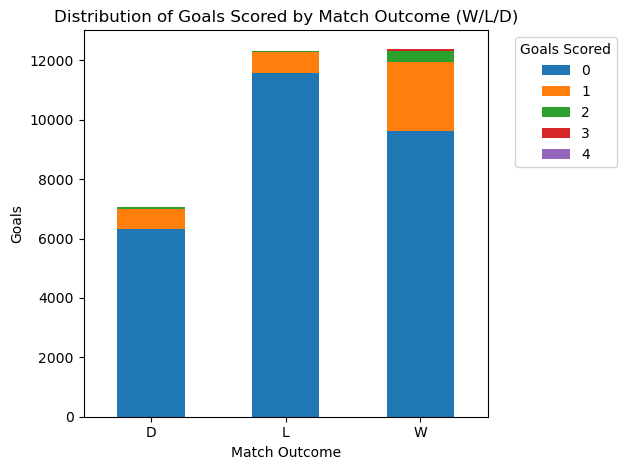

In [30]:
goals_by_outcome = att_explore_result.groupby(['Outcome', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Match Outcome (W/L/D)')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

It is perhaps unsurprising to see that the proportion of goals scored seems to be highest when the match outcome is a Win, compared to when the match outcome is either a Loss or a Draw. We can take a look further at the proportion of goals scored, when categorised by the match outcome. 

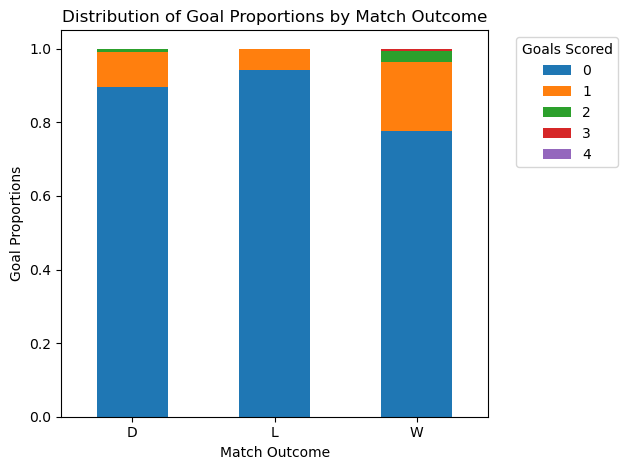

In [31]:
goalprop_by_outcome = goals_by_outcome.div(goals_by_outcome.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Match Outcome')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it even more obvious that the proportion of goals scored is highest when the final outcome is a win. THe lowest proportion of goals scored is when the final outcome is a loss, whilst the proportion of goals scored is in the middle if the final outcome is a draw. Whilst this is useful to know, it doesn't really help with building a model to predict the number of goals scored, as this information is only available 'after' a game has been played. However, it may still be useful to include in the model, because we can then incorporate team strength models to aid with the prediction, i.e. feed into the model the probability that a team will win a particular game (as this will be known prior to the game), and using that to adjust the predictions. 

In [32]:
att_explore_result['Score'].unique()

array(['1-2', '0-0', '2-2', '5-0', '4-1', '3-6', '1-0', '0-3', '0-1',
       '0-4', '2-1', '3-0', '1-1', '3-1', '1-3', '2-0', '2-3', '4-2',
       '1-4', '5-2', '0-2', '3-2', '3-5', '1-5', '4-0', '5-1', '4-3',
       '3-4', '5-3', '0-5', '2-5', '3-3', '1-6', '2-4', '0-9', '4-4',
       '6-1', '0-6', '7-0', '6-0', '6-3', '9-0', '5-4', '0-7', '6-2',
       '8-0', '7-2', '2-6', '4-5', '2-7', '0-8'], dtype=object)

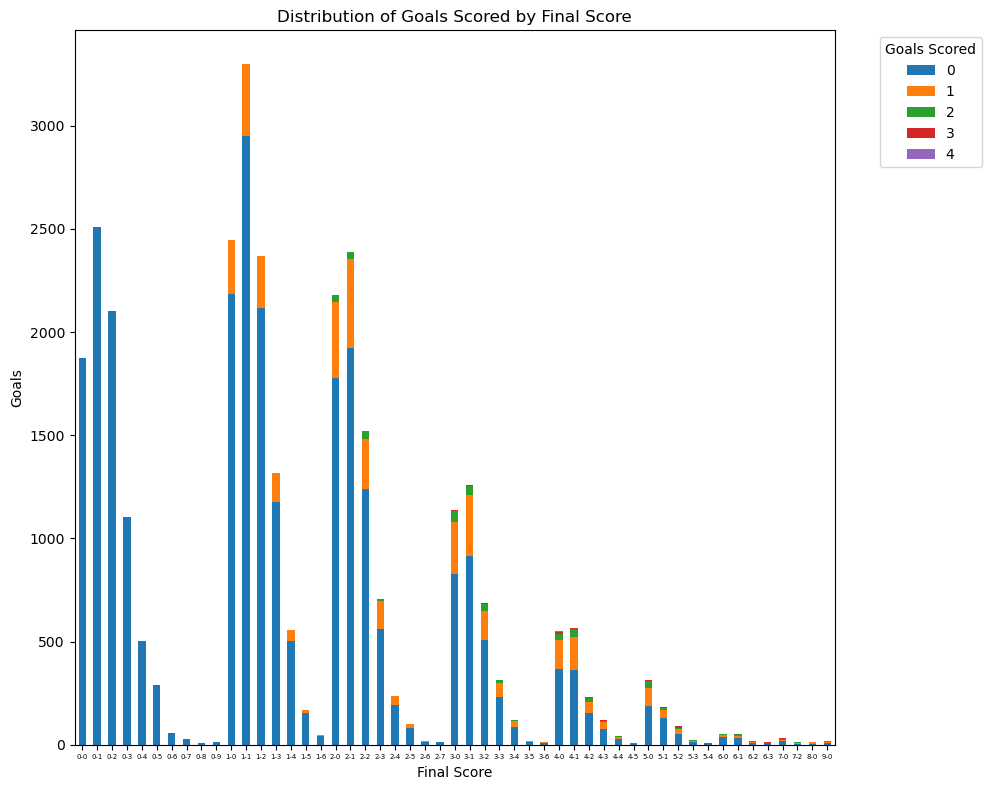

In [33]:
goals_by_score = att_explore_result.groupby(['Score', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

To the left of the plot, we have the results where the teams did not score a goal (0-0 to 0-9). We can try remove these observations, as the fact that the proportion of goals scored is zero when the team did not score any goals is not particularly useful information. 

In [34]:
goals_by_score = goals_by_score.reset_index()
goals_by_score = goals_by_score[~goals_by_score.iloc[:,0].str.split('-').str[0].astype(int).eq(0)]
goals_by_score = goals_by_score.set_index('Score')

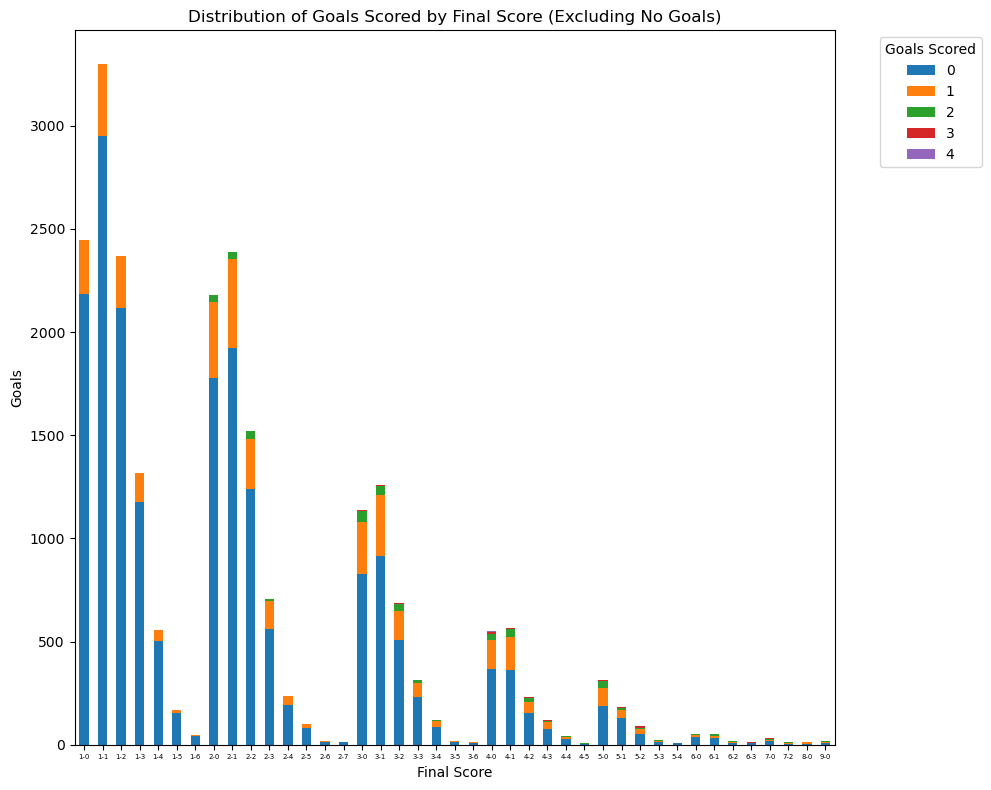

In [35]:
fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score (Excluding No Goals)')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

This plot is quite difficult to read, because of the wide range in the lengths of the bars. Let's plot the proportion of goals scored instead, to help with both readability and interpretability. 

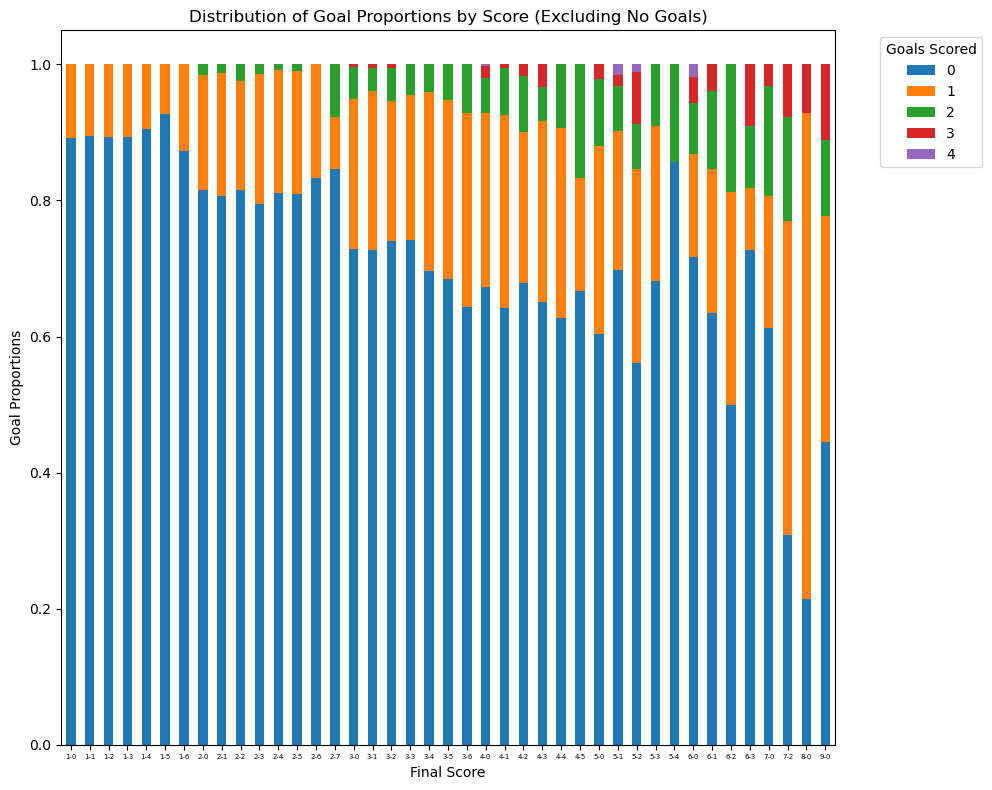

In [36]:
goalprop_by_score = goals_by_score.div(goals_by_score.sum(axis = 1), axis = 0)
fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Score (Excluding No Goals)')
ax.set_xlabel('Final Score')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

The graph clearly shows that as the proportion of goals scored increases as the number of goals your team scores increases. Again, this may not be particularly revalatory, but it is still valuable information. We have the same problem where we don't know the final score prior to the match being played, meaning this feature may not be particularly useful when building the predictive model. However same as before, we can use other models that predict the scores prior to a match being played as information. 

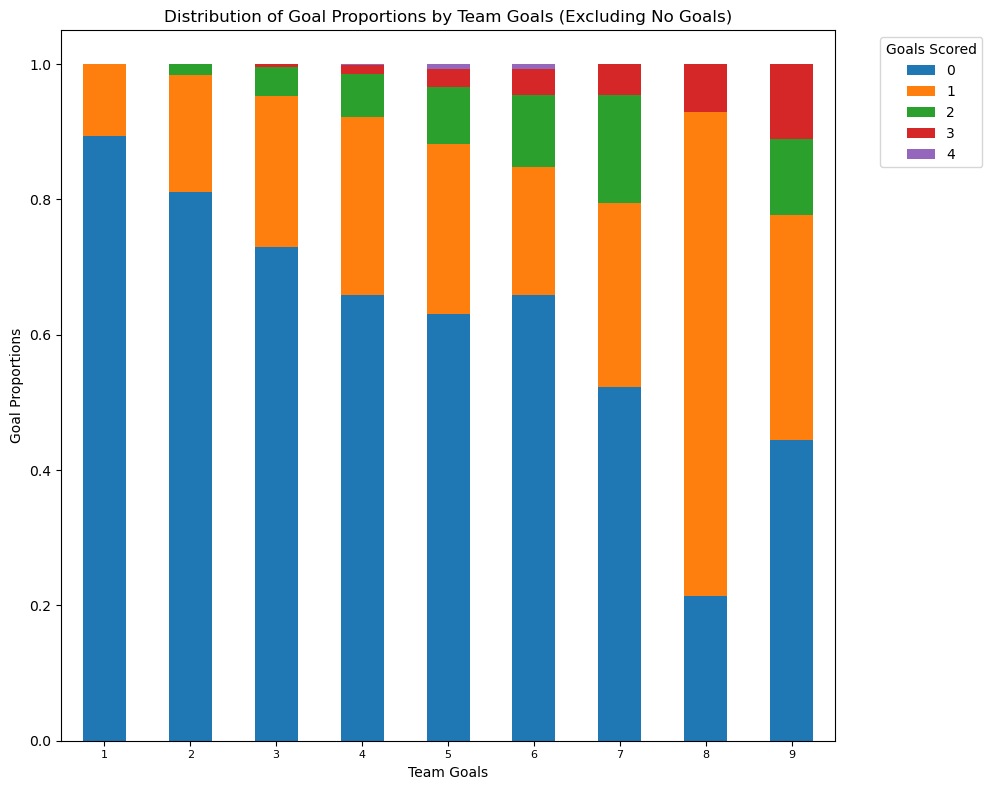

In [37]:
#adding another column called 'Team Goals', which is equivalent to the number of goals scored by the team in a particular match
goals_by_score = goals_by_score.reset_index()
goals_by_score['Team Goals'] = goals_by_score['Score'].str.split('-').str[0]
goals_by_score = goals_by_score.set_index('Score')

#grouping by team goals 
goals_by_teamgoals = goals_by_score.groupby('Team Goals').sum()

#getting the proportion of goals scored when grouped by team goals 
goalprop_by_teamgoals = goals_by_teamgoals.div(goals_by_teamgoals.sum(axis = 1), axis = 0)


fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_teamgoals.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team Goals (Excluding No Goals)')
ax.set_xlabel('Team Goals')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 8)
plt.tight_layout()
plt.show()

Same pattern as identified above. The more goals your team scores in a particular match, the greater the proportion of observations that have goals being scored. 

### 'Team' Feature Exploration

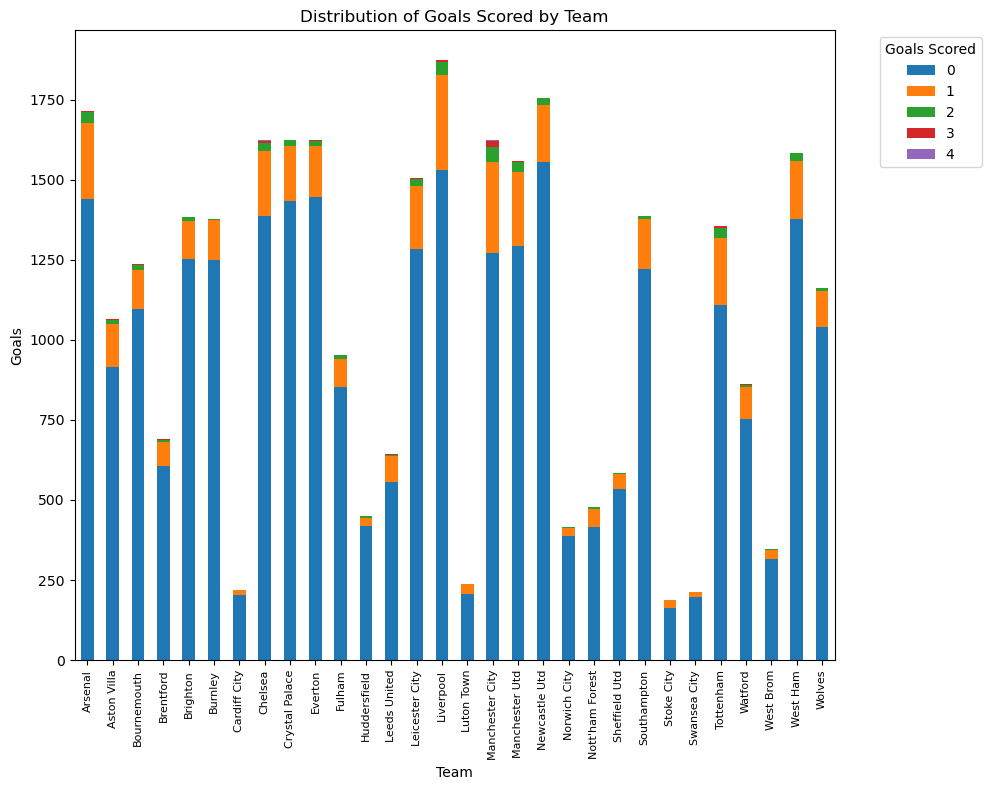

In [38]:
goals_by_team = att_explore.groupby(['Team', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Team')
ax.set_xlabel('Team')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

At first glance, it appears that there are certain teams that are associated with more observations that have goals being scored. Once again, we can instead plot the proportion of goals scored by each team for better interpretability 

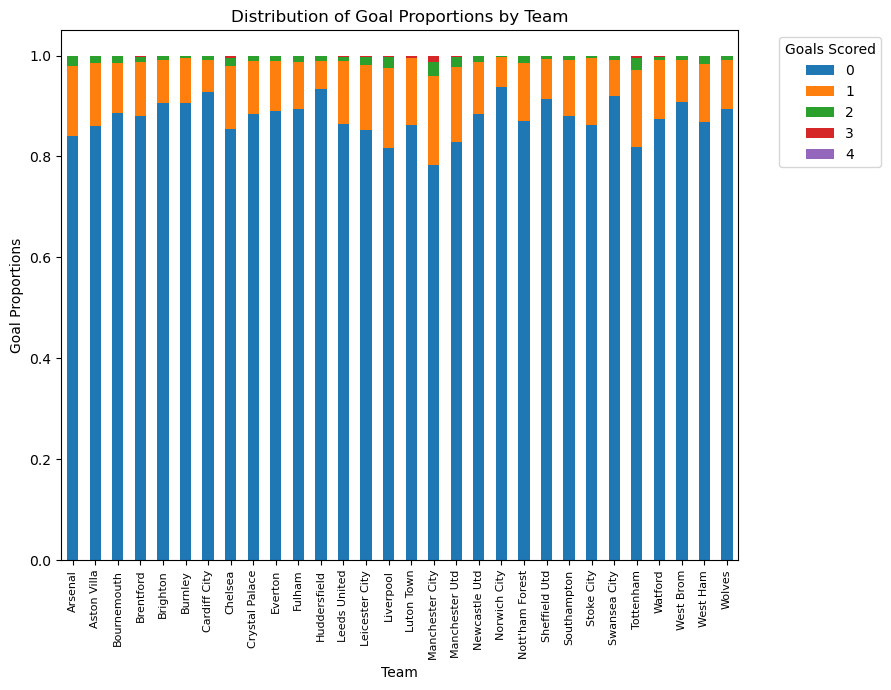

In [39]:
goalprop_by_team = goals_by_team.div(goals_by_team.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team')
ax.set_xlabel('Team')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Can see that teams such as Arsenal, Chelsea, Liverpool, Manchester City and Tottenham have greater proportions of non-zero goal observations. This makes sense because these are considered to be the top teams in the league. This shows us that it is likely that team strength/ability likely plays into the probability that a particular player will score in a given game (the stronger the team, the more likely that they will score). 

### 'Opponent' Feature Exploration

We repeat the above analysis but this time for the opponents faced. Once again, we expect a similar pattern where there will be teams faced that lead to a greater proportion of goals scored. This is because certain teams will be weaker, meaning it is more likely that goals will be scored against them. 

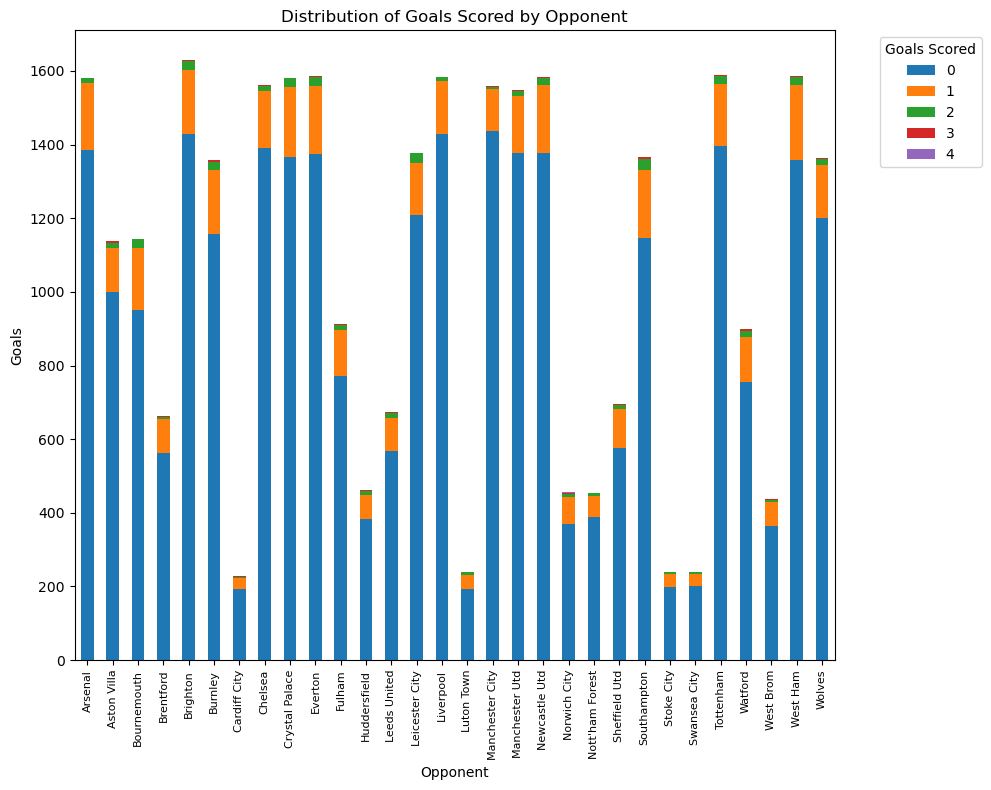

In [40]:
goals_by_opponent = att_explore.groupby(['Opponent', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent')
ax.set_xlabel('Opponent')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

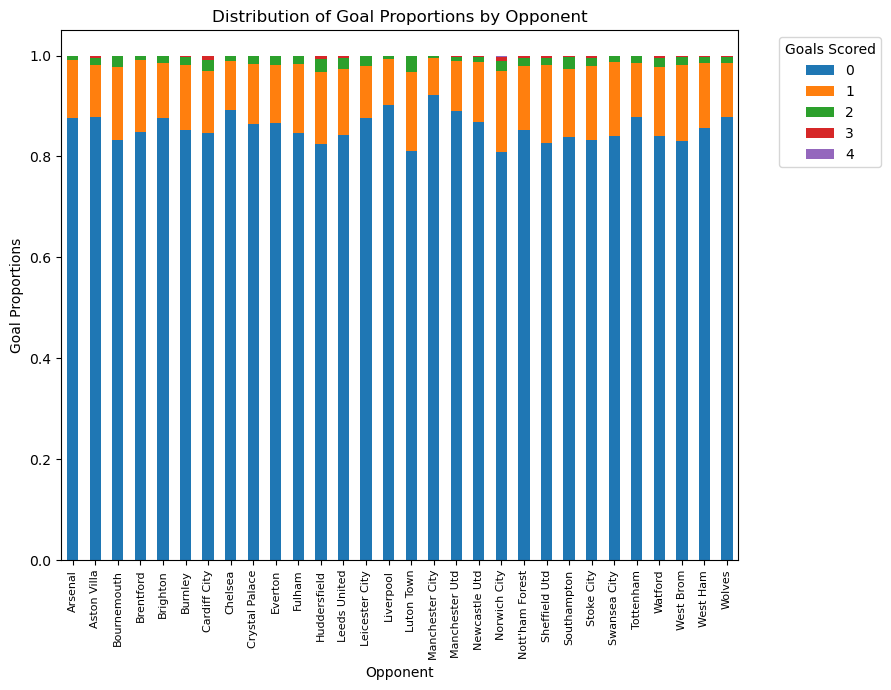

In [41]:
goalprop_by_opponent = goals_by_opponent.div(goals_by_opponent.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent')
ax.set_xlabel('Opponent')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There is definitely some variation, but the effect doesn't seem to be as pronounced as expected. For example, we expect Arsenal to be a better team than Brighton on average, therefore we expect a fewer proportion of goals to be scored when facing Arsenal as an opponent compared to facing Brighton as an opponent. However, the plot above shows that there appears to be a similar proportion of goals scored when facing Arsenal and Brighton. One reason for this is because teams have variation in their performance across the seasons. For example, there are certain seasons where Arsenal are considered to be one of the top teams in the league, but other seasons where they are a much more middling opposition. To investigate this, we can try plot the proportion of goals scored against an opponent based on the opponent's final place in the table at the end of the season. 

In [42]:
def determine_season(date):
    seasons = ('2024-2025', '2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018')
    matching = [s for s in seasons if str(date.year) in s]
    dynamic_timestamp = pd.Timestamp(f'{date.year}-08-01').tz_localize('GMT')
    
    if dynamic_timestamp <= date:
        return(matching[0])
    else: 
        return(matching[1])

In [43]:
#loading prem_table as a dataframe from source
prem_table = pd.read_csv('prem_table.csv', usecols = [1,2,3])

#adding a new column into att_explore which tells us which season a particular observation belongs to 
att_explore['Season'] = att_explore['kickoff_time'].apply(determine_season)

#creating a new dataframe called 'merged', which merges information from the prem_table dataframe and the att_explore dataframe
merged = att_explore.merge(prem_table, left_on = ['Opponent', 'Season'], right_on = ['Team', 'Season'], how = 'left')

#opp_pos is now a list, which we can then attach back onto att_explore 
opp_pos = merged['Position_y'].tolist()
att_explore['Opponent Position'] = opp_pos

We can now plot goals by opponent position, instead of just by opponent

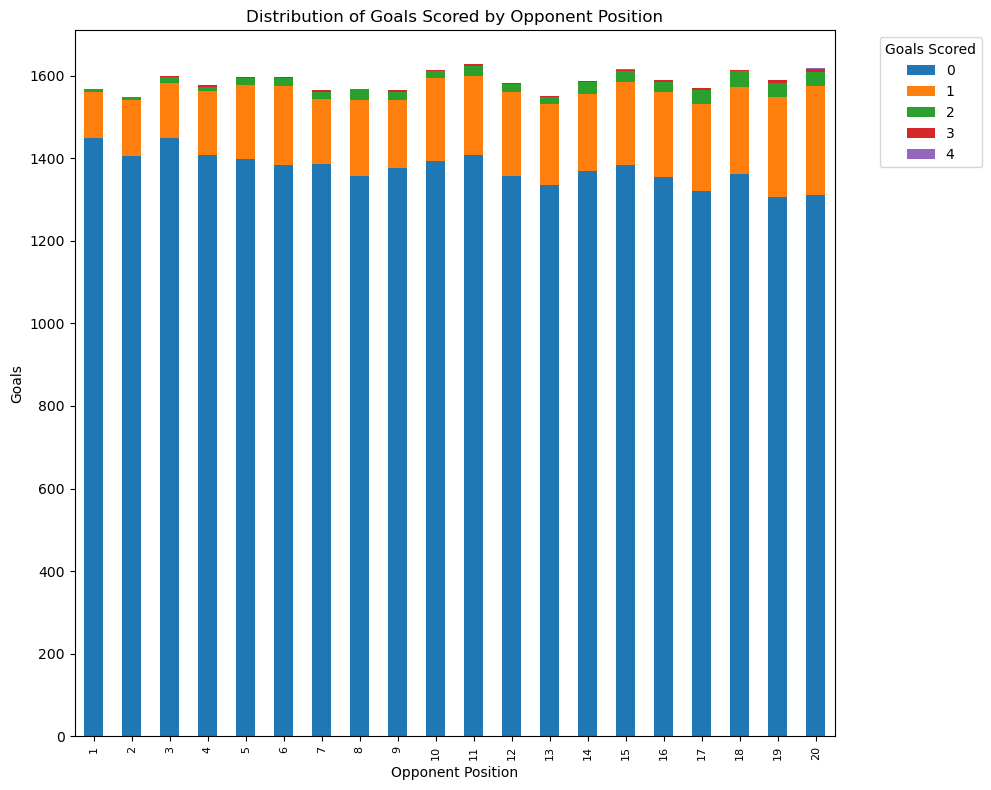

In [44]:
goals_by_opponentpos = att_explore.groupby(['Opponent Position', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent Position')
ax.set_xlabel('Opponent Position')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see a relatively clear pattern that shows that the lower the opponent's final position at the end of the season, the greater the proportion of goals is scored when facing them. This should be made even more clear if we plot the proportion of goals scored by opponent position. 

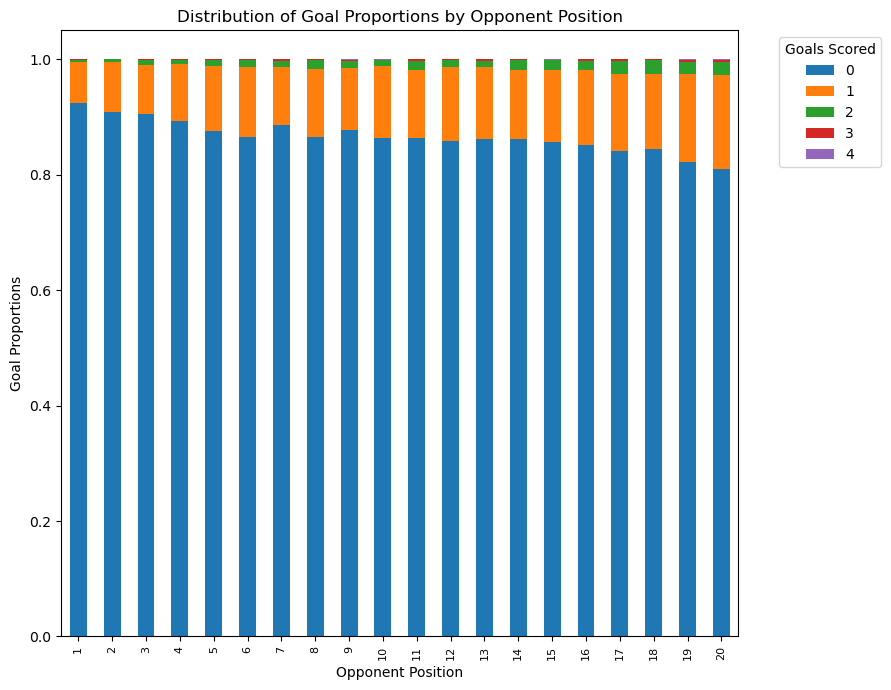

In [45]:
goalprop_by_opponentpos = goals_by_opponentpos.div(goals_by_opponentpos.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent Position')
ax.set_xlabel('Opponent Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

One limitation of this analysis is that it doesn't necessarily capture the ebs and flows that a team goes through throughout a season. For example, the team that ended up finishing 20th might have had a really good start to the season, and were considered to be one of the stronger teams initially. But because of injuries to key players, the team got a lot weaker throughout the season, eventually leading to them finishing 20th. In this case, facing this team at the beginning of the season would've been a much more difficult game than facing them at the end of the season. 

### 'Start' Feature Exploration

'Start' is a feature that tells us whether or not a given player started a game or not. The general consensus is that players that start games are more likely to score. This is because they are generally on the pitch for a longer period of time. 

In [46]:
att_explore['Start'].unique()

array(['Y', 'N', 'Y*'], dtype=object)

We can see that the 'Start' feature has 3 columns. 
* Y = This player started this game 
* N = This player did not start this game 
* Y* = This player started the game as club captain


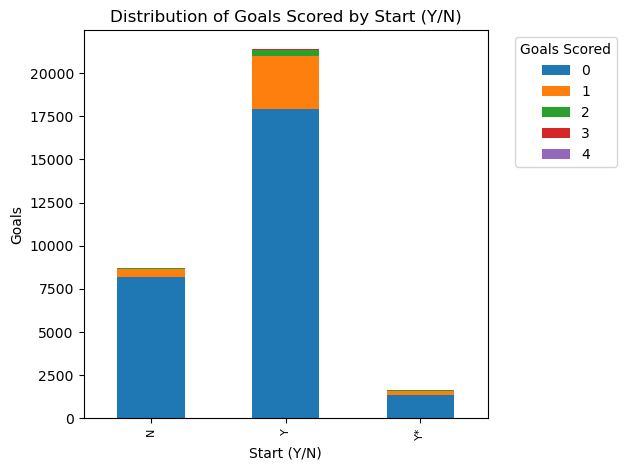

In [47]:
goals_by_start = att_explore.groupby(['Start', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

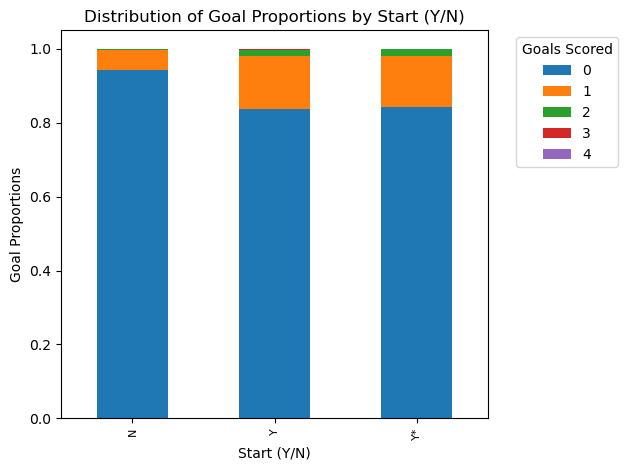

In [48]:
goalprop_by_start = goals_by_start.div(goals_by_start.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There are two key observations, the first is that the proportion observations with goals scored is higher when the player starts a game, compared to if they didn't start the game. This is as expected. The other observation is that it starting the game as the team captain does not necessarily have any effect on the proportion of goals scored. Therefore, we can probably combine the Y and Y* observations together, since being a captain is unlikely to have any effect on the player scoring a goal in a particular game. 

### 'Position' Feature Exploration

In [49]:
positions = att_explore['Position'].unique()
positions

array(['DM', 'LW', 'CM', 'LM', 'FW', 'DM,AM', 'AM', 'RM', 'CM,AM',
       'DM,CM', 'RW', 'FW,RW', 'AM,LW', 'RW,WB', 'RW,LW', 'CM,LM',
       'LM,FW', 'FW,AM', 'RM,CM', 'AM,DM', 'LW,RW', 'RB', 'LW,LM',
       'LM,CM', 'CM,DM', 'RW,RM,WB', 'RM,DM,CM', 'LM,LW', 'AM,CM',
       'WB,LM,CM', 'RM,RW', 'RM,LM,AM', 'RW,LM,CM', 'DM,RB', 'LW,DM',
       'LM,AM', 'CM,DM,AM', 'WB,FW', 'RB,DM,CM,RM', 'FW,LM', 'WB',
       'DM,CM,AM', 'LM,CM,DM', 'CM,RB', 'AM,FW', 'CB', 'DM,RM', 'RW,RM',
       'RM,LB', 'FW,RM', 'LB', 'FW,LW', 'CM,RM', 'AM,LB', 'DM,CB',
       'RW,AM', 'FW,CM', 'CM,RM,WB', 'RM,LM', 'CM,RM,LM', 'RW,FW',
       'LW,CM', 'LW,FW', 'AM,RM', 'FW,AM,LW', 'LW,WB', 'DM,LM',
       'LM,RM,LW', 'WB,AM', 'RB,CM', 'LM,DM', 'AM,RW', 'RM,AM', 'CM,FW',
       'LW,LB', 'LM,RM', 'FW,CM,AM', 'RB,RM', 'RM,FW', 'RW,LW,FW',
       'LW,CB', 'RM,LW', 'RM,LW,AM', 'RM,LM,CM', 'RW,LW,LM', 'LW,AM',
       'FW,RB', 'RB,RM,CM', 'RM,DM', 'CM,LW', 'CM,RW', 'AM,RW,LW',
       'WB,RW', 'LB,RW', 'LB,LW,RW', 'LM,DM,CM'

We can see that there are quite a few unique positions. This is down to the fact that certain observations may be recorded to have played multiple positions in one game. We want to first isolate how many unique positions there are. 

In [50]:
unique_positions = set()

for position in positions:
    for pos in position.split(','):
        unique_positions.add(pos.strip())
        
unique_positions = list(unique_positions)

print(unique_positions)

['WB', 'FW', '0', 'LW', 'CM', 'RW', 'LM', 'CB', 'LB', 'RB', 'RM', 'DM', 'AM']


So we have 12 unique positions, and '0' for some reason. Let's first investigate the observations that have '0' in their position. 

In [51]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

Day  Matchweek Venue Result             Team        Opponent Start  \
7668   Sat         28  Home  L 2–4           Wolves    Leeds United     N   
17110  Tue          1  Home  L 0–1          Burnley  Manchester Utd     N   
3733   Tue          1  Home  L 0–1          Burnley  Manchester Utd     N   
26879  Wed          1  Home  W 2–0  Manchester City     Aston Villa     N   

      Position  Minutes Played  Goals  ...  saves  selected  threat  \
7668         0               0      0  ...      0     16256     0.0   
17110        0              11      0  ...      0     45067    28.0   
3733         0               3      0  ...      0     18618     2.0   
26879        0              19      0  ...      0    272796     6.0   

       total_points  transfers_balance  transfers_in  transfers_out  value  \
7668             -3                -92           423            515     48   
17110             1               -428          2482           2910     48   
3733              1              -1092           120           1212     58   
26879             1             -29133         14713          43846     81   

          Season  Opponent Position  
7668   2022-2023                 19  
17110  2020-2021                  2  
3733   2020-2021                  2  
26879  2020-2021                 11  

[4 rows x 109 columns]

From looking at these games individually, we can manually fill in the positions played by these players. 

* 7668 - Player Sent Off on Bench 
* 17110 - FW
* 3733 - FW
* 26879 - RW

So we will remove observation 7668, since this player did not play

In [52]:
att_explore = att_explore.drop(index = 7668)

In [53]:
att_explore.loc[17110, 'Position'] = 'FW'
att_explore.loc[3733, 'Position'] = 'FW'
att_explore.loc[26879, 'Position'] = 'RW'

We can now confirm that there are no longer any observations that have '0' entry in Positions 

In [54]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

Empty DataFrame
Columns: [Day, Matchweek, Venue, Result, Team, Opponent, Start, Position, Minutes Played, Goals, Assists, Penalties Scored, Penalties Attempted, Shots, Shots on Target, Yellow Cards, Red Cards, Touches, Tackles, Interceptions, Blocks, xG, npxG, xAG, Shot Creating Actions, Goal Creating Actions, Passes Completed, Passes Attempted, Progressive Passes, Carries, Progressive Carries, Take-ons Attempted, Successful Take-ons, Passing Distance, Progressive Passing Distance, Short Passes Completed, Short Passes Attempted, Medium Passes Completed, Medium Passes Attempted, Long Passes Completed, Long Passes Attempted, Expected Assists, Key Passes, Passes into Final Third, Passes into Penalty Area, Crosses into Penalty Area, Live Pass, Dead Pass, Free Kick Pass, Through Balls, Switches, Crosses, Throw Ins Taken, Corners Taken, Passes Offside, Live SCA, Deadball SCA, Take-on SCA, Shot SCA, Foul SCA, Defense SCA, Live GCA, Deadball GCA, Take-on GCA, Shot GCA, Foul GCA, Defense GCA, Tackles Won, Defensive Third Tackles, Middle Third Tackles, Attacking Third Tackles, Dribblers Tackled, Dribblers Tackled Attempts, Challenges Lost, Shots Blocked, Passes Blocked, Clearances, Defensive Errors, Defensive Penalty Area Touches, Defensive Third Touches, Middle Third Touches, Attacking Third Touches, Penalty Area Touches, Carry Distance, Progressive Carry Distance, Final Third Carries, Carries into Penalty Area, Miscontrols, Dispossessed, Passes Received, Progressive Passes Received, bonus, bps, clean_sheets, creativity, ict_index, influence, kickoff_time, own_goals, saves, ...]
Index: []

[0 rows x 109 columns]

One issue with the data is that we don't know how many minutes of a game were played in each position, for a player that has been listed as playing multiple positions in a game. For example, if a player is played in the FW position for 85 minutes of the game, before tactical adjustments mean that they play in the LB position for the remainder of the game, the data might be skewed to show that LB's have better attacking potential than what it may be in reality. Unfortunately, there isn't any data that allows us to input the 'primary' position of a player in a particular game. Therefore, the best way to proceed at this stage is to first one-hot encode the position column. 

In [55]:
positions = att_explore['Position']

positions_df = pd.DataFrame(positions, columns = ['Position'])

positions_encode = positions_df['Position'].str.get_dummies(sep = ',')

In [56]:
print(positions_encode)

       AM  CB  CM  DM  FW  LB  LM  LW  RB  RM  RW  WB
10000   0   0   0   1   0   0   0   0   0   0   0   0
24977   0   0   0   0   0   0   0   1   0   0   0   0
37756   0   0   1   0   0   0   0   0   0   0   0   0
18759   0   0   0   0   0   0   1   0   0   0   0   0
168     0   0   0   0   0   0   1   0   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
31381   0   0   1   1   0   0   1   0   0   0   0   0
5199    0   0   0   0   0   0   0   1   0   0   0   0
8243    0   1   0   0   0   0   0   0   0   0   0   0
8823    0   0   0   0   0   0   0   0   0   0   1   0
25620   0   0   0   0   0   0   0   0   0   0   1   1

[31737 rows x 12 columns]


It appears that the encoding worked, just to double check, we want to make sure that there is a 1 in every single observation. 

In [57]:
positions_encode.any(axis = 1).sum()

31737

Now that we are sure that the encoding was successful, we want to append these columns back into the att_explore dataframe, as well as remove the 'Position' dataframe 

In [58]:
att_explore = pd.concat([att_explore, positions_encode], axis = 1)
att_explore.head()

Day  Matchweek Venue Result             Team         Opponent Start  \
10000  Sun         32  Away  L 1–2   Crystal Palace   Leicester City     Y   
24977  Sat         29  Away  L 1–2      Bournemouth        Liverpool     N   
37756  Sun         37  Away  D 0–0     Huddersfield  Manchester City     Y   
18759  Sun         34  Away  D 2–2      Southampton         Brighton     N   
168    Sun         38  Home  W 5–0  Manchester City     Norwich City    Y*   

      Position  Minutes Played  Goals  ...  CM  DM  FW  LB  LM  LW  RB  RM  \
10000       DM              90      0  ...   0   1   0   0   0   0   0   0   
24977       LW              23      0  ...   0   0   0   0   0   1   0   0   
37756       CM              90      0  ...   1   0   0   0   0   0   0   0   
18759       LM              25      0  ...   0   0   0   0   1   0   0   0   
168         LM              84      0  ...   0   0   0   0   1   0   0   0   

       RW  WB  
10000   0   0  
24977   0   0  
37756   0   0  
18759   0   0  
168     0   0  

[5 rows x 121 columns]

Let's now have a look to see the frequency of each of the position encoded columns

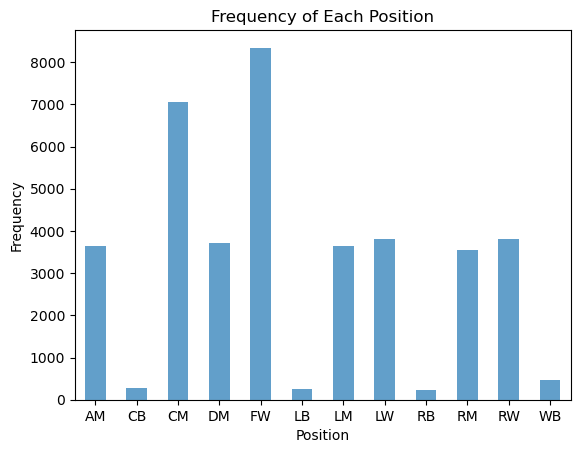

In [59]:
#these are the columns in att_explore that represent the positions that a given observation played in that game 
position_col = ['AM', 'CB', 'CM', 'DM', 'FW', 'LB', 'LM', 'LW', 'RB', 'RM', 'RW', 'WB']

position_count = att_explore[position_col].sum()

fig, ax = plt.subplots()

position_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Position')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Each Position')
plt.xticks(rotation = 0)
plt.show()

Initial observations are there are very few players with positions listed as CB, LB, RB or WB. This makes a lot of sense, because we are currently only working with the attackers data. It wouldn't make much sense if there were comparable amounts of observations with these positions listed, compared to actual attacking positions such as FW. In contrast, the most frequent position was FW, which also makes sense. Let's now take a look at how the proportion of goals scored differs across each position. 

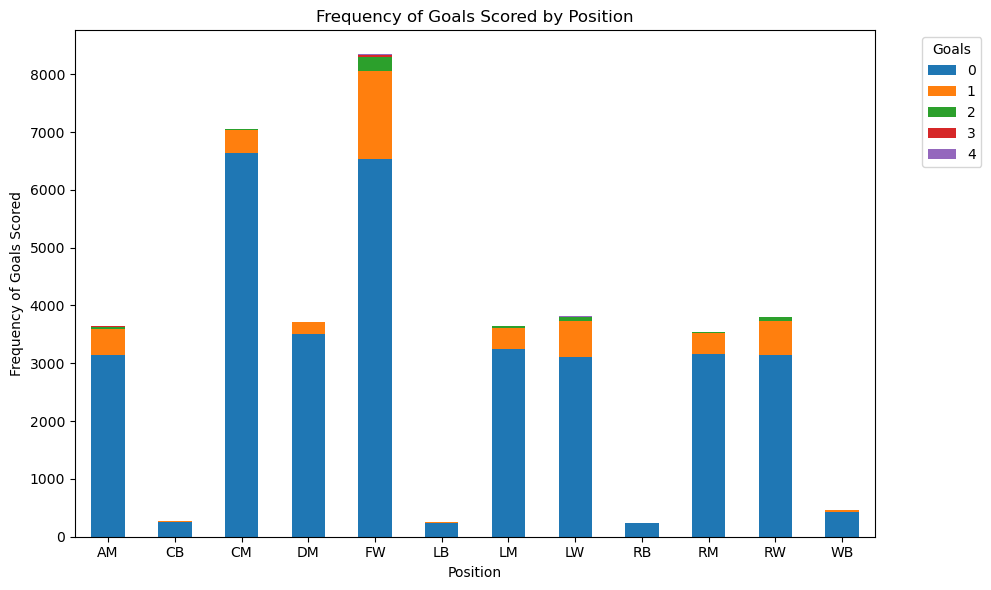

In [60]:
# Initialize a dictionary to store frequency of goal counts by position
goal_counts_by_position = {position: {} for position in position_col}  # Exclude 'Goals'

# Loop through each position column
for position in position_col:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_by_position[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_bypos_df = pd.DataFrame(goal_counts_by_position).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_bypos_df = goal_counts_bypos_df.T

# Plotting
goal_counts_bypos_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Position')
plt.ylabel('Frequency of Goals Scored')
plt.title('Frequency of Goals Scored by Position')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Goals', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

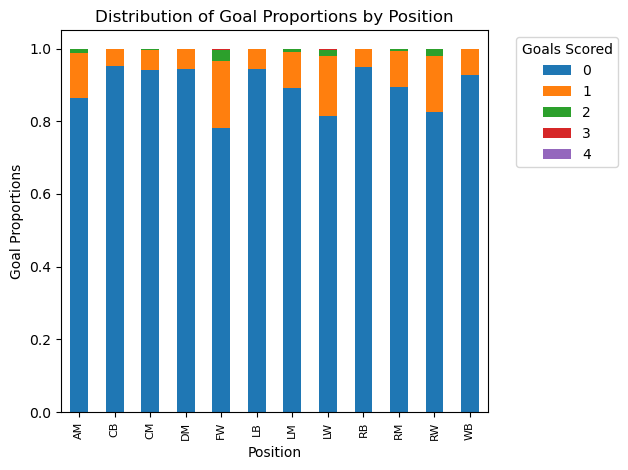

In [61]:
goalprop_by_position = goal_counts_bypos_df.div(goal_counts_bypos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_position.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

It is interesting that the proportion of goals scored seems to be quite even for CB, CM, DM, LB, RB and WB. Although it was expected that the proportion of goals scored when the listed position is CB, LB, RB and WB should be low, it was unexpected that the proportion of goals is also so low for both DM's and CM's. It is also not unexpected to see that the proportion of goals scored is highest for FW, followed by RW/LW, then AM, then RM/LM. We can now try to group certain positions together to see whether similar behaviours are exhibited. 

* RB, LB, CB, WB - Defenders
* DM, CM - Midfielders
* LM, RM - Wide Midfielders 
* AM - Attacking Midfielders
* LW, RW - Wide Forwards 

In [62]:
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB', 'WB']].any(axis = 1).astype(int)
print(att_explore['Defenders'])

10000    0
24977    0
37756    0
18759    0
168      0
        ..
31381    0
5199     0
8243     1
8823     0
25620    1
Name: Defenders, Length: 31737, dtype: int64


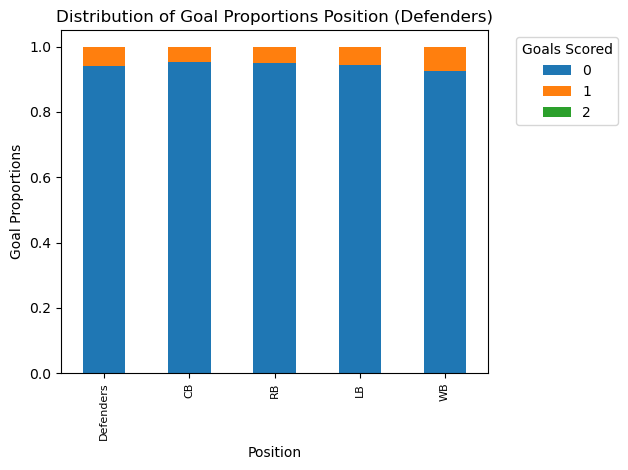

In [63]:
position_def = ['Defenders', 'CB', 'RB', 'LB', 'WB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the plot above, it appears that having WB as a position makes it more likely that a goal is scored, compared to playing as a CB/LB/RB. We can try to instead include only CB, RB and LB into the 'Defenders' category. Based on contextual information, this does make a bit more sense. WB's are typically used in 3 at the back formations, where they function as defenders out of possession, but are almost wingers in possession as they get high and wide on the pitch to provide the width. This is in comparison to typical CB/RB/LB's who are defenders both in and out of possession, and will rarely venture forward in the attack. 

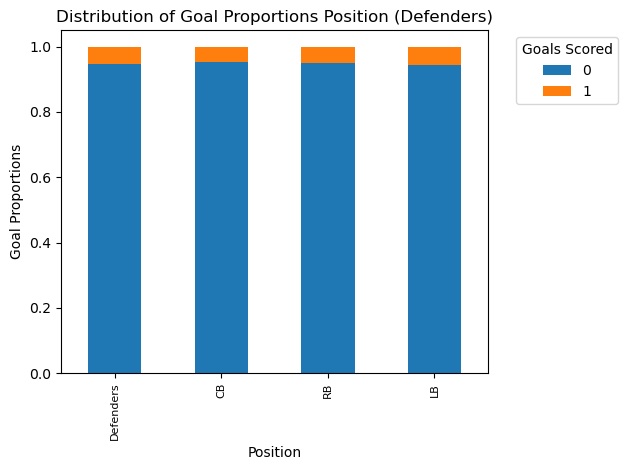

In [64]:
#we modify the 'Defenders' column to only include 'RB', 'LB' and 'CB'
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB']].any(axis = 1).astype(int)

position_def = ['Defenders', 'CB', 'RB', 'LB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see this time that the proportion of goals scored by Defenders (either CB, LB or RB) is closer to the proportion of goals scored when looking at the specific defensive positions. We can now move on to looking at midfielders. 

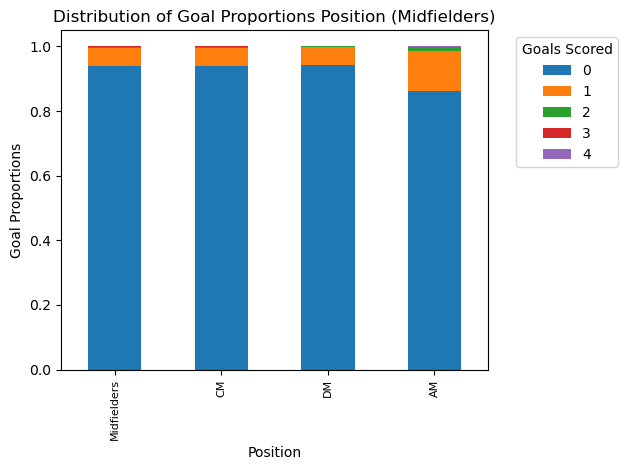

In [65]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Midfielders'] = att_explore[['CM', 'DM']].any(axis = 1).astype(int)

position_mid = ['Midfielders', 'CM', 'DM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_mid = {position: {} for position in position_mid}  # Exclude 'Goals'

# Loop through each position column
for position in position_mid:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_mid[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_mid_df = pd.DataFrame(goal_counts_mid).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_mid_df = goal_counts_mid_df.T

goalprop_mid = goal_counts_mid_df.div(goal_counts_mid_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_mid.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

As expected, the proportion of goals scored in the Midfielders category is similar to the proportion when looking at CM and DM positions individually. Therefore, it makes sense to combine these two categories. We can also see that attacking midfielders AM seem to score a lot more goals than either CM's or DM's, so it wouldn't make sense to include AM's into the Midfielders category. We now move onto Wide Midfielders.

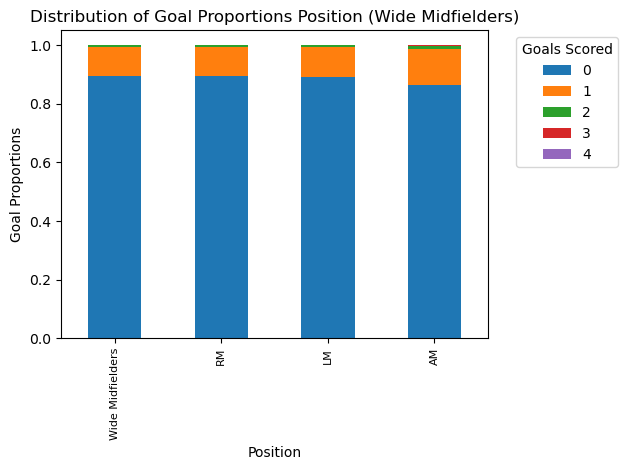

In [66]:
#we group CM and DM into one category called ' Wide Midfielders'
att_explore['Wide Midfielders'] = att_explore[['RM', 'LM']].any(axis = 1).astype(int)

position_wm = ['Wide Midfielders', 'RM', 'LM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wm = {position: {} for position in position_wm}  # Exclude 'Goals'

# Loop through each position column
for position in position_wm:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wm[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wm_df = pd.DataFrame(goal_counts_wm).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wm_df = goal_counts_wm_df.T

goalprop_wm = goal_counts_wm_df.div(goal_counts_wm_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wm.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wide Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Again, similar result where the plot shows that combining these two categories appears to make sense. We can also see that attacking midfielders seem to score more goals than wide midfielders, so it wouldn't make sense to include AM into this category. Finally, we will do the wingers/wide forwards. 

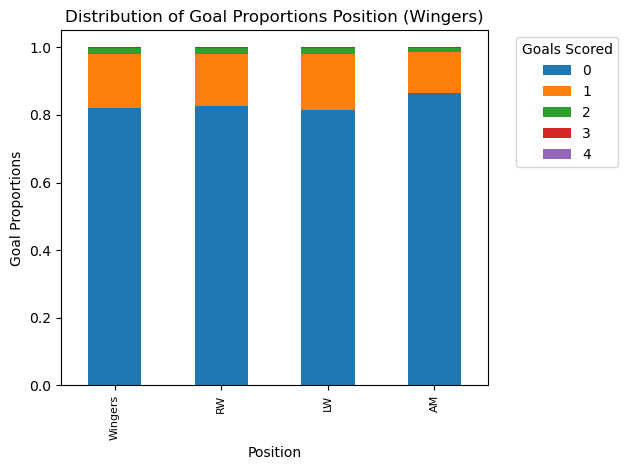

In [67]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Wingers'] = att_explore[['RW', 'LW']].any(axis = 1).astype(int)

position_wingers = ['Wingers', 'RW', 'LW', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wingers = {position: {} for position in position_wingers}  # Exclude 'Goals'

# Loop through each position column
for position in position_wingers:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wingers[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wingers_df = pd.DataFrame(goal_counts_wingers).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wingers_df = goal_counts_wingers_df.T

goalprop_wingers = goal_counts_wingers_df.div(goal_counts_wingers_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wingers.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wingers)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see that the proportion of goals scored when looking at RW and LW individually is very simila to the proportion of goals scored when combining these observations under one category 'Wingers'. Therefore, it makes sense to combine LW and RW together. We can also see that AM's seem to score less goals than wingers, so it wouldn't make sense to include it into the Wingers category. Overall, the AM category should be a standalone category. 

Let's now plot the combined categories together

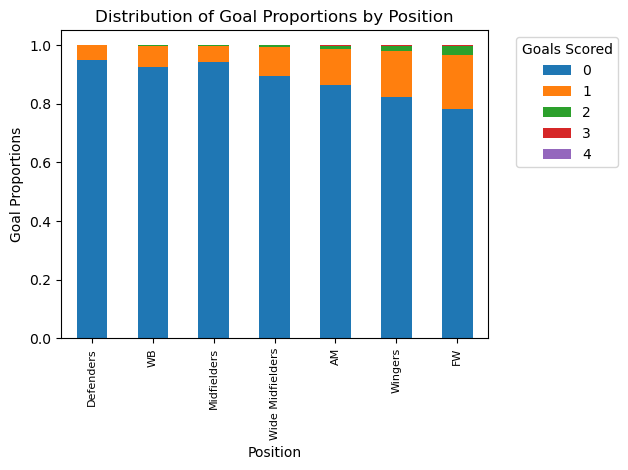

In [68]:
position_final = ['Defenders', 'WB', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_finalpos = {position: {} for position in position_final}  # Exclude 'Goals'

# Loop through each position column
for position in position_final:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_finalpos[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_finalpos_df = pd.DataFrame(goal_counts_finalpos).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_finalpos_df = goal_counts_finalpos_df.T

goalprop_finalpos = goal_counts_finalpos_df.div(goal_counts_finalpos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_finalpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the summarised positions, we can clearly see that the proportion of goals scored is lowest for Defenders, followed closely by Midfielders. Perhaps surprisingly, the proportion of goals scored by WB's is higher than Midfielders, which is then followed by Wide Midfielders. As Wingers and Forwards play furthest up the pitch, it makes sense that the proportion of goals scored is highest for these two positions. To summarise, the hypothesised method of combining positions makes sense, based on the exploratory analysis. 

### 'Minutes Played' Feature Exploration

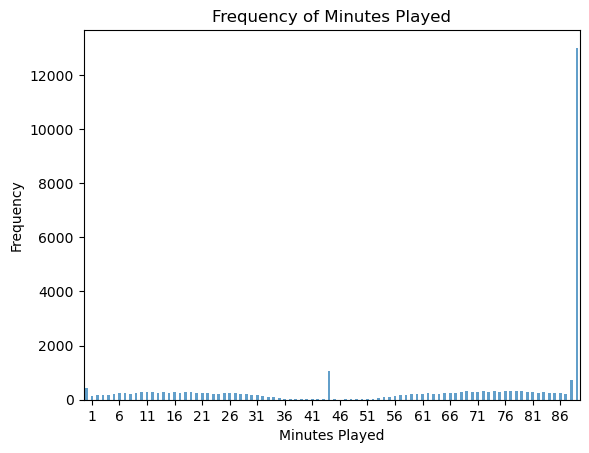

In [69]:
mins_count = att_explore['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is that majority of the observations in the data set played the full 90 minutes of the game. It may be a little difficult to see the behaviour of the other 'Minutes Played' due to how long the bar for 'Minutes Played' = 90 is. We can exclude this bar from the plot to better visualise the frequency of 'Minutes Played'. 

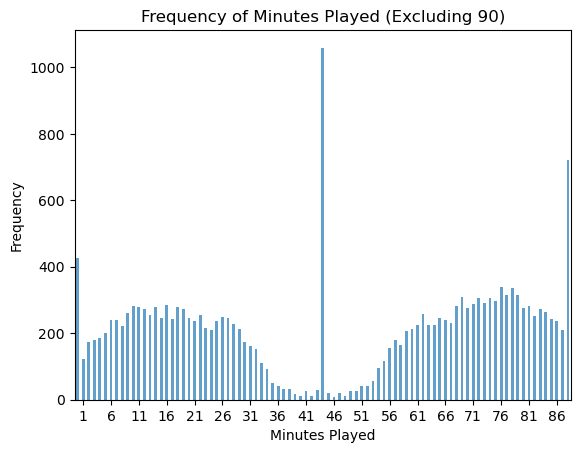

In [70]:
mins_count = mins_count.iloc[:-1]
fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (Excluding 90)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 89, 5))
ax.set_xticklabels(range(1, 89, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is some sort of symmetry between the left hand side of the plot and the right hand side of the plot. The most frequent minutes played excluding 90 minutes is 44/45 minutes, which refers to the observations that either played the first half and got subbed, or got subbed on the play the second half. The symmetry has to do with the fact that for each player being subbed off, there is another being subbed on. For example, if a observation played 70 minutes and got subbed off, then another observation would be subbed on to play 20 minutes. Based on this, we can see that the most frequent substitutions are approximately between the 68 to 78 minute mark. Subsitutions are quite rare between 46 and 56. Based on this, we can perhaps classify 'Minutes Played' as either:

1. 90 Minutes - Full Match Played
2. 46-89 Minutes - Substituted Off
3. 1-44 Minutes - Substituted On

However prior to this, we should first plot the raw 'Minutes Played' data against 'Goals Scored' to visualise the relationship. Since 'Minutes Played' is essentially a continuous variable (it isn't actually, but we can treat it as such), it wouldn't be wise to visualise the relationship between this feature and the target variable in the same way that we have done for the previous features. Instead, we can start by constructing a box plot. This should allow us to identify the distribution of Minutes Played for each category of Goals. 

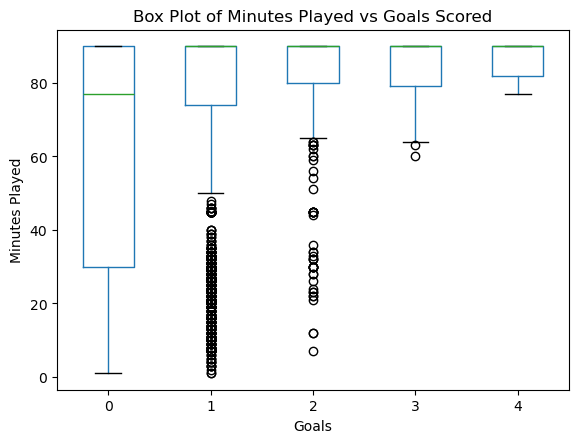

In [71]:
plt.figure
att_explore.boxplot(column = 'Minutes Played', by = 'Goals', grid = False)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

What we can immediately identify is that the median minutes played is 90 (i.e. the player both started and finished the game) for all observations that contained at least 1 goal scored. We can also see that although the lower extreme for 1 goal scored is at approximately 50 minutes, there are quite a few observations where the minutes played is less than 50, but the player still managed to score a goal. A similar phenomenon can be seen for observations where 2 goals were scored, albeit less frequently. What may be useful is to separate the observations that played 90 minutes, and those that didn't. In other words, we can have a look at whether or not the behaviour of goals scored differs for players that played the whole game, and players that were either substituted on or off during the game. 

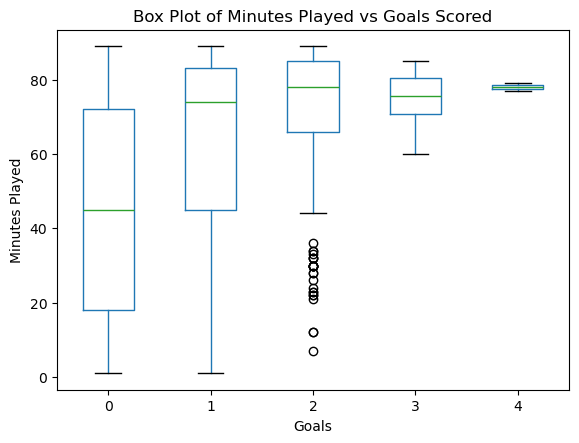

In [72]:
#new dataframe that excludes all observations where 'Minutes Played' == 90
subs_df = att_explore[att_explore['Minutes Played'] != 90]
subs_df = subs_df[['Minutes Played', 'Goals', 'Start']]

plt.figure
subs_df.boxplot(column = 'Minutes Played', by = 'Goals', grid = False)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

This plot makes it clear that of the players that did not play 90 minutes, the ones who scored at least one goal generally played more than 70 minutes. Although there are still some outliers, particularly in the observations that scored 2 goals, there appears to be sufficient justification that more minutes leads to a greater probability of scoring a goal. 

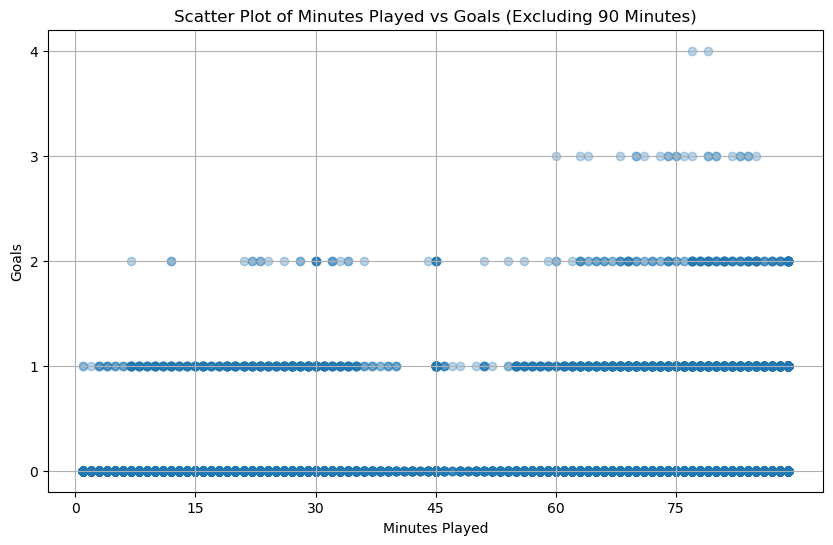

In [73]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()
plt.show()

This scatter plot is interesting for a few reasons. Firstly, we can see that there is quite an even distribution of observations that did not score any goals in terms of minutes played. However for the observations that scored 1 goal, there appears to be quite a bit more observations that played less than 45 minutes (i.e. they were subbed on) than perhaps expected. We can see this even more clearly if we reproduce the same plot, but change the colour of the observations that did not start the game (if they did not start but still played, this means that they were subbed on). 

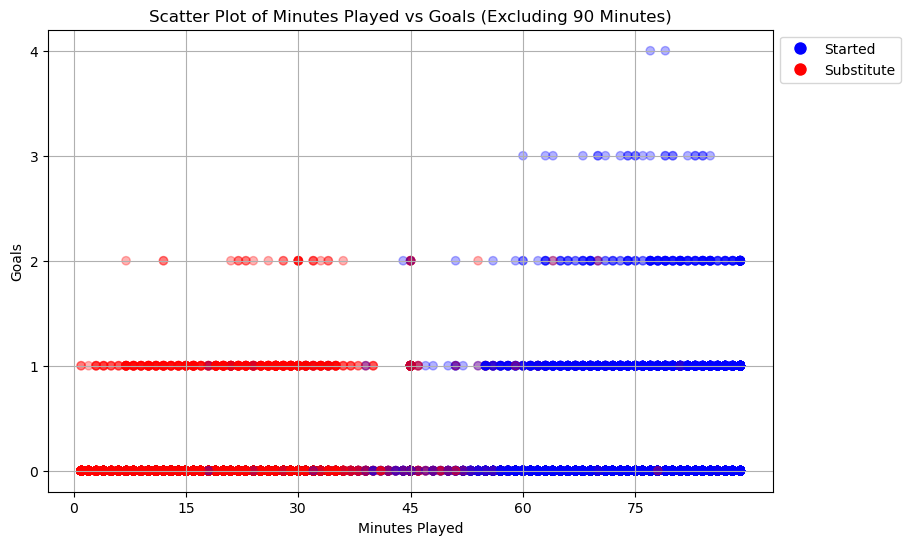

In [74]:
# Scatter plot - Colour coded based on 'Start'

subs_col = subs_df['Start'].map({'Y': 'blue', 'Y*': 'blue', 'N': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3, c = subs_col)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Started', 
                            markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Substitute', 
                            markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor = (1,1))
plt.subplots_adjust(right = 0.85)
plt.show()

This plot makes clear that it is much more likely that a given observation scores 2 or more goals if they started the game compared to if they were subbed on. This information was perhaps already made obvious when looking at the relationship between the 'Starts' feature and 'Goals'. However, it is interesting that there appears to be quite an even spread of observations which scored one goal, in terms of whether or not they started the game or not, as well as the number of minutes they played. We can make another plot to further investigate this. 

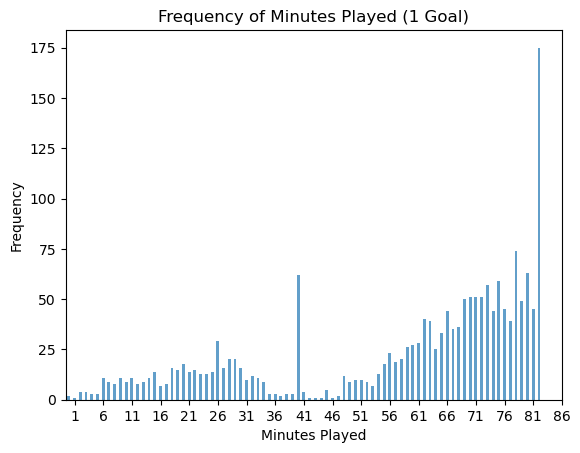

In [75]:
#we are further reducing the dataframe to only include observations that scored one goal
subs_df = subs_df[subs_df['Goals'] == 1]

mins_count_1goal = subs_df['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count_1goal.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (1 Goal)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

This plot does make it more clear that it is more likely for players that scored 1 goal to play more than 45 minutes, compared to the likelihood that they played less than 45 minutes. This was not particularly noticeable when looking at the scatter plot, which is why the bar plot was used to further investigate. In general, there is some uncertainty regarding whether or not the 'Minutes Played' feature and the 'Starts' feature are actually communicating the same information. 

### Assists Feature Exploration

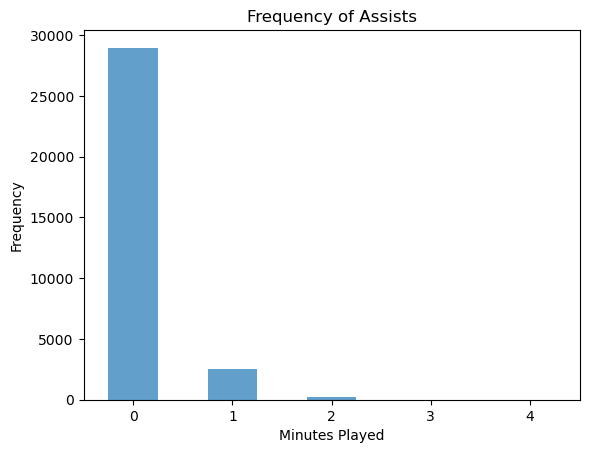

In [76]:
assists_count = att_explore['Assists'].value_counts().sort_index()

fig, ax = plt.subplots()

assists_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Assists')

plt.xticks(rotation = 0)
plt.show()

Majority of the observations have no assists. The next most frequent is 1 assist, followed by two assists. We now have a look at the relationship between 'Assists' and 'Goals'. 

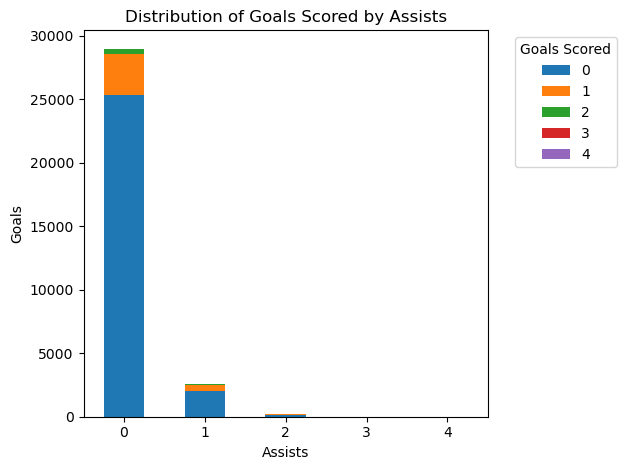

In [77]:
goals_by_assists = att_explore.groupby(['Assists', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Assists')
ax.set_xlabel('Assists')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

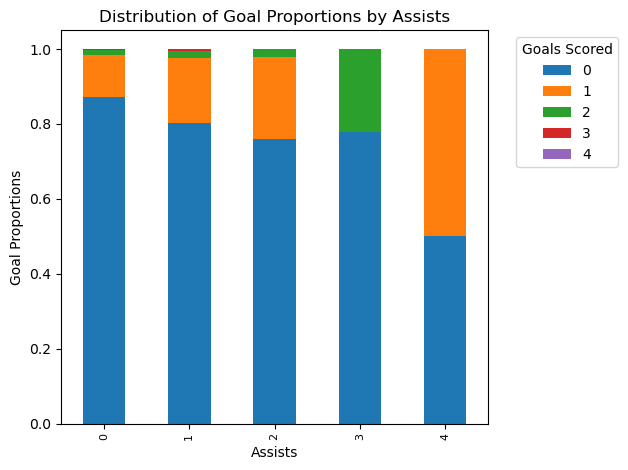

In [78]:
goalprop_by_assists = goals_by_assists.div(goals_by_assists.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Assists')
ax.set_xlabel('Assists')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

First off, it is almost remarkable that 50% of observations with 4 assists have also scored in the same game. This is most likely due to there being very few observations with 4 assists. We can show this below. There are only two observations in the entire dataset that have 4 assists. One of those observations also recorded a goal in the same game, thus leading to what could be seen in the plot above. What is perhaps even more remarkable is that this observation was recorded as playing in a WB position!

In [79]:
att_explore[att_explore['Assists'] == 4]

Day  Matchweek Venue Result             Team      Opponent Start  \
31293  Sat          1  Home  W 5–1   Manchester Utd  Leeds United     Y   
23586  Sat         11  Home  W 6–1  Manchester City   Bournemouth     Y   

      Position  Minutes Played  Goals  ...  LM  LW  RB  RM  RW  WB  Defenders  \
31293       LW              74      0  ...   0   1   0   0   0   0          0   
23586       WB              90      1  ...   0   0   0   0   0   1          0   

       Midfielders  Wide Midfielders  Wingers  
31293            0                 0        1  
23586            0                 0        0  

[2 rows x 125 columns]

Other than this, it can be seen that a larger number of assists corresponds to a greater proportion of goals being scored. The reason for this is unclear. Perhaps this has to do with the fact that attacking players are generally more likely to contribute both goals and assists? This was actually an unexpected discovery, as I would've previously hypothesised there to be no relationship between goals scored and assists. However, one major reason to be skeptical of these plots is the fact that there are very few observations that have either 2 or 3 assists. This can be seen below. 

In [80]:
att_explore[att_explore['Assists'] == 3]

Day  Matchweek Venue Result             Team        Opponent Start  \
6483   Sun         17  Home  W 3–0         West Ham          Wolves     Y   
5672   Sat         27  Home  W 5–1  Manchester City  Leicester City     Y   
2391   Wed         31  Home  W 3–1  Manchester City        Brighton     Y   
14862  Sat         25  Home  W 4–0        Liverpool     Southampton     Y   
14759  Sat          4  Home  W 9–0        Liverpool     Bournemouth     Y   
7049   Sun         27  Away  W 3–0          Arsenal          Fulham     Y   
27903  Mon         36  Away  W 3–0        Liverpool  Leicester City     Y   
9414   Sun          4  Home  W 7–2      Aston Villa       Liverpool    Y*   
5174   Wed         32  Away  W 4–1    Newcastle Utd     Bournemouth     Y   

      Position  Minutes Played  Goals  ...  LM  LW  RB  RM  RW  WB  Defenders  \
6483        LW              85      0  ...   0   1   0   0   0   0          0   
5672        RM              90      0  ...   0   0   0   1   0   0          0   
2391        LW              90      0  ...   0   1   0   0   0   0          0   
14862       FW              90      0  ...   0   0   0   0   0   0          0   
14759       FW              68      2  ...   0   0   0   0   0   0          0   
7049        FW              76      0  ...   0   0   0   0   0   0          0   
27903       RW              87      0  ...   0   0   0   0   1   0          0   
9414        LW              90      2  ...   0   1   0   0   0   0          0   
5174        RW              61      0  ...   0   0   0   0   1   0          0   

       Midfielders  Wide Midfielders  Wingers  
6483             0                 0        1  
5672             0                 1        0  
2391             0                 0        1  
14862            0                 0        0  
14759            0                 0        0  
7049             0                 0        0  
27903            0                 0        1  
9414             0                 0        1  
5174             0                 0        1  

[9 rows x 125 columns]

In [81]:
att_explore[att_explore['Assists'] == 2]

Day  Matchweek Venue Result             Team         Opponent Start  \
10369  Tue         15  Away  W 4–1  Manchester City          Burnley     Y   
22149  Sun          4  Home  W 3–2   Crystal Palace           Wolves     N   
37343  Sat         33  Away  W 3–2   Manchester Utd  Manchester City     Y   
13288  Sat         36  Away  W 4–1    Newcastle Utd          Burnley     Y   
37794  Sun          6  Home  W 2–0          Arsenal          Everton     Y   
...    ...        ...   ...    ...              ...              ...   ...   
31636  Sun         27  Home  W 4–1        Tottenham   Crystal Palace     Y   
35553  Sun         37  Home  W 3–0        Tottenham   Leicester City     Y   
1818   Sun         28  Home  W 5–0   Leicester City    Sheffield Utd     Y   
12637  Wed         33  Home  W 4–1  Manchester City          Arsenal     Y   
28365  Tue         22  Home  W 9–0   Manchester Utd      Southampton     Y   

      Position  Minutes Played  Goals  ...  LM  LW  RB  RM  RW  WB  Defenders  \
10369    RW,LW              90      0  ...   0   1   0   0   1   0          0   
22149       FW              20      0  ...   0   0   0   0   0   0          0   
37343       LW              81      0  ...   0   1   0   0   0   0          0   
13288       RM              68      0  ...   0   0   0   1   0   0          0   
37794       AM              79      0  ...   0   0   0   0   0   0          0   
...        ...             ...    ...  ...  ..  ..  ..  ..  ..  ..        ...   
31636       FW              79      2  ...   0   0   0   0   0   0          0   
35553       RW              76      0  ...   0   0   0   0   1   0          0   
1818        FW              90      0  ...   0   0   0   0   0   0          0   
12637       FW              90      1  ...   0   0   0   0   0   0          0   
28365       AM              90      1  ...   0   0   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  
10369            0                 0        1  
22149            0                 0        0  
37343            0                 0        1  
13288            0                 1        0  
37794            0                 0        0  
...            ...               ...      ...  
31636            0                 0        0  
35553            0                 0        1  
1818             0                 0        0  
12637            0                 0        0  
28365            0                 0        0  

[195 rows x 125 columns]

So there are 9 observations that have 3 assists in one game, and 195 observations that have 2 assists in one game. These are very small numbers when compared to the total number of observations, so we should take these insights with a degree of caution. 

### 'Penalties' Feature Exploration

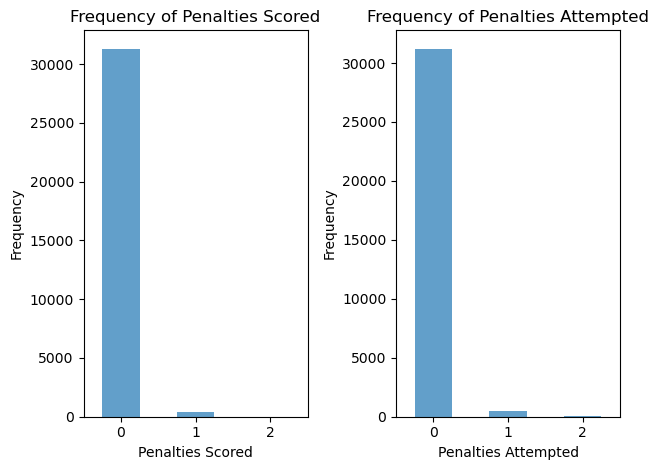

In [82]:
penscored_count = att_explore['Penalties Scored'].value_counts().sort_index()
penattempt_count = att_explore['Penalties Attempted'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

penscored_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Penalties Scored')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Penalties Scored')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

penattempt_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Penalties Attempted')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Penalties Attempted')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

So majority of the observations have no penalties scored, there are very few with 1 penalty scored, and almost no observations with 2 penalties scored. This pattern is repeated for penalties attempted, although there appears to be more observations with 2 penalty attempts. Looking at the below, we can see that out of all observations, there were only 504 that had 1 penalty attempted and 22 with 2 penalties attempted. In other words, only 1.6% of the observations had any penalties attempted. 

In [83]:
att_explore['Penalties Attempted'].value_counts()

Penalties Attempted
0    31211
1      504
2       22
Name: count, dtype: int64

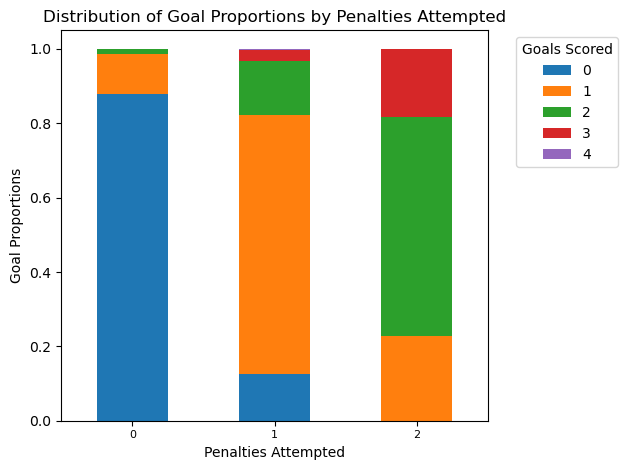

In [84]:
goals_by_penattempt = att_explore.groupby(['Penalties Attempted', 'Goals']).size().unstack(fill_value = 0)

goalprop_by_penattempt = goals_by_penattempt.div(goals_by_penattempt.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_penattempt.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Penalties Attempted')
ax.set_xlabel('Penalties Attempted')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Just over 80% of the observations that have 1 penalty attempted recorded a goal. This makes sense since a penalty represents a really big chance to score goal. It is also interesting to note that all observations with 2 penalties attempted in one game recorded at minimum 1 goal. Based on this information, we can say that knowing that a penalty was attempted by a particular player in a particular game means they are very likely to have scored a goal. Next, we have a look at the proportion of 'Penalties Attempted' that actually resulted in a 'Penalty Scored'. 

In [85]:
def penprop (row):
    if row['Penalties Attempted'] == 0:
        return np.nan
    return row['Penalties Scored']/row['Penalties Attempted']

att_explore['Penalty Success Rate'] = att_explore.apply(penprop, axis = 1)
att_explore['Penalty Success Rate']

10000   NaN
24977   NaN
37756   NaN
18759   NaN
168     NaN
         ..
31381   NaN
5199    NaN
8243    NaN
8823    NaN
25620   NaN
Name: Penalty Success Rate, Length: 31737, dtype: float64

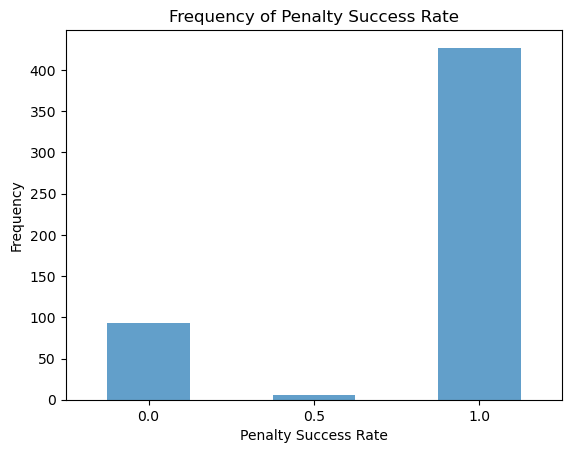

Penalty Success Rate
0.0     93
0.5      6
1.0    427
Name: count, dtype: int64

In [86]:
pensuccess_count = att_explore['Penalty Success Rate'].value_counts().sort_index()

fig, ax = plt.subplots()

pensuccess_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Penalty Success Rate')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Penalty Success Rate')

plt.xticks(rotation = 0)
plt.show()

pensuccess_count

There were a total of 526 observations that contained penalty activity (either 1 of 2 penalties attempted). 81.1% of these observations had a 100% success rate. 17.7% had a 0% success rate. Only 1.1% of them had a 50% success rate (the small number is because there needs to be 2 penalties attempted to obtain a 50% success rate. As there were very few observations with 2 penalty attempts in the first place, the number of observations with a 50% success rate from the penalty spot would be quite small.). There are a few takeaways from this. The first is that penalty success is generally quite high. In other words, if there is a penalty, we can be pretty confident that the player taking the penalty will score. The second takeaway is that penalties are quite rare events. Therefore, including penalty success rate as a feature doesn't really give us much additional information compared to the 'Penalties Attempted' feature. 

### Shots Feature Exploration

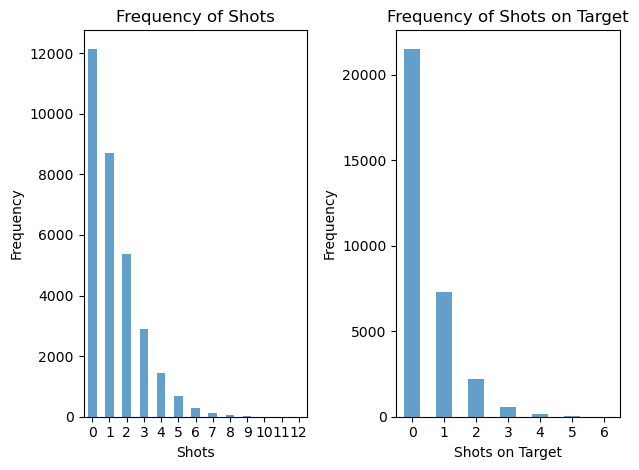

In [87]:
shots_count = att_explore['Shots'].value_counts().sort_index()
sot_count = att_explore['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The general trend is that majority of observations have both 0 shots and shots on target. This makes sense, because the dataset contains quite a few observations that are defensive/midfield players, who will generally not be shooting much throughout the game. On this basis, we can have a look to see how this plot changes if we just include attackers. 

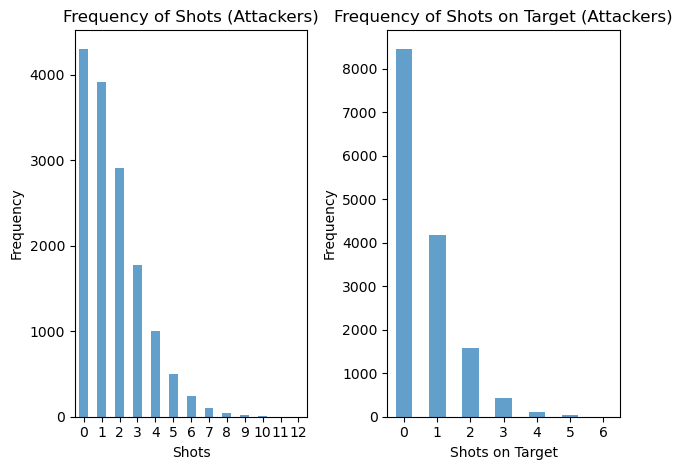

In [88]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_shots_df = att_explore[attackers_condition][['Shots', 'Shots on Target', 'Goals']]

shots_count = attackers_shots_df['Shots'].value_counts().sort_index()
sot_count = attackers_shots_df['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

It is interesting that the trend is broadly the same. We can see that the difference between the number of observations with no shots and the number of observations with 1 shots is now much closer, compared to the previous plot. This makes sense, as we expect more of the observations now to be taking shots (since we are only plotting the observations that played in the attacking positions). 

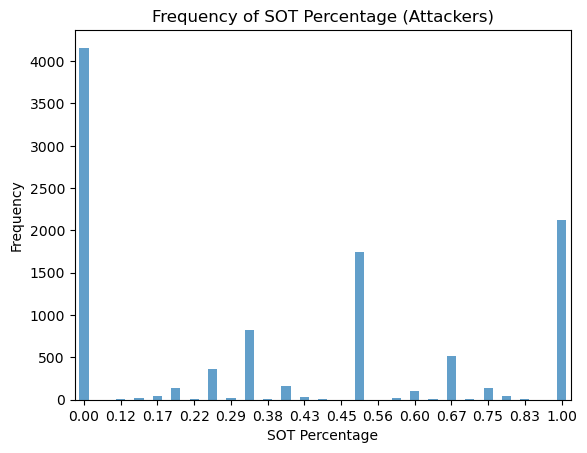

In [89]:
#creating new feature - shot on target percentage 
attackers_shots_df['SOT Percentage'] = attackers_shots_df['Shots on Target']/attackers_shots_df['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = attackers_shots_df['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage (Attackers)')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

So there is no clear pattern when looking at the frequency of shots on target percentages. The large number of observations with 0% shots on target percentage mostly consist of the observations that had 0 shots in the game. There is also a suprisingly large number of observations that had 100% shot on target percentage. I speculate majority of those consist of observations that had 1 shot and 1 shot on target. We can really quickly compare the plot above, to a similar plot but this time including data from all other positions as well. 

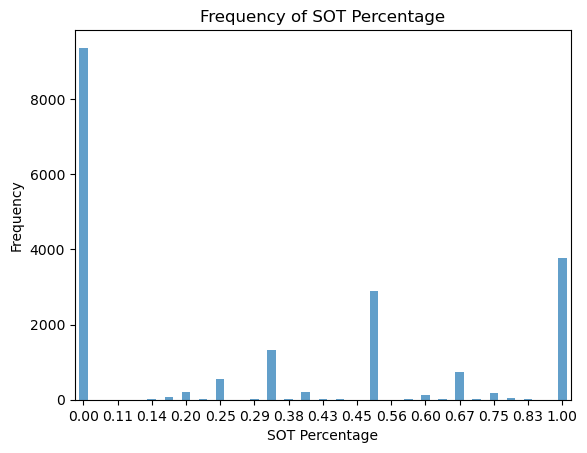

In [90]:
#creating new feature - shot on target percentage 
att_explore['SOT Percentage'] = att_explore['Shots on Target']/att_explore['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = att_explore['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

There is actually quite a similar pattern, which is slightly surprising. I would've expected there to be more observations with a reduced shot on target percentage, by virtue of the fact that including midfielders/defenders in the plot would lead to an on average worse shooting ability, so more observations with lower shot on target percentages. However, the other way to look at it would be that a lot of those observations wouldn't have taken shots anyway, so the overarching pattern stays somewhat similar. The current plots show that there are quite a few varying values for 'SOT Percentage'. Perhaps we could look into grouping them?

One final thing I also want to take a look at is how the SOT Percentage differs across the number of shots taken in a game. We will have to plot the proportion of observations per SOT Percentage, since there are so many SOT Percentage values that have very few observations. 

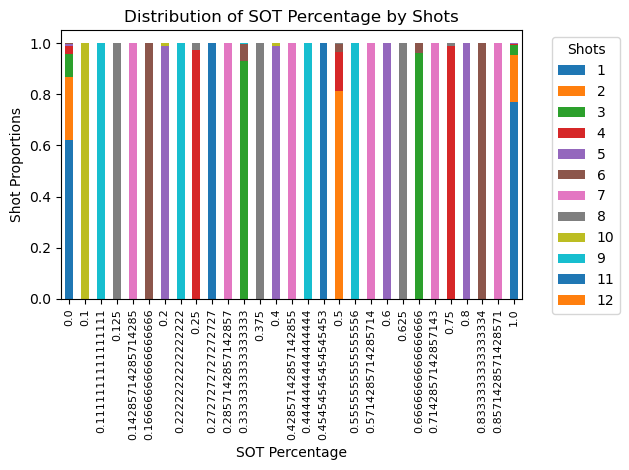

In [91]:
sotpct_by_shots = att_explore.groupby(['SOT Percentage', 'Shots']).size().unstack(fill_value = 0)
sotpctprop_by_shots = sotpct_by_shots.div(sotpct_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


Very messy plot! We can see that there are quite a few of the bars that only have one colour. For example, the 0.1 bar (10% shot on target percentage) is only from observations with 10 shots in one game. We can probably remove them from the plot for better interpretability. 

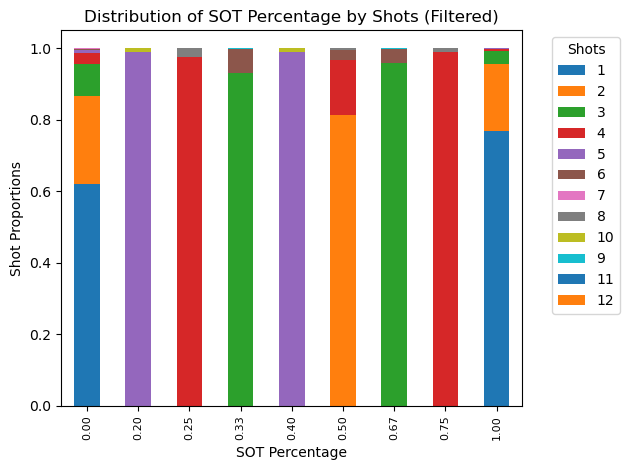

In [92]:
#modifying sotpctprop_by_shots to only include SOT Percentages with multiple shot values 
sotpctprop_by_shots = sotpctprop_by_shots.loc[~(sotpctprop_by_shots.isin([1]).any(axis = 1))]

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots (Filtered)')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

ax.set_xticks(range(len(sotpctprop_by_shots.index)))
ax.set_xticklabels([f'{value:.2f}' for value in sotpctprop_by_shots.index])
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

The plot is still quite messy, but is slightly more interpretable now. Firstly, over half of the observations with 0% SOT Percentage are attributed to observations that only had 1 shot in the game. The next most frequent is 2 shots, followed by 3 shots and so on. We can also see that a lot of the other SOT percentage are down to certain number of shots. For example, a 20% SOT Percentage is only possible with either 5 shots and 1 SOT or 10 shots and 2 SOT. Finally, we can see that just under 80% of the observations with 100% SOT Percentage are down to observations with 1 shot. A potential takeaway from this is that it is difficult to achieve 100% SOT percentage. Let's now take a look at the relationship between Shots, Shots on Target, SOT Percentage and Goals. 

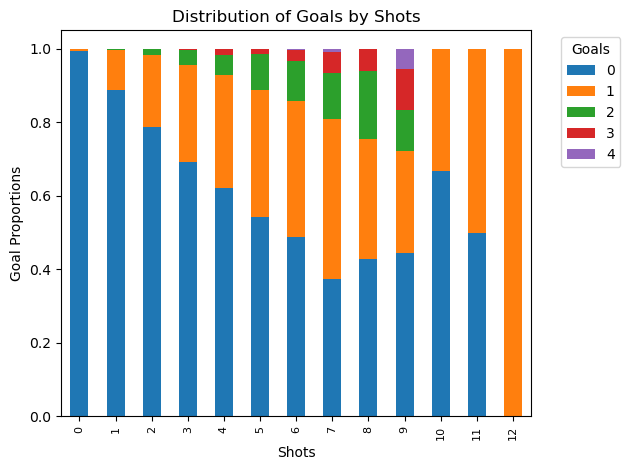

In [93]:
goals_by_shots = att_explore.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_shots = goals_by_shots.div(goals_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots')
ax.set_xlabel('Shots')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


First off, it appears that there is a steady trend of increasing goal proportions as shots increase all the way up to 7 shots. Then, the trend seems to reverse and become unstable. This is probably due to the fact that there are limited number of observations with 8+ shots per game. The proportion of 2 or more goals also increases similarly. The fact that there are no observations that have 2 or more goals and 10 or more shots at the same time is probably down to the limited number of observations that had 10 or more shots per game. There also seems to be some observations that had 0 shots but still managed a goal. We need to have a quick look at those observations, as there may be an issue there. 

In [94]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0)]

Day  Matchweek Venue Result             Team         Opponent Start  \
31700  Sat         29  Home  D 1–1        Tottenham          Arsenal     Y   
17043  Sat          1  Away  W 3–0          Chelsea     Huddersfield     Y   
10698  Sat         18  Away  W 3–0         West Ham       Stoke City    Y*   
10624  Sat          3  Away  W 3–1         West Ham          Watford    Y*   
24559  Sat         22  Away  W 2–1      Southampton   Leicester City     Y   
...    ...        ...   ...    ...              ...              ...   ...   
24617  Mon         13  Home  W 3–2           Fulham           Wolves     Y   
24383  Thu         22  Home  D 1–1         West Ham      Bournemouth     Y   
38706  Sat         18  Away  W 3–2   Crystal Palace  Manchester City    Y*   
33010  Sat          1  Away  W 5–0  Manchester City         West Ham     N   
3678   Sat         13  Home  L 1–2          Burnley         West Ham     Y   

       Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
31700        FW              90      1  ...   0   0   0   0          0   
17043        CM              90      1  ...   0   0   0   0          0   
10698        CM              34      1  ...   0   0   0   0          0   
10624     DM,CM              90      1  ...   0   0   0   0          0   
24559  CM,DM,WB              90      1  ...   0   0   0   1          0   
...         ...             ...    ...  ...  ..  ..  ..  ..        ...   
24617        LW              89      2  ...   0   0   0   0          0   
24383        AM              90      1  ...   0   0   0   0          0   
38706        CM              90      1  ...   0   0   0   0          0   
33010        FW              22      1  ...   0   0   0   0          0   
3678         FW              90      1  ...   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
31700            0                 0        0                   1.0   
17043            1                 0        0                   1.0   
10698            1                 0        0                   1.0   
10624            1                 0        0                   1.0   
24559            1                 0        0                   1.0   
...            ...               ...      ...                   ...   
24617            0                 0        1                   1.0   
24383            0                 0        0                   1.0   
38706            1                 0        0                   1.0   
33010            0                 0        0                   1.0   
3678             0                 0        0                   1.0   

       SOT Percentage  
31700             NaN  
17043             NaN  
10698             NaN  
10624             NaN  
24559             NaN  
...               ...  
24617             NaN  
24383             NaN  
38706             NaN  
33010             NaN  
3678              NaN  

[79 rows x 127 columns]

A quick scan appears to show that a lot of these observations have a Penalty Success Rate of 1. Let's further filter out these observations to remove any that have Penalty Success Rate = 1. 

In [95]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0) & (att_explore['Penalty Success Rate'] != 1)]

Day  Matchweek Venue Result         Team Opponent Start Position  \
20991  Sat         27  Home  D 1–1  Bournemouth   Wolves     Y       FW   

       Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  Midfielders  \
20991              90      1  ...   0   0   0   0          0            0   

       Wide Midfielders  Wingers  Penalty Success Rate  SOT Percentage  
20991                 0        0                   0.5             NaN  

[1 rows x 127 columns]

So we now know that goals that result from penalties are not counted as either shots or shots on target. 

Let's now have a look at the relationship between Goals and Shots on Target. 

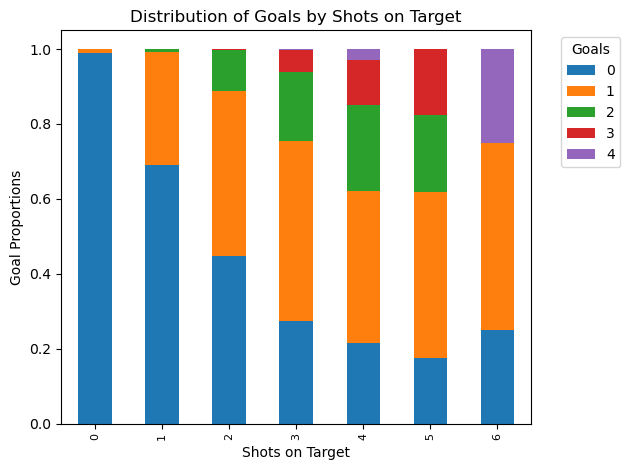

In [96]:
goals_by_sot = att_explore.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sot = goals_by_sot.div(goals_by_sot.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots on Target')
ax.set_xlabel('Shots on Target')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


A similar trend emerges, where the greater the number of shots on target, the greater the proportion of observations that have at least 1 goal. For example, for observations with 5 shots on target in 1 game, over 80% of them have scored at least one goal. Based on these graphs, you could argue that Shots on Target are a stronger predictor of goals than Shots, because Shots on Target are less messy. I would also like to reproduce these two graphs but only for attackers, just to see if the trend is different when eliminating more defensive players from the plot. 

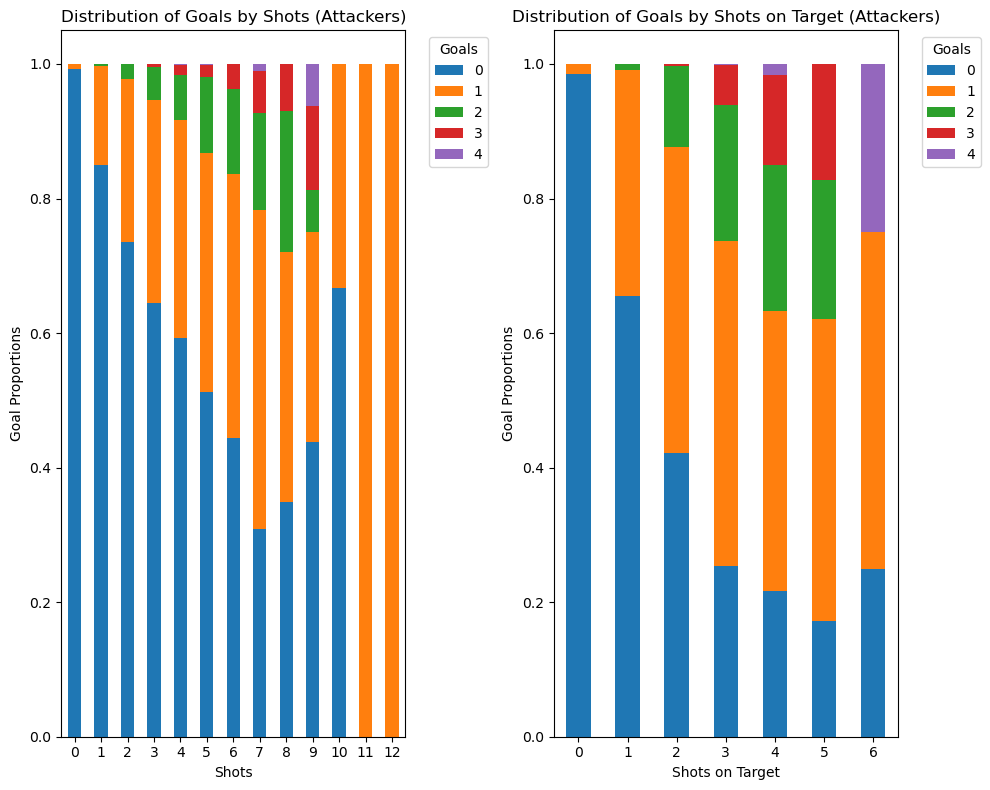

In [97]:
attackers_goals_by_shots = attackers_shots_df.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_shots = attackers_goals_by_shots.div(attackers_goals_by_shots.sum(axis = 1), axis = 0)

attackers_goals_by_sot = attackers_shots_df.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_sot = attackers_goals_by_sot.div(attackers_goals_by_sot.sum(axis = 1), axis = 0)

fig, axes = plt.subplots(1, 2, figsize = (10, 8))

attackers_goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Goal Proportions')
axes[0].set_title('Distribution of Goals by Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)
axes[0].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

attackers_goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Goal Proportions')
axes[1].set_title('Distribution of Goals by Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)
axes[1].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')


plt.tight_layout()
plt.show()

If you compare these plots with the above, you can see that the underlying trends are largely the same. Overall, larger number of shots and shots on target will lead to a greater proportion of the observations having scored at least one goal. It seems that the pattern is more stable for shots on target, where there is quite a consistent increase in the proportion of observations having at least one goal as the number of shots on target increases. Although this pattern is also largely there for shots, it gets a little unstable as the number of shots reaches 8+, as there are very few observations that have 8+ shots per game. 

### Yellow Card/Red Card Feature Exploration

Overall, we don't expect to see much correlation between the number of yellow cards/red cards and the number of goals scored. The only possible pattern is that larger number of cards = fewer goals scored, as it is usually more likely for more defensive players to pick up yellow cards. However, we don't expect this to be a strong relationship. We start by taking a look at how many of the observations have yellow/red cards. 

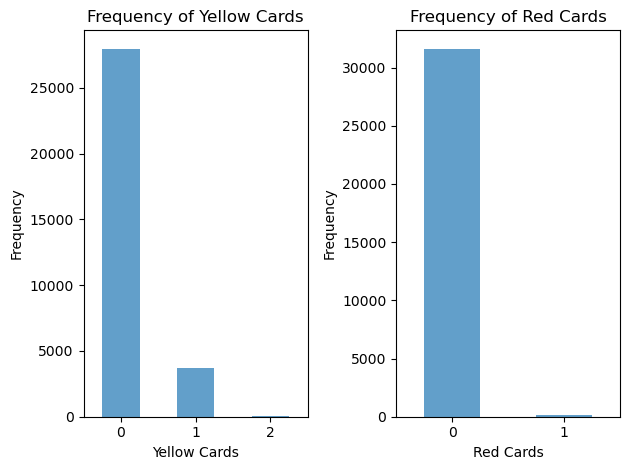

In [98]:
yc_count = att_explore['Yellow Cards'].value_counts().sort_index()
rc_count = att_explore['Red Cards'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

yc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Yellow Cards')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Yellow Cards')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

rc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Red Cards')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Red Cards')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We can see that majority of the observations have recorded neither a yellow or a red card throughout the game. There is a fair number of observations that have recorded 1 yellow card per game, but very few that have either picked up 2 yellow cards/1 red card. We now turn our attention to the relationship between YC/RC and Goals. 

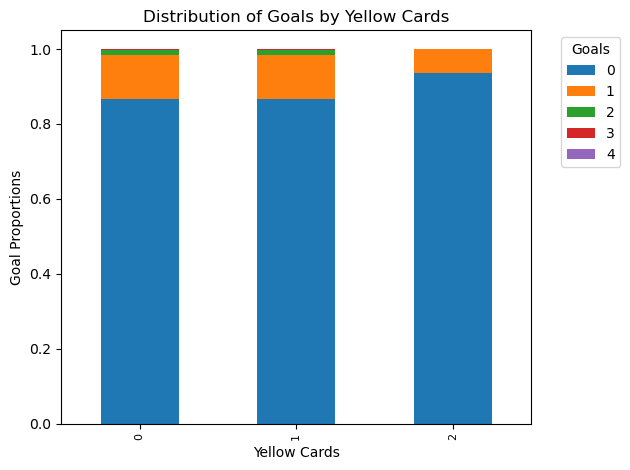

In [99]:
goals_by_yc = att_explore.groupby(['Yellow Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_yc = goals_by_yc.div(goals_by_yc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_yc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Yellow Cards')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that the proportion of observations that have at least 1 goal is pretty much the same when comparing observations with no yellow cards and observations with 1 yellow card. However, the proportion of observations with at least 1 goal is quite a bit smaller for observations with 2 yellow cards. This probably has to do with the fact that getting 2 yellow cards is equivalent to getting a red card, i.e you're sent off so you are playing less minutes in the game. We have seen previously that the more minutes you play corresponds to a greater proportion of observations scoring at least 1 goal, so this tracks. Based on this, we expect to see the proportion of observations that score at least 1 goal to be greater for observations with no red card, compared to those with a red card. 

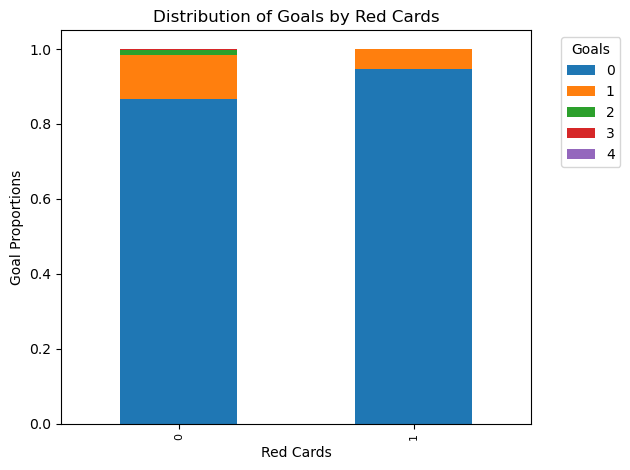

In [100]:
goals_by_rc = att_explore.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rc = goals_by_rc.div(goals_by_rc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


As expected, the proportion of observations that have at least 1 goal is smaller for the observations that have recorded a red card, compared to thoes that did not record a red card. Although the plots do suggest some relationship between Goals and Red/ 2 Yellow cards, I believe this is primarily to do with the effect of Red/2 Yellow Cards on minutes played, which is ultimately having an impact on goals scored. In other words, the fact that an observation recorded either 2 yellow cards/1 red card is already recorded in the 'Minutes Played' feature, in terms of it's effect on goals. 

To investigate this, we can have a look at the average minutes played of those players that recorded a red card. We can then plot the proportion of goals scored for observations with a red card, and compare this to the proportion of goals scored for observations with comparable minutes played, but no red card. 

In [101]:
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].mean()


Minutes Played    54.991304
dtype: float64

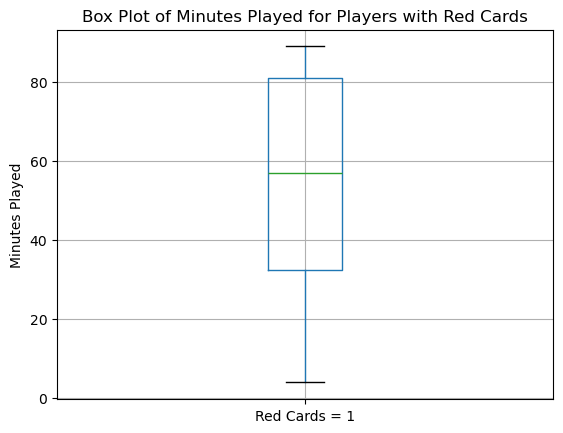

In [102]:
plt.figure()
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Box Plot of Minutes Played for Players with Red Cards')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])
plt.show()


So of the players who recorded a red card, the mean minutes played was 54.9, with a similar median. Perhaps surprisingly, the box plot shows that the range of minutes played for players with red cards is actually quite dispersed. Let's compare this with a box plot of minutes played for all of the observations. 

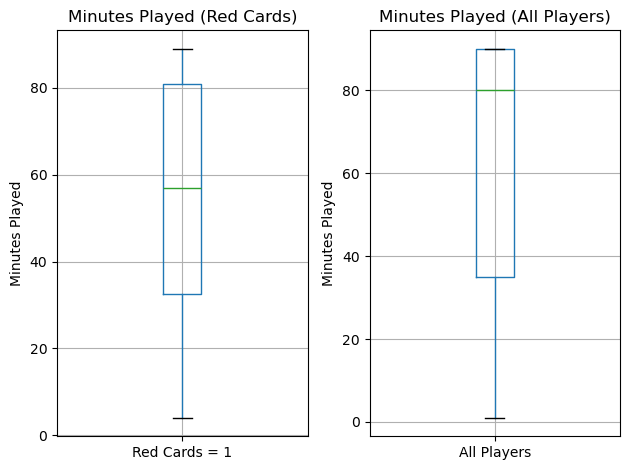

In [103]:
plt.figure()

plt.subplot(1, 2, 1)
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
att_explore[['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (All Players)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

So clearly, the minutes played when looking at all players has a much higher median than the minutes played for the players with red cards. However, the spread seems to be quite similar in terms of both the min/max as well as the interquartile range. 

In [104]:
np.random.seed(753)
#subset of red card observations
rc_dat = att_explore[att_explore['Red Cards'] == 1]

#subset of remaining observations 
norc_dat = att_explore[att_explore['Red Cards'] == 0]

#estimating the distribution of 'Minutes Played' in rc_dat
rc_dat_mins = rc_dat['Minutes Played']
bins = np.histogram_bin_edges(rc_dat_mins, bins = 'auto')

#sample from norc_dat based  on estimated distribution
samp_dat = pd.DataFrame()

for i in range(len(bins) - 1):
    #calculate range for current bin
    bin_range = (bins[i], bins[i + 1])
    
    #filter observations that fall intocurrent bin
    bin_data = norc_dat[
        (norc_dat['Minutes Played'] >= bin_range[0]) &
        (norc_dat['Minutes Played'] < bin_range[1])
    ]
    if not bin_data.empty:
        bin_sample_size = ((rc_dat_mins >= bin_range[0]) & 
                           (rc_dat_mins < bin_range[1])).sum()
        
        sampled_from_bin = bin_data.sample(n=min(bin_sample_size, len(bin_data)), replace=True)
        samp_dat = pd.concat([samp_dat, sampled_from_bin])

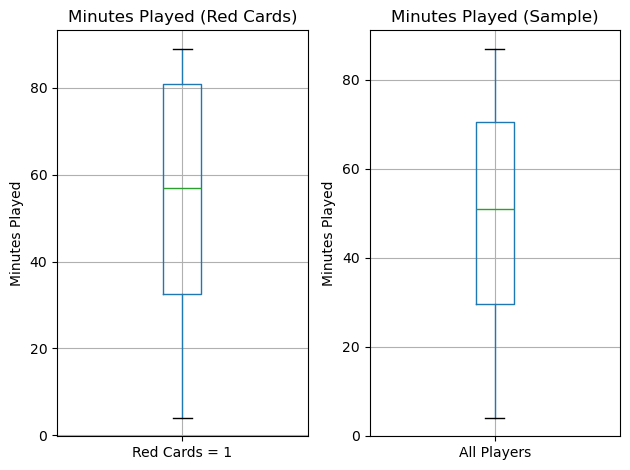

In [105]:
plt.figure()

plt.subplot(1, 2, 1)
rc_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
samp_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Sample)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

We can see that the distribution of 'Minutes Played' between the Red Card subset and the sample is relatively similar. Let's now plot compare the goal proportions between these two samples

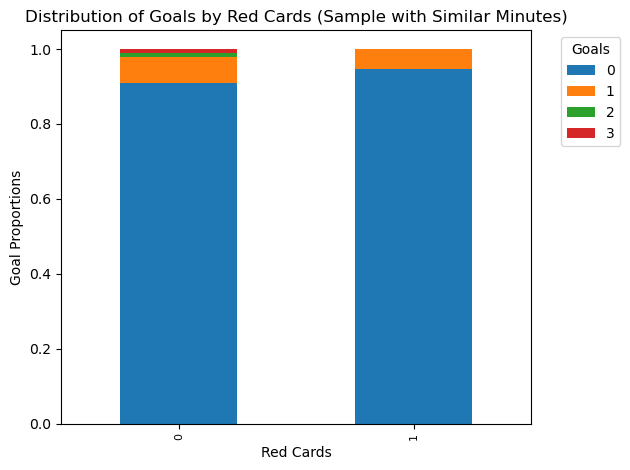

In [106]:
rcsample_dat = pd.concat([rc_dat, samp_dat], ignore_index = True)

goals_by_rcsamp = rcsample_dat.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rcsamp = goals_by_rcsamp.div(goals_by_rcsamp.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rcsamp.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards (Sample with Similar Minutes)')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that although there is still a difference in the proportion of goals scored by observations with red cards, compared to observations without red cards (sampled so that the distribution of minutes played is comparable to the subset of observations that have red cards), this difference is not as large as previously seen. 

### Touches Feature Exploration

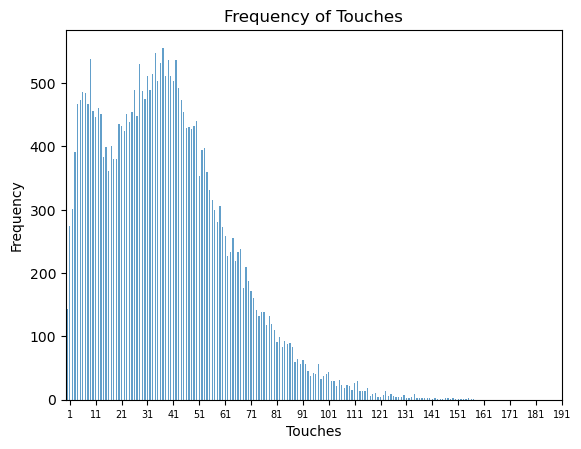

In [107]:
touches_count = att_explore['Touches'].value_counts().sort_index()

fig, ax = plt.subplots()

touches_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Touches')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Touches')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 200, 10))
ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Majority of the observations have 'Touches' value less than 100. We know that playing in certain positions is more likely to get you more touches (for example, you are more likely to have more touches playing in midfield and defence compared to attack). Also, you will obviously get more touches if you are playing more minutes. Let's investigate the second by inspecting a plot of 'Touches' against 'Minutes Played'. 

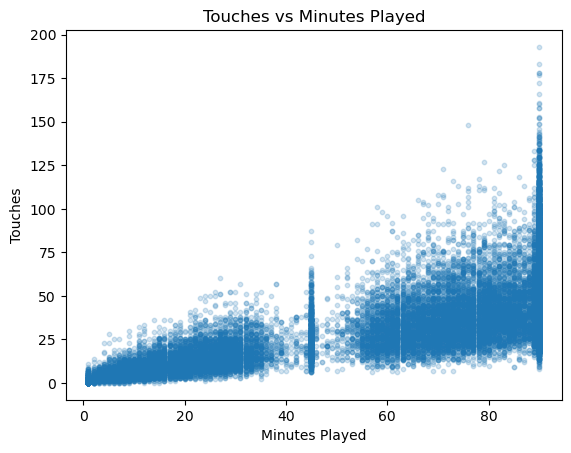

In [108]:
plt.figure()

plt.scatter(att_explore['Minutes Played'], att_explore['Touches'], alpha = 0.2, s = 10)
plt.title('Touches vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Touches')
plt.show()

We can clearly see the pattern of more minutes played = more touches. Suppose we then colour code each point in the scatter plot by the position played by the observation. 

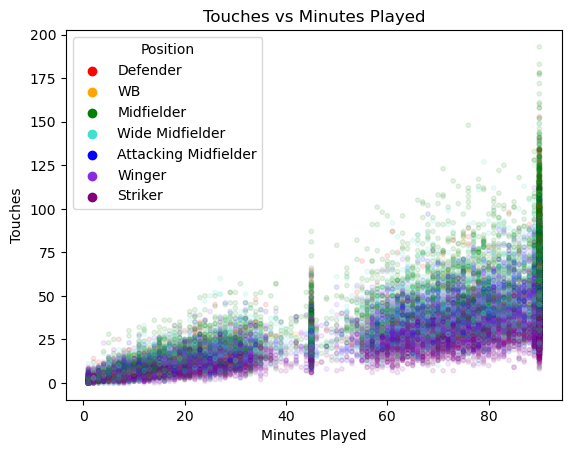

In [109]:
def get_position(row):
    if row['Defenders'] == 1:
        return 'Defender'
    if row['WB'] == 1:
        return 'WB'
    if row['Midfielders'] == 1:
        return 'Midfielder'
    if row['Wide Midfielders'] == 1:
        return 'Wide Midfielder'
    if row['Wingers'] == 1:
            return 'Winger'
    if row['AM'] == 1:
        return 'Attacking Midfielder'

    if row['FW'] == 1:
        return 'Striker'

#position plot contains the position played by each observation
position_plot = att_explore.apply(get_position, axis = 1)

position_colourmap = {
    'Defender': 'red',
    'WB': 'orange',
    'Midfielder': 'green', 
    'Wide Midfielder': 'turquoise',
    'Attacking Midfielder': 'blue',
    'Winger': 'blueviolet', 
    'Striker': 'purple'
}

position_colours = position_plot.map(position_colourmap)

plt.figure()

plt.scatter(att_explore['Minutes Played'], att_explore['Touches'], color = position_colours, alpha = 0.1, s = 10)
plt.title('Touches vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Touches')

#custom legend
for position, colour in position_colourmap.items():
    plt.scatter([], [], color = colour, label = position)
plt.legend(title = 'Position')



plt.show()

What we can see is that darker coloured points are located towards the bottom of the plot, whilst the more green coloured points are located towards the top. This confirms our initial guess that observations classified as playing in midfield are more likely to record more touches, whilst attackers such as wingers or strikers are more likely to record less touches. We need to keep this in mind as we investigate the relationship between 'Touches' and goals. 

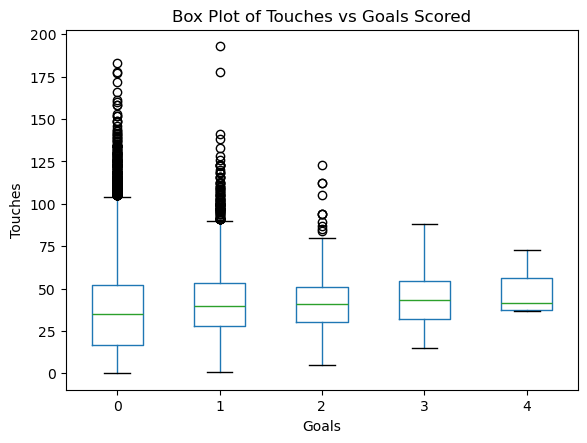

In [110]:
plt.figure
att_explore.boxplot(column = 'Touches', by = 'Goals', grid = False)
plt.title('Box Plot of Touches vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Based on the boxplot, it appears that the median number of touches for different 'Goals' values is relatively similar, at around 35. There do appear to be quite a few outliers however. Recall that we previously showed the effect of 'Position' on 'Touches'. Let's reproduce the box plot above, but using only the attackers data. 

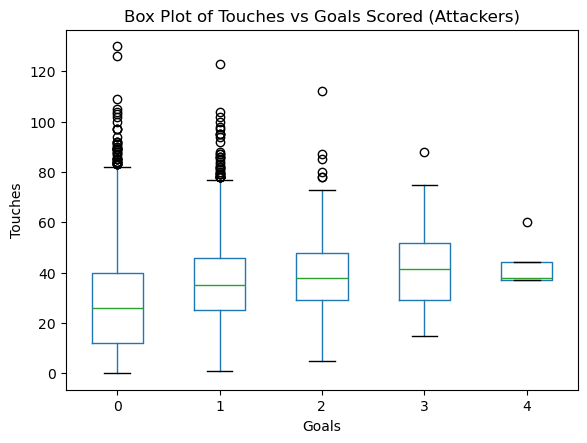

In [111]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_touches_df = att_explore[attackers_condition][['Touches', 'Goals']]

plt.figure
attackers_touches_df.boxplot(column = 'Touches', by = 'Goals', grid = False)
plt.title('Box Plot of Touches vs Goals Scored (Attackers)')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Now, it appears as if having more touches leads to more goals being scored. However, this relationship does not appear to be very strong, as we can see that the median number of touches for observations that scored at least 1 goal is the approximately the same, whether or not 1 goal is scored or 3 goals are scored. This sort of aligns with the contextual information. The number of touches that a player records in a game is largely dependent on the tactical system of the team that the player plays for, as well as the role of the player within this tactical system. For example, take two attackers; Harry Kane and Erling Haaland, both of which are prolific strikers. Harry Kane is considered to be more of a link player, meaning he will drop deep to link the midfield with the attack. This generally leads to him having more touches of the ball in comparison to Erling Haaland, who is more of a poacher. 

### Tackles, Interceptions and Blocks Feature Exploration

I have included these 3 features in the same section because these are 3 features typically considered to be associated with defensive players. We don't expect there to be any strong relationship between these features and goals scored. 

#### Tackles

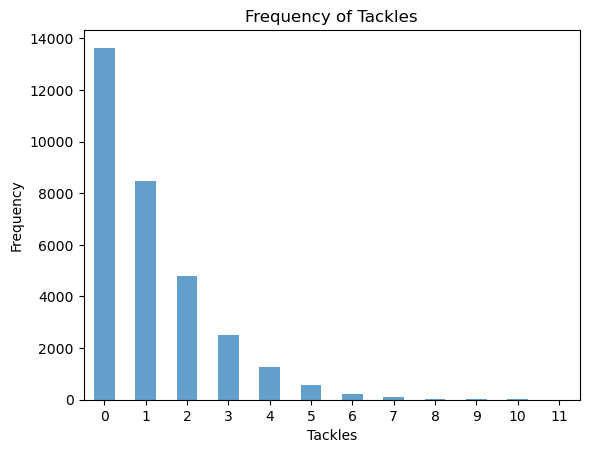

In [112]:
tackles_count = att_explore['Tackles'].value_counts().sort_index()

fig, ax = plt.subplots()

tackles_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

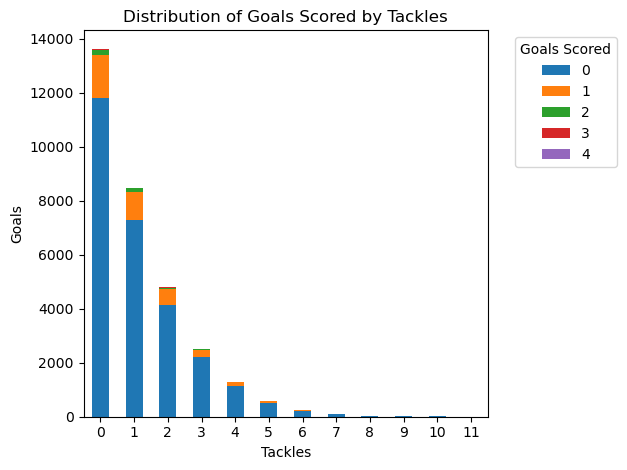

In [113]:
goals_by_tackles = att_explore.groupby(['Tackles', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Tackles')
ax.set_xlabel('Tackles')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

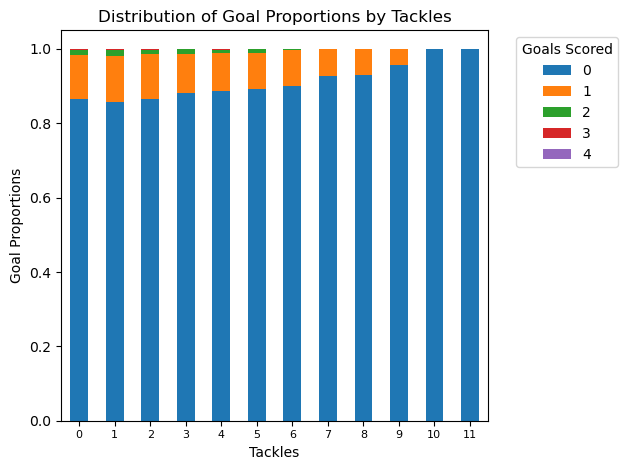

In [114]:
goalprop_by_tackles = goals_by_tackles.div(goals_by_tackles.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Tackles')
ax.set_xlabel('Tackles')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There seems to be a trend where the more tackles made, the lower the proportion of observations that scored at least 1 goal. As we mentioned at the beginning, we suspect this is to do with the fact that more defensive players (i.e. Defenders or Midfielders) are more likely to make more tackles, whilst simultaneously also being less likely to score goals. We can investigate this by plotting the frequency of tackles for defensive players (Defenders, Midfielders) and comparing this with the frequency of tackles for attacking players (AM, Wingers, FW)

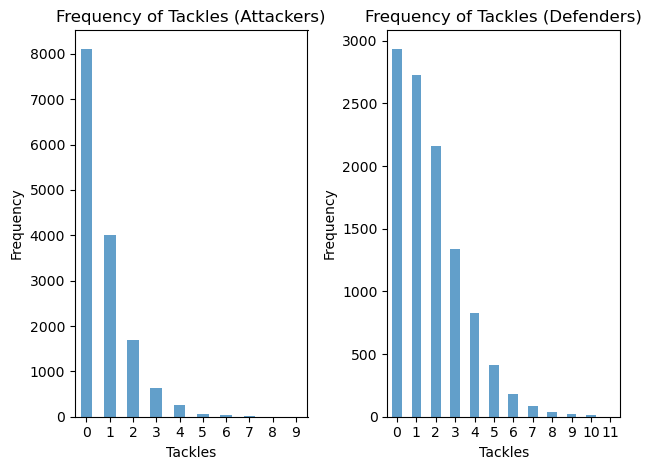

In [115]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_defdat = att_explore[attackers_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
attackers_tackles_count = attackers_defdat['Tackles'].value_counts().sort_index()


defenders_condition = (att_explore['Defenders'] == 1) | (att_explore['Midfielders'] == 1) | (att_explore['WB'] == 1)
defenders_defdat = att_explore[defenders_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
defenders_tackles_count = defenders_defdat['Tackles'].value_counts().sort_index()



fig, axes = plt.subplots(1, 2)

attackers_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Tackles')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Tackles (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Tackles')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Tackles (Defenders)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

When comparing the two plots, we can clearly see that the Attackers plot has observations that have generally recorded far fewer tackles compared to the observations in the Defenders plot. This confirms our initial suspicions about the relationship between 'Tackles' and the positions played by a given observation. 

#### Interceptions

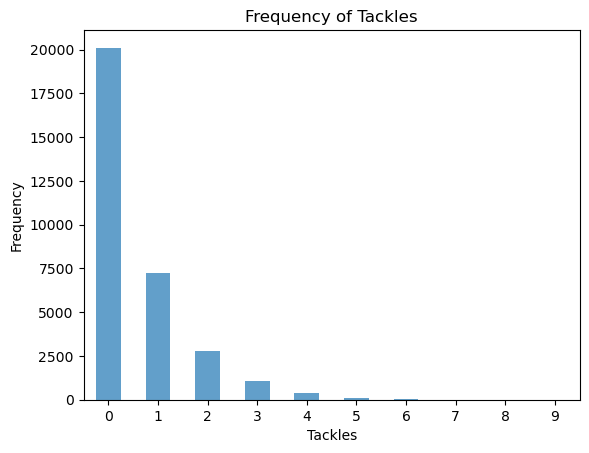

In [116]:
interceptions_count = att_explore['Interceptions'].value_counts().sort_index()

fig, ax = plt.subplots()

interceptions_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

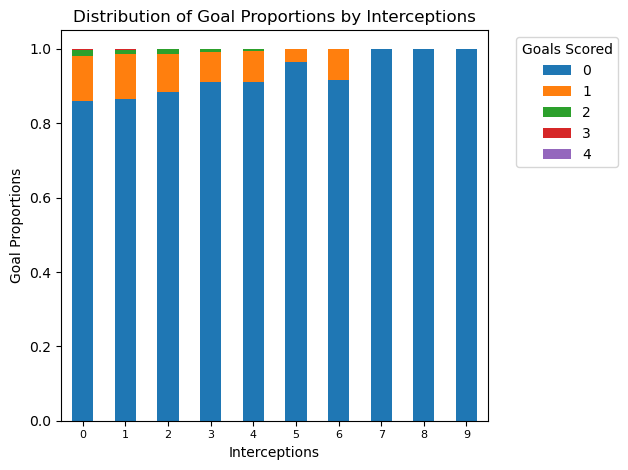

In [117]:
goals_by_interceptions = att_explore.groupby(['Interceptions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_interceptions = goals_by_interceptions.div(goals_by_interceptions.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_interceptions.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Interceptions')
ax.set_xlabel('Interceptions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

A similar pattern emerges where we see that the more interceptions is somewhat correlated with a fewer proportion of the observations scoring at least 1 goal. There does seem to be a weird kink in the pattern, where the proportion of goals scored by observations with 6 tackles is actually comparable to the proportion of goals scored by observations with 3 interceptions. We can have a closer look. 

In [118]:
att_explore[att_explore['Interceptions'] == 6]

Day  Matchweek Venue Result            Team         Opponent Start  \
19725  Sat         32  Away  W 2–1        Brighton          Arsenal     Y   
37734  Sat         10  Away  L 0–3    Huddersfield        Liverpool     Y   
29533  Sat         27  Away  D 0–0         Watford   Manchester Utd     Y   
14357  Sat         17  Away  W 1–0     Bournemouth          Chelsea     Y   
17029  Sun         20  Away  W 2–1         Chelsea          Arsenal     N   
2058   Sat         24  Away  D 0–0     Aston Villa         Brighton     Y   
31898  Wed         17  Away  L 0–2        Brighton        Tottenham     Y   
4699   Sat          4  Home  L 0–3         Everton        Tottenham     Y   
38752  Sun         28  Home  L 0–1  Crystal Palace        Tottenham    Y*   
8660   Sun          8  Away  W 4–1         Chelsea      Southampton     Y   
28172  Sat         27  Home  D 2–2       Brentford          Chelsea    Y*   
17026  Sat         17  Home  L 0–1         Chelsea      Bournemouth     Y   
8905   Sat          8  Home  W 2–1  Crystal Palace          Chelsea     Y   
8698   Sun         20  Away  W 1–0         Chelsea   Crystal Palace     Y   
32017  Wed         19  Home  W 3–2         Burnley          Everton     Y   
11923  Sat         34  Home  L 0–3    Norwich City    Newcastle Utd     Y   
29288  Sun          3  Away  D 1–1         Burnley        Tottenham     Y   
11404  Tue         22  Away  D 0–0         Everton           Fulham     Y   
18297  Sat          5  Away  L 1–4    Cardiff City          Chelsea     Y   
4132   Sat          7  Home  D 2–2       West Brom          Watford     Y   
22002  Thu         20  Away  L 1–2          Wolves          Arsenal     Y   
32140  Sun          8  Away  D 2–2       Liverpool         Brighton     Y   
35399  Mon          5  Home  D 2–2     Southampton         Brighton     Y   
8160   Sat          7  Away  D 2–2        West Ham      Bournemouth     Y   
32106  Sun          8  Away  W 5–1         Arsenal           Fulham     Y   
33163  Sat         23  Home  D 2–2         Everton        Tottenham     Y   
4131   Mon          6  Away  L 0–2       West Brom          Arsenal     Y   
24827  Mon          5  Away  W 1–0          Wolves     Leeds United     Y   
22102  Sat         17  Home  W 2–0          Wolves      Bournemouth     Y   
35004  Thu         24  Home  W 2–0       Liverpool   Leicester City     Y   
3314   Sat          1  Home  L 1–2   Newcastle Utd        Tottenham     Y   
23874  Sun         21  Home  W 1–0        Brighton        Tottenham     Y   
14123  Sat          1  Away  L 0–1      Stoke City          Everton     Y   
16040  Sat         31  Away  W 2–0  Crystal Palace     Huddersfield     Y   
8930   Sun         38  Home  W 2–0  Crystal Palace        West Brom     Y   
39108  Sat         14  Away  L 0–2         Watford   Leicester City     Y   
32722  Sat         29  Home  W 1–0         Arsenal         West Ham     Y   
21310  Sat         16  Away  W 3–0     Bournemouth   Manchester Utd     Y   
21084  Sun         19  Home  D 0–0       Liverpool   Manchester Utd     Y   
24544  Sun         33  Home  W 1–0     Southampton  Manchester City    Y*   
36783  Wed         15  Home  D 2–2  Manchester Utd          Arsenal     Y   
38744  Thu         20  Home  L 2–3  Crystal Palace          Arsenal     Y   
22110  Mon         26  Home  D 1–1          Wolves    Newcastle Utd     Y   
37718  Sat         26  Home  L 1–2    Huddersfield          Arsenal     Y   
25432  Sun         27  Away  D 0–0   Newcastle Utd        West Brom     Y   
18904  Sat         29  Away  L 1–2  Leicester City   Crystal Palace     Y   
8627   Mon          1  Away  W 3–1         Chelsea         Brighton     Y   
5423   Sat          5  Home  L 0–6         Watford  Manchester City     Y   

       Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
19725        CM              76      1  ...   0   0   0   0          0   
37734        CM              90      0  ...   0   0   0   0          0   
29533      

As there are only 48 observations that have recorded exactly 6 interceptions, we can probably conclude that this anomaly is due to a small sample size, and shouldn't be attributed to the underlying data generating process. 

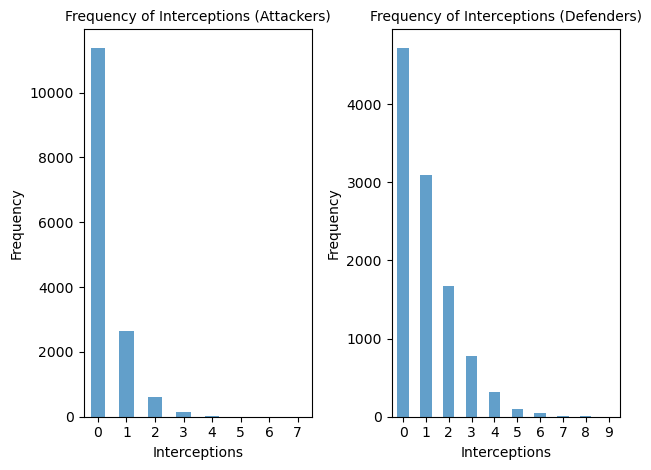

In [119]:
attackers_interceptions_count = attackers_defdat['Interceptions'].value_counts().sort_index()
defenders_interceptions_count = defenders_defdat['Interceptions'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Interceptions')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Interceptions (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Interceptions')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Interceptions (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We see a similar pattern where the frequency of interceptions is much greater for observations who have played in defensive positions. 

#### Blocks 

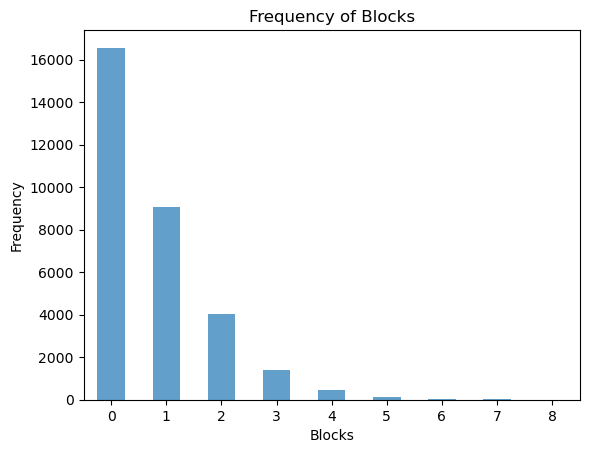

In [120]:
blocks_count = att_explore['Blocks'].value_counts().sort_index()

fig, ax = plt.subplots()

blocks_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Blocks')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Blocks')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

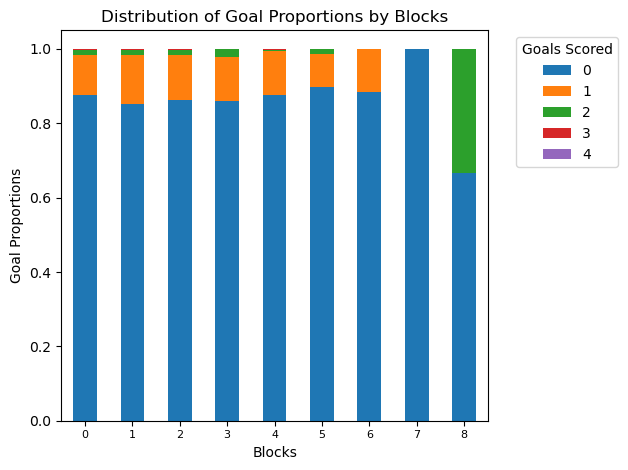

In [121]:
goals_by_blocks = att_explore.groupby(['Blocks', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_blocks = goals_by_blocks.div(goals_by_blocks.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_blocks.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Blocks')
ax.set_xlabel('Blocks')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Somewhat surprisingly, it doesn't appear to be any relationship between the number of blocks, and the proportion of observations that have scored at least one goal. The reason for this is unclear, perhaps there isn't such a distinct relationship between the number of blocks and position? 

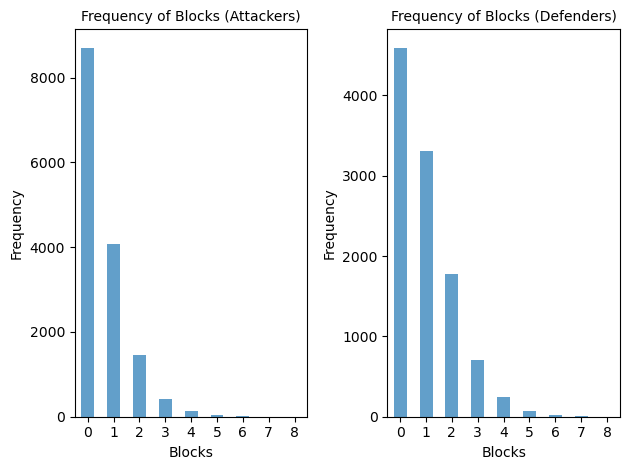

In [122]:
attackers_blocks_count = attackers_defdat['Blocks'].value_counts().sort_index()
defenders_blocks_count = defenders_defdat['Blocks'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Blocks')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Blocks (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Blocks (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The plots above don't seem to indicate that the distribution of 'Blocks' is similar when comparing defensive and attacking players. However, we can definitely say that the proportion of observations that have scored at least 1 goal is similar across different 'Blocks' values. Ultimately, this means that the number of Blocks made by a particular observation doesn't appear to have any significant relationship with the number of goals that are scored. 

### xG and npxG Feature Exploration

xG and npxG stand for Expected Goals and Non-Penalty Expected Goals respectively. For each shot that is taken, an xG value is given which classifies the probability of that shot resulting in a goal. For example, a shot with an xG value of 0.8 means that this shot will result in a goal 8 out of 10 times. We expect there to be a strong relationship between both xG and npxG and goals scored. 

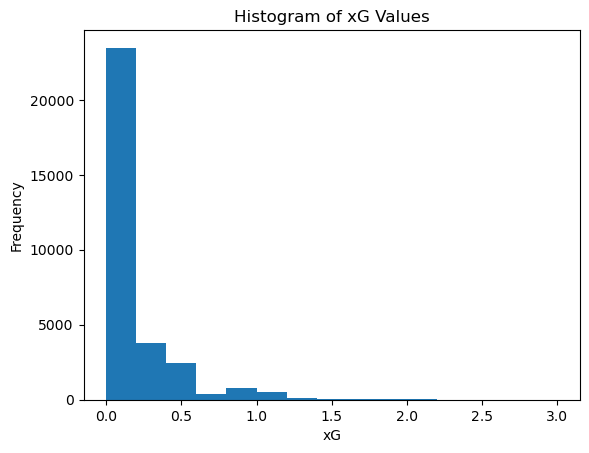

In [123]:
plt.figure()

plt.hist(att_explore['xG'], bins = 15)
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

We can see that majority of the xG values are situated around the 0 mark. There are also some extreme values of xG going up to 3. 

In [124]:
att_explore['xG'].max()

3.0

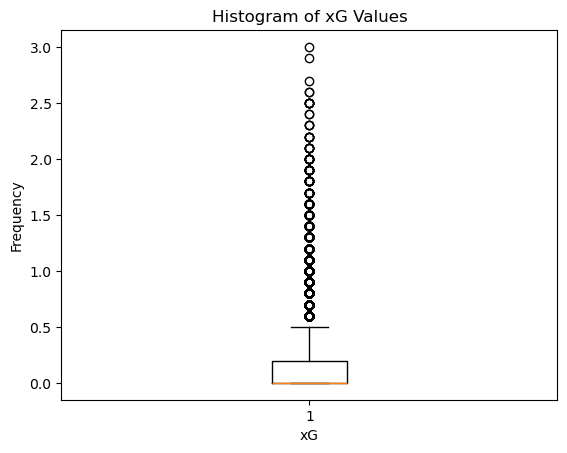

In [125]:
plt.figure()

plt.boxplot(att_explore['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

This boxplot doesn't really give us any additional information about the distribution of the 'xG' feature. We now know that there are a lot of xG values equal to or close to 0. We could try removing these values and replotting to see if we can get a better idea into the distribution of the non-zero xG values.

In [126]:
zero_xg_pct = (att_explore['xG'] == 0).sum()/len(att_explore)*100
zero_xg_pct = round(zero_xg_pct, 2)

print(str(zero_xg_pct) + '% of the observations have xG values equal to zero')

52.21% of the observations have xG values equal to zero


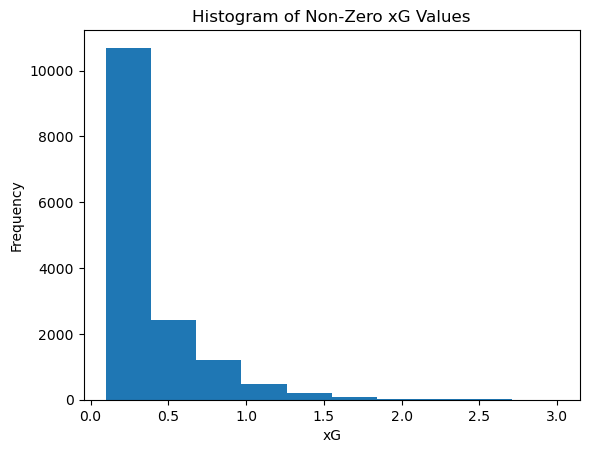

In [127]:
nonzero_xgdat = att_explore[att_explore['xG'] != 0]


plt.figure()

plt.hist(nonzero_xgdat['xG'], bins = 10)
plt.title('Histogram of Non-Zero xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

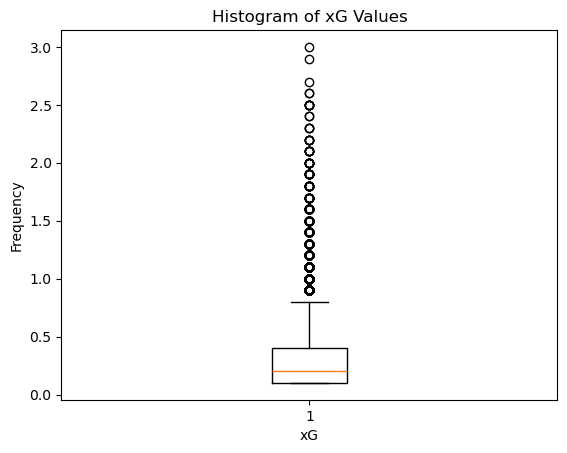

In [128]:
plt.figure()

plt.boxplot(nonzero_xgdat['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

So even when removing all of the observations with xG = 0, we can still see that the xG values are heavily right-skewed. Let's now take a look at the box plots when the non-zero xG observations are sorted by the number of goals scored. 

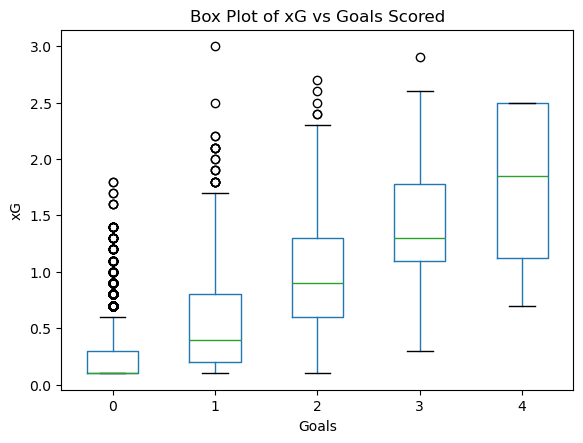

In [129]:
plt.figure
nonzero_xgdat.boxplot(column = 'xG', by = 'Goals', grid = False)
plt.title('Box Plot of xG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('xG')
plt.show()

We can see a very clear pattern showing us that the median value of xG is increasing by the number of goals scored. This gives us reason to believe that xG is an important predictor of Goals. We know based on the how xG is defined that this metric should closely match the number of goals scored. To investigate this, let's calculate the difference between Goals and xG for each observation, and visualise the resulting array. 

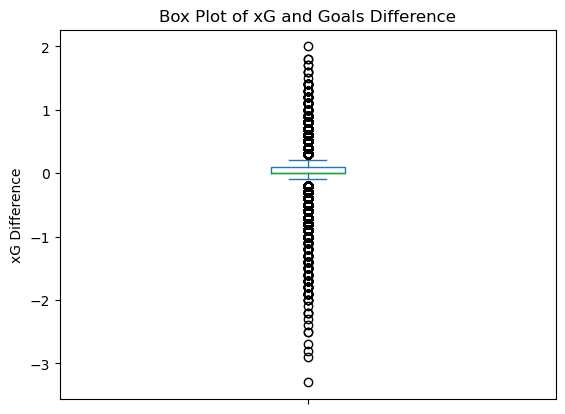

In [130]:
xg_diff = att_explore['xG'] - att_explore['Goals']

xg_diff.plot(kind = 'box')
plt.title('Box Plot of xG and Goals Difference')
plt.suptitle('')
plt.ylabel('xG Difference')
plt.show()

The object xg_diff was computed by taking the difference of xG and Goals for each observation. We can see that the median xg_diff value is close to zero. This makes sense because this means that on average, a player with an xG of 1 will score 1 goal etc. There are some outliers, and it appears that there are more negative outliers than positive outliers. What this means is that the frequency of observations with a negative xg_diff (the number of goals scored being greater than the xG) is greater than the frequency of observations with a positive xg_diff (number of goals scored < xG). 

Another thing we can take a look at is the relationship between xG and Shots/SOT. 

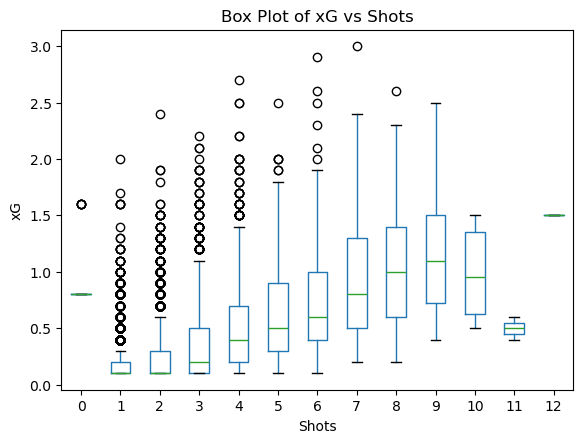

In [131]:
plt.figure
nonzero_xgdat.boxplot(column = 'xG', by = 'Shots', grid = False)
plt.title('Box Plot of xG vs Shots')
plt.suptitle('')
plt.xlabel('Shots')
plt.ylabel('xG')
plt.show()

As expected, the general pattern is increasing median values for xG as the number of shots increase. For some reason, the boxplot for the observations with 0 shots is a bit weird. Upon further investigation, we remember that penalties are not recorded as shots. However, each penalty has an xG value of 0.79, which is why the median xG for the observations with 0 shots is at that number (remember that this plot only has observations with non-zero xG)

Let's now have a look at the relationship between xG and npxG. Since they record very similar things, we want to have a look at which feature provides us with more information. 

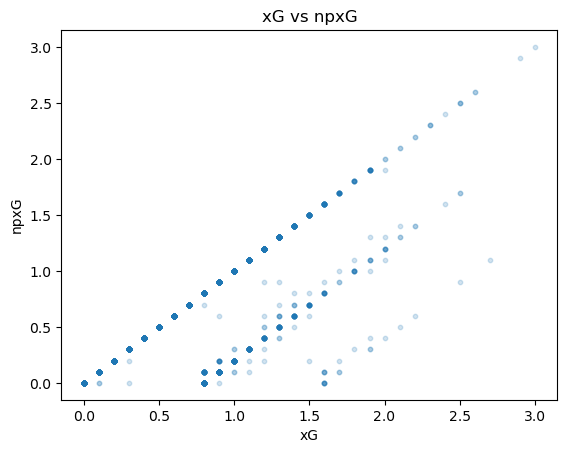

In [132]:
plt.figure()

plt.scatter(att_explore['xG'], att_explore['npxG'], alpha = 0.2, s = 10)
plt.title('xG vs npxG')
plt.xlabel('xG')
plt.ylabel('npxG')
plt.show()

There are a few things to note. The first is that we see a large number of observations where xG = npxG (these are the observations that lie on the y = x line). In other words, these are the observations that do not contain any penalties being taken, as their xG is equal to their xG excluding penalties (npxG). We can also notice that there are no observations that lie above the y=x line. In other words, there are no observations where the npxG is greater than the xG. This also makes sense. 

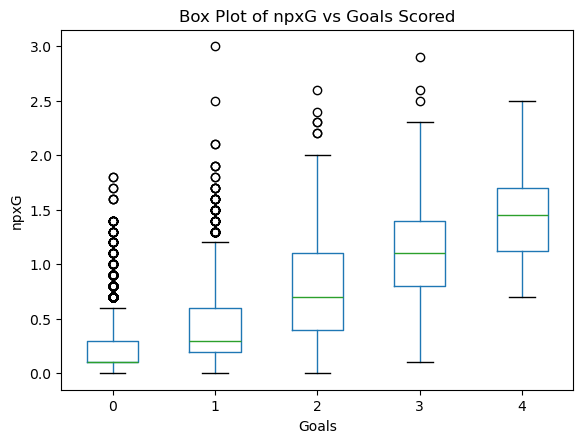

In [133]:
plt.figure
nonzero_xgdat.boxplot(column = 'npxG', by = 'Goals', grid = False)
plt.title('Box Plot of npxG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('npxG')
plt.show()

We can see that the relationship between 'Goals' and 'npxG' is very similar to the relationship between 'Goals' and 'xG'. The only slight difference that we can see is that the difference in npxG between successive number of goals scored isn't as large. This does make sense, because we are now excluding very large xG shots (penalties) from the metric. With regards to which feature to include, it may be best to include 'npxG' over 'xG', whilst also at the same time including a feature related to penalties (i.e. Penalties Taken). 

### xAG Feature Exploration

xAG is refers to the 'Expected Goals Assisted' for a particular player in a particular match. As this metric is more closely related to chance creation and assists, we don't expect there to be a strong relationship between xAG and Goals. 

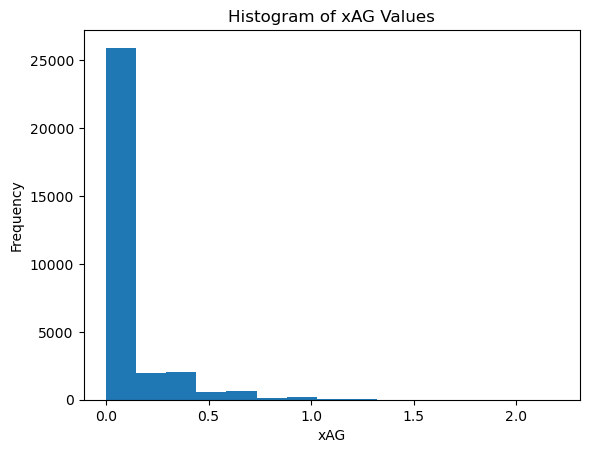

In [134]:
plt.figure()

plt.hist(att_explore['xAG'], bins = 15)
plt.title('Histogram of xAG Values')
plt.xlabel('xAG')
plt.ylabel('Frequency')
plt.show()

So an overwhelming majority of the observations have xAG values equal to zero.

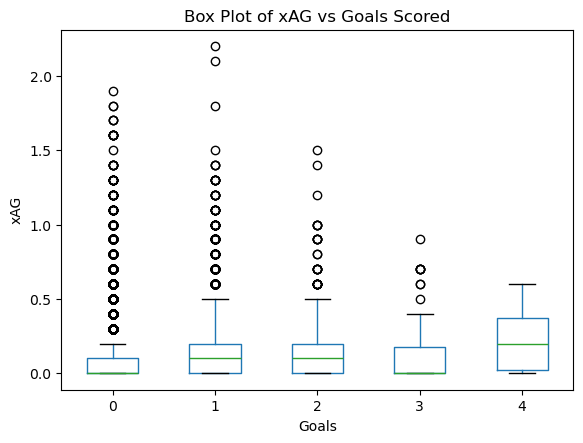

In [135]:
plt.figure
nonzero_xgdat.boxplot(column = 'xAG', by = 'Goals', grid = False)
plt.title('Box Plot of xAG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('xAG')
plt.show()

This box plot shows that the median xAG value doesn't really differ across different goals scored. The median xAG values for observations that have either scored 1 or 2 goals does seem to be slightly higher than the median xAG values for observation that have scored 0 goals, but this is most likely captured by the fact that attacking players are simultaneously more likely to accumulate xAG and to score goals. Instead, we believe that xAG is more likely to be correlated with 'Assists'. 

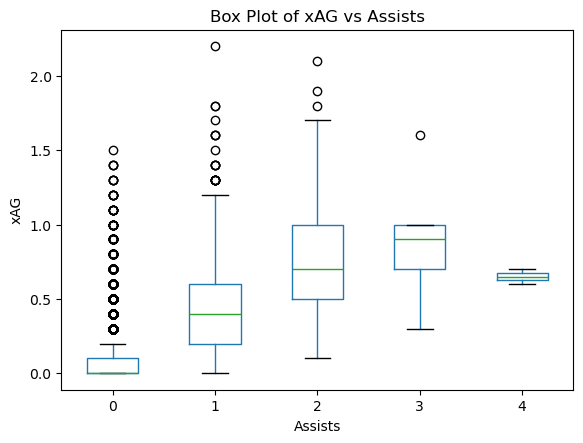

In [136]:
plt.figure
nonzero_xgdat.boxplot(column = 'xAG', by = 'Assists', grid = False)
plt.title('Box Plot of xAG vs Assists')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('xAG')
plt.show()

Here, we see a much clearer relationship between xAG and Assists. There does seem to be an outlier at 4 assists, where the median xAG value for observations with 4 assists is lower than the median xAG value for observations with 2 or 3 assists. However, this is most likely attributed to the small sample size associated with observations with 4 assists in one game. 

### Shot/Goal Creating Actions Feature Exploration

Shot Creating Actions refer to any action (Live Ball, Deadball, Dribble etc.) that results in a shot. Goal Creating Actions refer to any action that results in a goal. As both of these metrics primarily capture information that has to do with the creativity of a player (i.e. their ability to perform different types of actions that result in either shots or goals), we don't expect there to be a strong relationship between these metrics and 'Goals. 

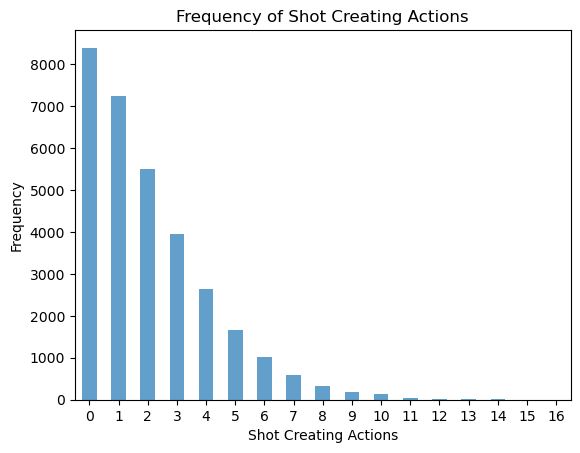

In [137]:
sca_count = att_explore['Shot Creating Actions'].value_counts().sort_index()

fig, ax = plt.subplots()

sca_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Shot Creating Actions')

plt.xticks(rotation = 0)
plt.show()

Majority of the observations have SCA equal to zero. The dataframe also contains information about each type of SCA (Deadball, Live, Dribble etc.). We first want to make sure that the sum of the different types of SCA is equal to the total SCA for each observation. We then want to plot the frequency of each type of SCA for each total SCA value. 

In [138]:
(att_explore['Shot Creating Actions'] == att_explore['Live SCA'] + att_explore['Deadball SCA'] + att_explore['Take-on SCA'] 
 + att_explore['Shot SCA'] + att_explore['Foul SCA'] + att_explore['Defense SCA']).sum() - len(att_explore)

0

The above code confirms that the Total SCA is equal to the sum of each constituent SCA for all of the observations. 

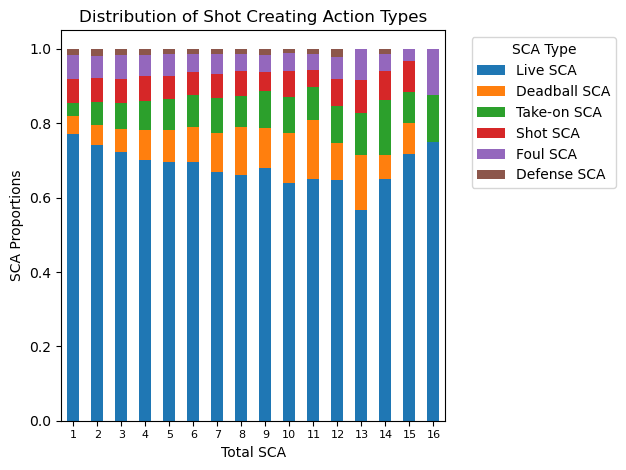

In [139]:
#sca_types is a new dataframe that only includes the columns related to Shot Creating Actions
sca_types = att_explore[['Live SCA', 'Deadball SCA', 'Take-on SCA', 'Shot SCA', 'Foul SCA', 'Defense SCA', 'Shot Creating Actions']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_sca = sca_types.groupby('Shot Creating Actions').sum()
total_sca = grouped_sca.sum(axis = 1)

#proportion of each sca type 
sca_prop = grouped_sca.div(total_sca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
sca_prop = sca_prop[sca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

sca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Shot Creating Action Types')
ax.set_xlabel('Total SCA')
ax.set_ylabel('SCA Proportions')
ax.legend(title = 'SCA Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see that Live SCA dominates the Total SCA across the board. The proportion of SCA being Deadball SCA also increases as the Total SCA increases. This is likewise the case with Take-on SCA. The proportion of SCA being Shot SCA stays relatively constant throughout, whilst it appears that the proportion of Foul SCA decreases as the Total SCA increases. 

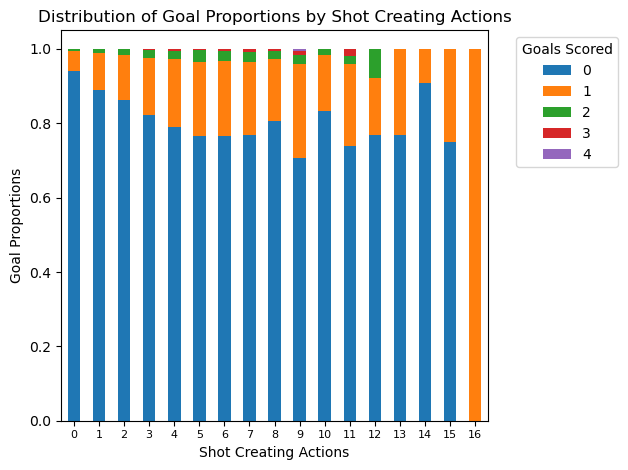

In [140]:
goals_by_sca = att_explore.groupby(['Shot Creating Actions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sca = goals_by_sca.div(goals_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot Creating Actions')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There seems to be a steady increase in the proportion of observations having scored at least 1 goal as the number of shot creating actions increaes from 0 to 5. However, this pattern seems to tail off and become quite erratic. Whether or not this is due to a small sample size is unclear. The fact that increasing SCA leads to an increased proportion of observations having scored at least 1 goal isn't necessarily surprising, since attacking players are simultaneously more likely to accumulate SCA's as well as goals. We could potentially look into this by reproducing the same plot, but only for attacking players for example. If what we said is true, we would expect to see no/little relationship between SCA and Goal Proportions. 

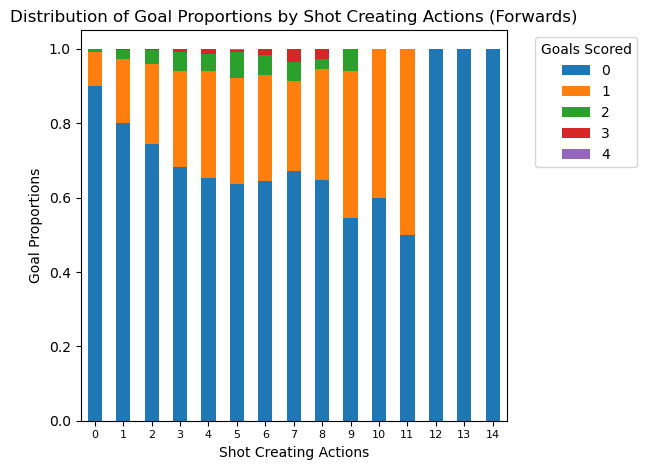

In [141]:
attackers_condition = (att_explore['FW'] == 1) 
attackers_sca_df = att_explore[attackers_condition][['Shot Creating Actions', 'Goals']]

attackers_goals_by_sca = attackers_sca_df.groupby(['Shot Creating Actions', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_sca = attackers_goals_by_sca.div(attackers_goals_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

attackers_goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot Creating Actions (Forwards)')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Perhaps surprisingly, the aforementioned pattern is still there. An increase in the number of total shot creating actions is associated with an increase in the proportion of observations recording at least 1 goal. Therefore, we should discard our initial hypothesis of there being no relationship between SCA and Goals. Let's have a look next at the relationship between Goals and different types of SCA. 

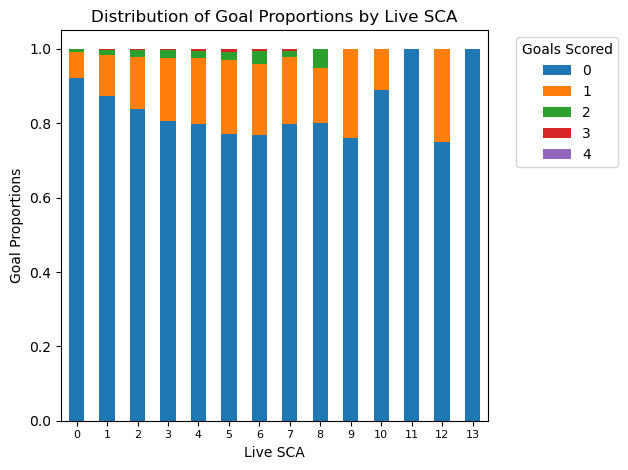

In [142]:
goals_by_livesca = att_explore.groupby(['Live SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sca = goals_by_livesca.div(goals_by_livesca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Live SCA')
ax.set_xlabel('Live SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Similar pattern to above, where we see a gradual increase in the proportion of observations recording at least 1 goal as the number of Live SCA increases up to a point. Then the pattern gets a bit messy. 

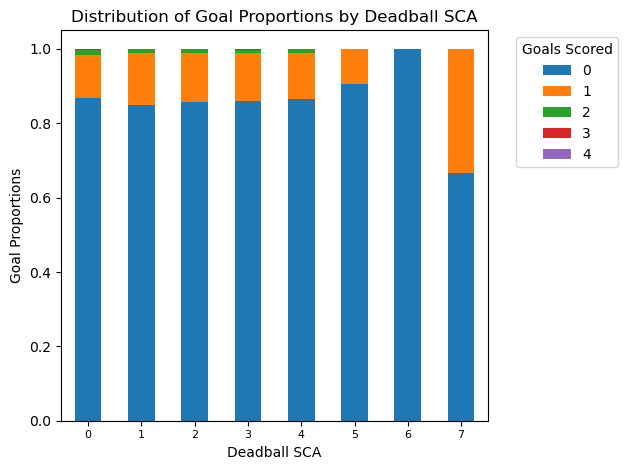

In [143]:
goals_by_deadballsca = att_explore.groupby(['Deadball SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_deadballsca = goals_by_deadballsca.div(goals_by_deadballsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_deadballsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Deadball SCA')
ax.set_xlabel('Deadball SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

It is interesting to see that there appears to be no relationship between Deadball SCA and Goal Proportions. We can see that the proportion of observations that have recorded at least 1 goal is basically the same regardless of the number of Deadball SCA. This does make sense, because we don't expect freekick or corner takers to be any more likely to score goals compared to other players. 

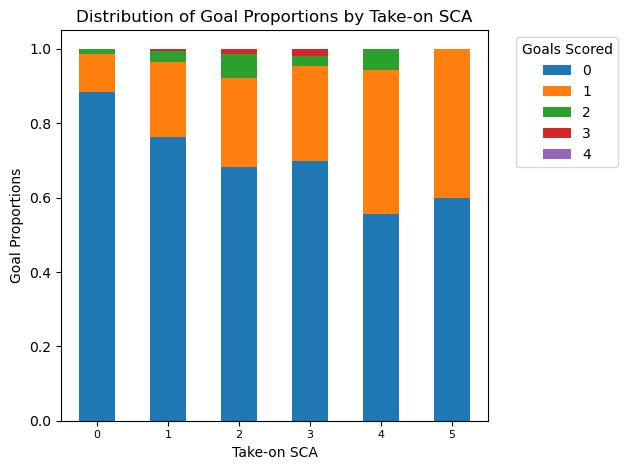

In [144]:
goals_by_takeonsca = att_explore.groupby(['Take-on SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_takeonsca = goals_by_takeonsca.div(goals_by_takeonsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_takeonsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Take-on SCA')
ax.set_xlabel('Take-on SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There does appear to be a relationship between the proportion of observations that have recorded at least 1 goal and the number of Take-on SCA accumulated. 

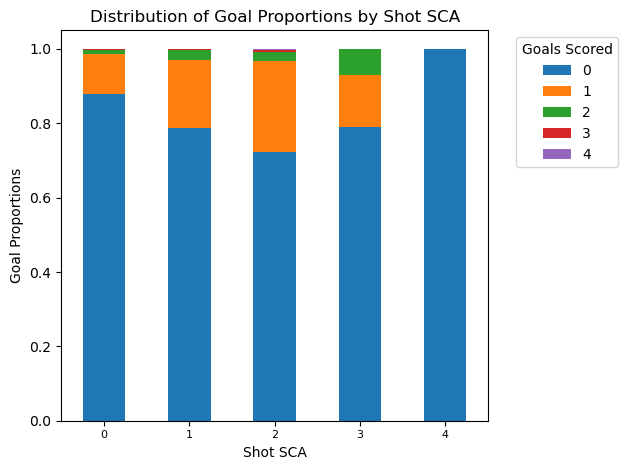

In [145]:
goals_by_shotsca = att_explore.groupby(['Shot SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_shotsca = goals_by_shotsca.div(goals_by_shotsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_shotsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot SCA')
ax.set_xlabel('Shot SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Interestingly, there doesn't appear to be a relationship between Shot SCA and Goal Proportions. This surprising because I would've expected Shot SCA to have the strongest relationship with Goals, out of all of the different types of SCA. This is because those in a position to accumulate a shot creating action by having a shot themselves are probably the same players that are more likely to be in shooting positions. We saw previously the relationship between shots and goals, so there was some expectation from me of a relationship between these two features. However, the plot seems to say otherwise. 

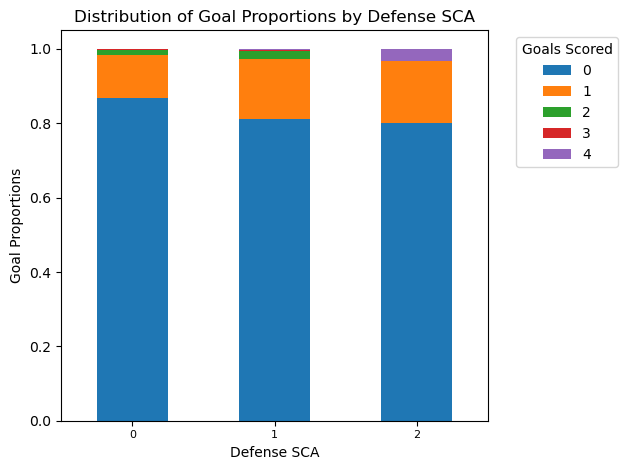

In [146]:
goals_by_defensesca = att_explore.groupby(['Defense SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_defensesca = goals_by_defensesca.div(goals_by_defensesca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_defensesca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Defense SCA')
ax.set_xlabel('Defense SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

The plot above shows us that it is unlikely there is any relationship between the number of Defense SCA and Goals. Although this is expected, we should also keep in mind that the number of observations with Defence SCA's is quite low. In other words, the small sample size may actually be hiding an underlying relationship, although this is unlikely. It is also interesting that there appears to be an observation that recorded 4 goals and 2 Defense SCA's, just for interest let's take a look. 

In [147]:
att_explore[(att_explore['Defense SCA'] == 2) & (att_explore['Goals'] == 4)]

Day  Matchweek Venue Result             Team Opponent Start Position  \
2455  Sat         34  Home  W 5–1  Manchester City  Watford     Y    RW,LW   

      Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  Midfielders  \
2455              90      4  ...   0   0   1   0          0            0   

      Wide Midfielders  Wingers  Penalty Success Rate  SOT Percentage  
2455                 0        1                   1.0             0.6  

[1 rows x 127 columns]

This observation refers to the data for Gabriel Jesus in the match he played for Man City vs Watford. The 2 defensive SCA is probably from Jesus tackling/intercepting the opposition passes which led to a shot. This tracks because Gabriel Jesus is known as one of the best pressers in the league. 

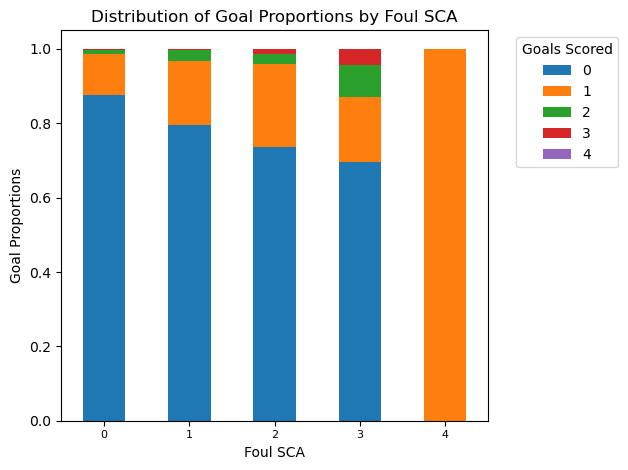

In [148]:
goals_by_foulsca = att_explore.groupby(['Foul SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_foulsca = goals_by_foulsca.div(goals_by_foulsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_foulsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Foul SCA')
ax.set_xlabel('Foul SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There appears to be a significant relationship between the number of Foul SCA accumulated and the proportion of observations that record at least 1 goal. In fact, every single observation that recorded 4 Foul SCA scored 1 goal. Let's have a look to see whether this is a sample size issue. 

In [149]:
att_explore[att_explore['Foul SCA'] == 4]

Day  Matchweek Venue Result       Team Opponent Start Position  \
21141  Sat          5  Away  D 2–2  Liverpool  Everton     Y    LW,FW   

       Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  Midfielders  \
21141              90      1  ...   0   0   0   0          0            0   

       Wide Midfielders  Wingers  Penalty Success Rate  SOT Percentage  
21141                 0        1                   NaN             0.5  

[1 rows x 127 columns]

So we can see that there was only 1 observation in the entire dataset that recorded 4 Foul SCA's. 

The pattern that the plot above shows is quite unexpected. Let's try to investigate this further by first looking into what positions are more likely to accumulate Foul SCA. My impression is that players that play in either a FW or Winger position will accumulate the most Foul SCA. 

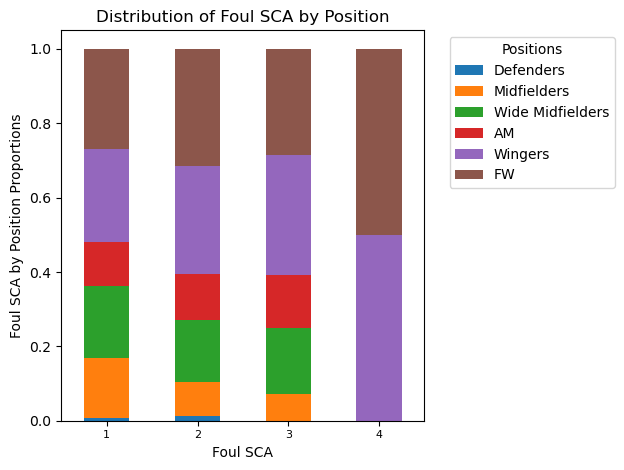

In [150]:
#foulsca_by_pos is a new dataframe that only includes the columns related to Shot Creating Actions
foulsca_by_pos = att_explore[['Foul SCA', 'Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_foulsca = foulsca_by_pos.groupby('Foul SCA').sum()
total_foulsca = grouped_foulsca.sum(axis = 1)

#proportion of each sca type 
sca_prop = grouped_foulsca.div(total_foulsca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
sca_prop = sca_prop[sca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

sca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Foul SCA by Position')
ax.set_xlabel('Foul SCA')
ax.set_ylabel('Foul SCA by Position Proportions')
ax.legend(title = 'Positions', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see that wingers and FW positions dominate the observations that have accumulated at least 1 Foul SCA. This is as expected. However, we can see that the proportion of either Wingers/FW that are accumulating Foul SCA doesn't increase with increases in Foul SCA. In other words, the pattern we saw previously cannot be attributed to the position played by each player. Let's now plot Foul SCA against xG to see if there is any noticeable relationship. 

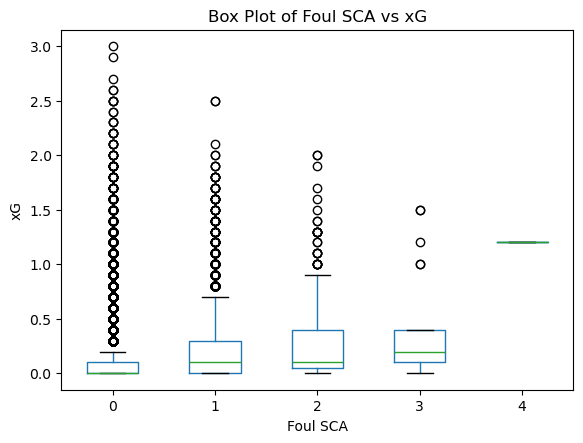

In [151]:
plt.figure
att_explore.boxplot(column = 'xG', by = 'Foul SCA', grid = False)
plt.title('Box Plot of Foul SCA vs xG')
plt.suptitle('')
plt.xlabel('Foul SCA')
plt.ylabel('xG')
plt.show()

So it appears that the median xG value for different Foul SCA doesn't really differ too much. There are also quite a few outliers especially for the observations with 0 Foul SCA. This is quite unexpected, given the pattern we saw between Foul SCA and Goal Proportions, as well as the known relationship between xG and Goals. 

Finally, let's have a quick look at the relationship between SCA and Assists. We expect there to be a stronger relationship between these two features, since SCA is a metric that better captures the creativity/chance creation of a player, rather than their ability to score goals. 

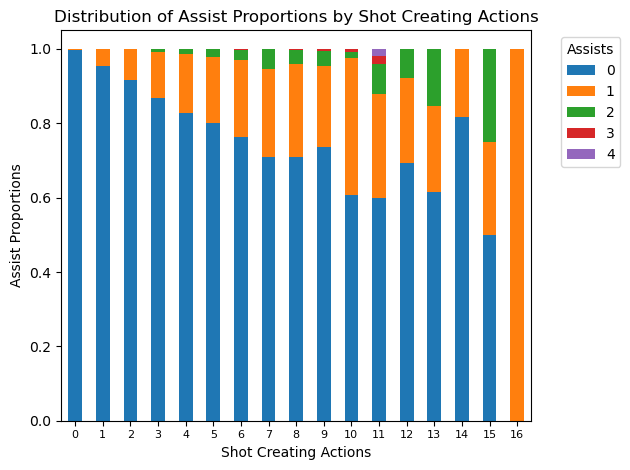

In [152]:
assists_by_sca = att_explore.groupby(['Shot Creating Actions', 'Assists']).size().unstack(fill_value = 0)
assistprop_by_sca = assists_by_sca.div(assists_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

assistprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Assist Proportions by Shot Creating Actions')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Assist Proportions')
ax.legend(title = 'Assists', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Similarly, we can see a steady increase in the proportion of observations that record an assist, as the number of SCA increases. This continues until approximately 7 SCA. After this point, the pattern gets a bit more muddled, but this is probably due to sample size issues. 

#### Goal Creating Actions (GCA)

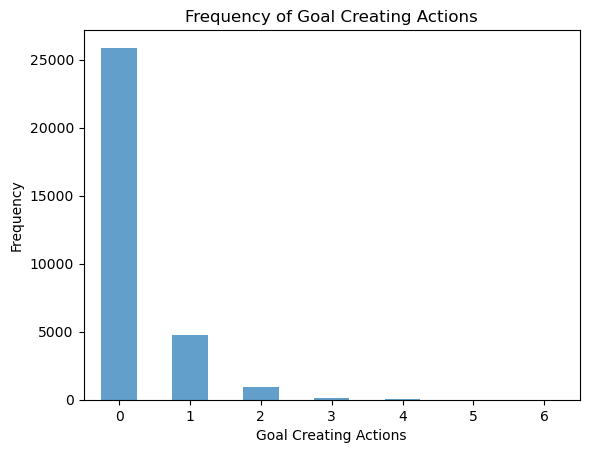

In [153]:
gca_count = att_explore['Goal Creating Actions'].value_counts().sort_index()

fig, ax = plt.subplots()

gca_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Goal Creating Actions')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Goal Creating Actions')

plt.xticks(rotation = 0)
plt.show()

In comparison to SCA, we can see that the number of observations with GCA = 0 is a lot more. It appears that it is more common for players to accumulate no GCA. 

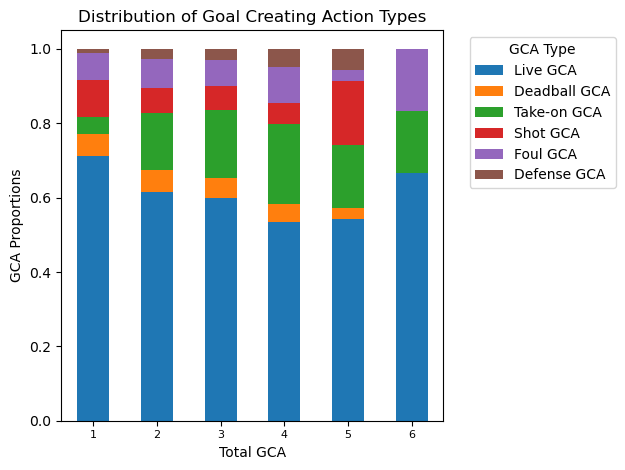

In [154]:
#gca_types is a new dataframe that only includes the columns related to Shot Creating Actions
gca_types = att_explore[['Live GCA', 'Deadball GCA', 'Take-on GCA', 'Shot GCA', 'Foul GCA', 'Defense GCA', 'Goal Creating Actions']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_gca = gca_types.groupby('Goal Creating Actions').sum()
total_gca = grouped_gca.sum(axis = 1)

#proportion of each sca type 
gca_prop = grouped_gca.div(total_gca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
gca_prop = gca_prop[gca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

gca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Creating Action Types')
ax.set_xlabel('Total GCA')
ax.set_ylabel('GCA Proportions')
ax.legend(title = 'GCA Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

So once again, Live GCA dominates the types of GCA. This is closely followed by Take-on GCA (this is different to SCA, where the next most common type of SCA was Deadball SCA). There seem to be some outliers, where Shot GCA appears to be quite common when a player accumulates either 1 or 5 GCA, but much less common if the GCA accumulated is equal to 2, 3 or 4. In contrast to SCA, Deadball GCA is consistently one of the least common types of GCA. This perhaps speaks to the fact that deadballs (i.e. freekicks or corners) are good opportunities to generate a shot, but bad opportunities to generate a goal. In other words, a chance is generated, but not a very good chance. 

GCA and Assists appear to be closely related to each other. Let's first investigate the relationship between these two features. 

In [155]:
#first, let's look at whether or not GCA = Assists for each observation 
gca_notequal_assists = att_explore[~(att_explore['Goal Creating Actions'] == att_explore['Assists'])]
gca_notequal_assists

Day  Matchweek Venue Result             Team        Opponent Start  \
168    Sun         38  Home  W 5–0  Manchester City    Norwich City    Y*   
5552   Sat         22  Home  W 1–0  Manchester City         Chelsea    Y*   
35001  Sun         21  Away  D 2–2        Liverpool         Chelsea     Y   
38830  Sat         17  Home  W 3–0    Newcastle Utd          Fulham     Y   
5876   Sat         28  Away  D 1–1   Leicester City       Brentford     Y   
...    ...        ...   ...    ...              ...             ...   ...   
3235   Sun         37  Home  D 1–1     Leeds United        Brighton     Y   
1402   Sat         37  Home  L 2–3     Cardiff City  Crystal Palace     Y   
10927  Sun         32  Away  L 1–2   Crystal Palace  Leicester City     Y   
34087  Tue          5  Away  D 1–1          Everton    Leeds United     Y   
24883  Sat          1  Home  D 1–1      Bournemouth        West Ham     Y   

      Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
168         LM              84      0  ...   0   0   0   0          0   
5552        AM              83      1  ...   0   0   0   0          0   
35001       CM              90      0  ...   0   0   0   0          0   
38830       LW              83      0  ...   0   0   0   0          0   
5876        DM              90      0  ...   0   0   0   0          0   
...        ...             ...    ...  ...  ..  ..  ..  ..        ...   
3235        FW              90      0  ...   0   0   0   0          0   
1402     CM,FW              90      1  ...   0   0   0   0          0   
10927       LW              90      1  ...   0   0   0   0          0   
34087       RW              90      0  ...   0   0   1   0          0   
24883       FW              90      1  ...   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
168              0                 1        0                   NaN   
5552             0                 0        0                   NaN   
35001            1                 0        0                   NaN   
38830            0                 0        1                   NaN   
5876             1                 0        0                   NaN   
...            ...               ...      ...                   ...   
3235             0                 0        0                   NaN   
1402             1                 0        0                   NaN   
10927            0                 0        1                   0.0   
34087            0                 0        1                   NaN   
24883            0                 0        0                   NaN   

       SOT Percentage  
168          0.200000  
5552         0.750000  
35001             NaN  
38830        0.250000  
5876         0.000000  
...               ...  
3235         0.000000  
1402         1.000000  
10927        0.250000  
34087        0.000000  
24883        0.666667  

[3949 rows x 127 columns]

So there are 3949 observations where GCA does not equal Assists. Let's have a look at how the counts differ for these observations. 

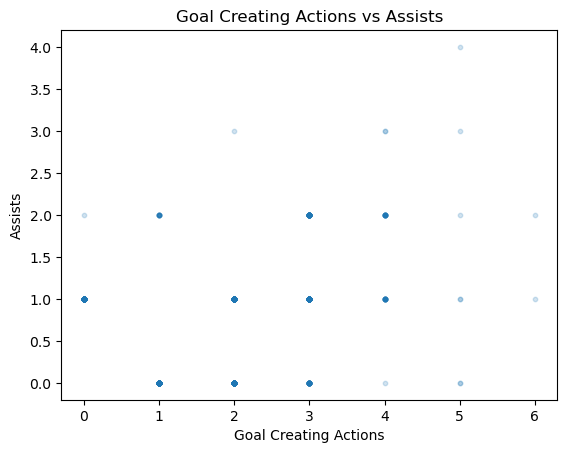

In [156]:
plt.figure()

plt.scatter(gca_notequal_assists['Goal Creating Actions'], gca_notequal_assists['Assists'], alpha = 0.2, s = 10)
plt.title('Goal Creating Actions vs Assists')
plt.xlabel('Goal Creating Actions')
plt.ylabel('Assists')
plt.show()

Interestingly, there are a wide range of possible combinations. For example, there are certain observations where the number of Assists is larger than the number of GCA (How is this possible?). There are also quite a few observations where the number of GCA are larger than the number of Assists. According to https://mtag.substack.com/p/data-explainers, a GCA is accumulated if the player is involved in of the last two offensive actions leading up to a goal. Although this explains why certain players have more GCA than Assists (for example, if they complete a take-on, pass the ball to another player who then assists the goal, this player will have accumulated 1 Take-on GCA, but not an assist), it doesn't explain why there are certain observatoins with more Assists than GCA. We can further filter the dataset to investigate. 

In [157]:
gca_notequal_assists[gca_notequal_assists['Assists'] > gca_notequal_assists['Goal Creating Actions']]

Day  Matchweek Venue Result            Team        Opponent Start  \
27791  Wed         34  Away  W 3–1       Liverpool        Brighton     Y   
2250   Sat         35  Home  W 2–0     Aston Villa    Norwich City     N   
15101  Sat         29  Away  W 3–1  Crystal Palace         Burnley     Y   
23217  Mon          2  Home  D 1–1       Liverpool  Crystal Palace    Y*   
846    Sun         35  Home  W 1–0         Everton         Chelsea     Y   
...    ...        ...   ...    ...             ...             ...   ...   
1142   Fri          9  Away  L 1–3     Aston Villa         Arsenal     N   
7759   Tue          5  Away  D 1–1         Everton    Leeds United     Y   
25836  Sun         32  Home  W 2–1  Leicester City  Crystal Palace     Y   
5124   Sat         34  Away  W 3–0   Newcastle Utd    Norwich City     Y   
1524   Sun         13  Away  W 2–1   Newcastle Utd       Tottenham     Y   

      Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
27791       RW              90      2  ...   0   0   1   0          0   
2250        AM              15      0  ...   0   0   0   0          0   
15101       CM              90      0  ...   0   0   0   0          0   
23217       LM              62      0  ...   0   0   0   0          0   
846         LM              89      0  ...   0   0   0   0          0   
...        ...             ...    ...  ...  ..  ..  ..  ..        ...   
1142        RW              45      0  ...   0   0   1   0          0   
7759        LM              90      0  ...   0   0   0   0          0   
25836       RW              88      0  ...   0   0   1   0          0   
5124     LW,FW              90      0  ...   0   0   0   0          0   
1524        RM              90      0  ...   0   1   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
27791            0                 0        1                   NaN   
2250             0                 0        0                   NaN   
15101            1                 0        0                   NaN   
23217            0                 1        0                   NaN   
846              0                 1        0                   NaN   
...            ...               ...      ...                   ...   
1142             0                 0        1                   NaN   
7759             0                 1        0                   NaN   
25836            0                 0        1                   NaN   
5124             0                 0        1                   NaN   
1524             0                 1        0                   NaN   

       SOT Percentage  
27791           0.625  
2250            0.000  
15101           0.000  
23217           0.000  
846             0.500  
...               ...  
1142            0.500  
7759              NaN  
25836           0.000  
5124            1.000  
1524              NaN  

[105 rows x 127 columns]

So there are actually 105 observations that have more Assists than GCA. The reason why it is possible to have more Assists than GCA is still unclear. A quick search online did not yield any results. I suspect it has something to do with how a GCA is defined, compared to an Assist. For example, there may be certain situations where an Assist is given to a player, but the nature of the assist is such that it doesn't fall under any of the GCA categories, so a GCA is then not given. 

Let's now have a quick look at the relationship between GCA and Goals. We don't expect there to be any particular relationship between these two features, for similar reasons as discussed above.

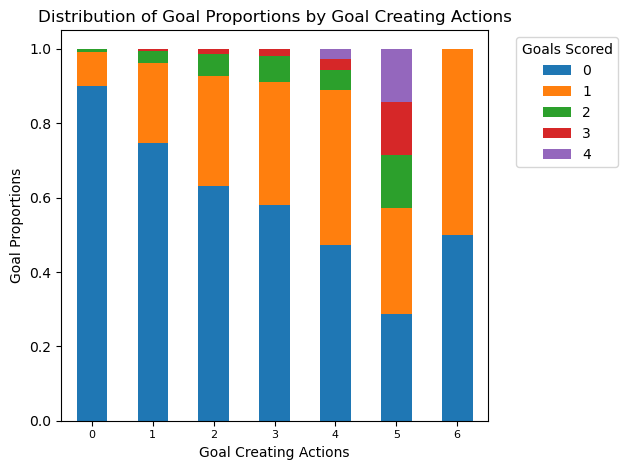

In [158]:
goals_by_gca = att_explore.groupby(['Goal Creating Actions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Goal Creating Actions')
ax.set_xlabel('Goal Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Again, it is surprising to see that the proportion of observations that have recorded a goal is steadily increasing as the number of GCA increases. For the observations that accumulate 5 GCA, almost 70% of them also score at laest 1 goal. Let's subset and have a look at these observations. 

In [159]:
att_explore[att_explore['Goal Creating Actions'] == 5]

Day  Matchweek Venue Result             Team        Opponent Start  \
14895  Sat         20  Home  W 5–1        Liverpool         Arsenal     Y   
14759  Sat          4  Home  W 9–0        Liverpool     Bournemouth     Y   
23586  Sat         11  Home  W 6–1  Manchester City     Bournemouth     Y   
5512   Sun          9  Home  W 6–3  Manchester City  Manchester Utd     Y   
29841  Fri         10  Away  W 9–0   Leicester City     Southampton     Y   
22492  Sat         25  Away  W 5–0          Arsenal         Burnley     Y   
2455   Sat         34  Home  W 5–1  Manchester City         Watford     Y   

      Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
14895    AM,LW              90      3  ...   0   0   0   0          0   
14759       FW              68      2  ...   0   0   0   0          0   
23586       WB              90      1  ...   0   0   0   1          0   
5512        RM              74      0  ...   0   1   0   0          0   
29841       LM              71      0  ...   0   0   0   0          0   
22492       LM              83      1  ...   0   0   0   0          0   
2455     RW,LW              90      4  ...   0   0   1   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
14895            0                 0        1                   1.0   
14759            0                 0        0                   NaN   
23586            0                 0        0                   NaN   
5512             0                 1        0                   NaN   
29841            0                 1        0                   NaN   
22492            0                 1        0                   NaN   
2455             0                 0        1                   1.0   

       SOT Percentage  
14895        0.750000  
14759        0.800000  
23586        0.333333  
5512         0.666667  
29841        0.666667  
22492        0.500000  
2455         0.600000  

[7 rows x 127 columns]

So there are only 7 observations in the entire dataset that accumulated 5 GCA in one game. We can see that all of these games have a lage number of goals scored. The lowest scoring game involved the player's team scoring 5 goals. Therefore, it may be the case that the players accumulating more GCA's per game are also the same players playing for the teams that score a lot of goals (which is why they are accumulating so many GCA). Since we know from previous data exploration that the teams that proportion of observations scoring at least 1 goal increases as the number of goals the team scores increases, this could potentially explain the relationship between GCA and Goals. To test this, we can separate the dataset based on the number of goals scored by the team for each observation. For different number of goals, we can reproduce the plot above, to see whether the relationship still holds. 

In [160]:
def team_goals_filter (team_goals):
    return att_explore[
    att_explore['Result']
    .str.replace('–', '-', regex=False)  # Replace en dash with hyphen
    .str.split(' ')
    .str[1]
    .str.split('-')
    .str[0]
    .astype(int) == team_goals
]

teamgoals_df = [team_goals_filter(1), team_goals_filter(2), team_goals_filter(3), 
                team_goals_filter(4), team_goals_filter(5), team_goals_filter(6), 
                team_goals_filter(7), team_goals_filter(8), team_goals_filter(9)
                ]
    

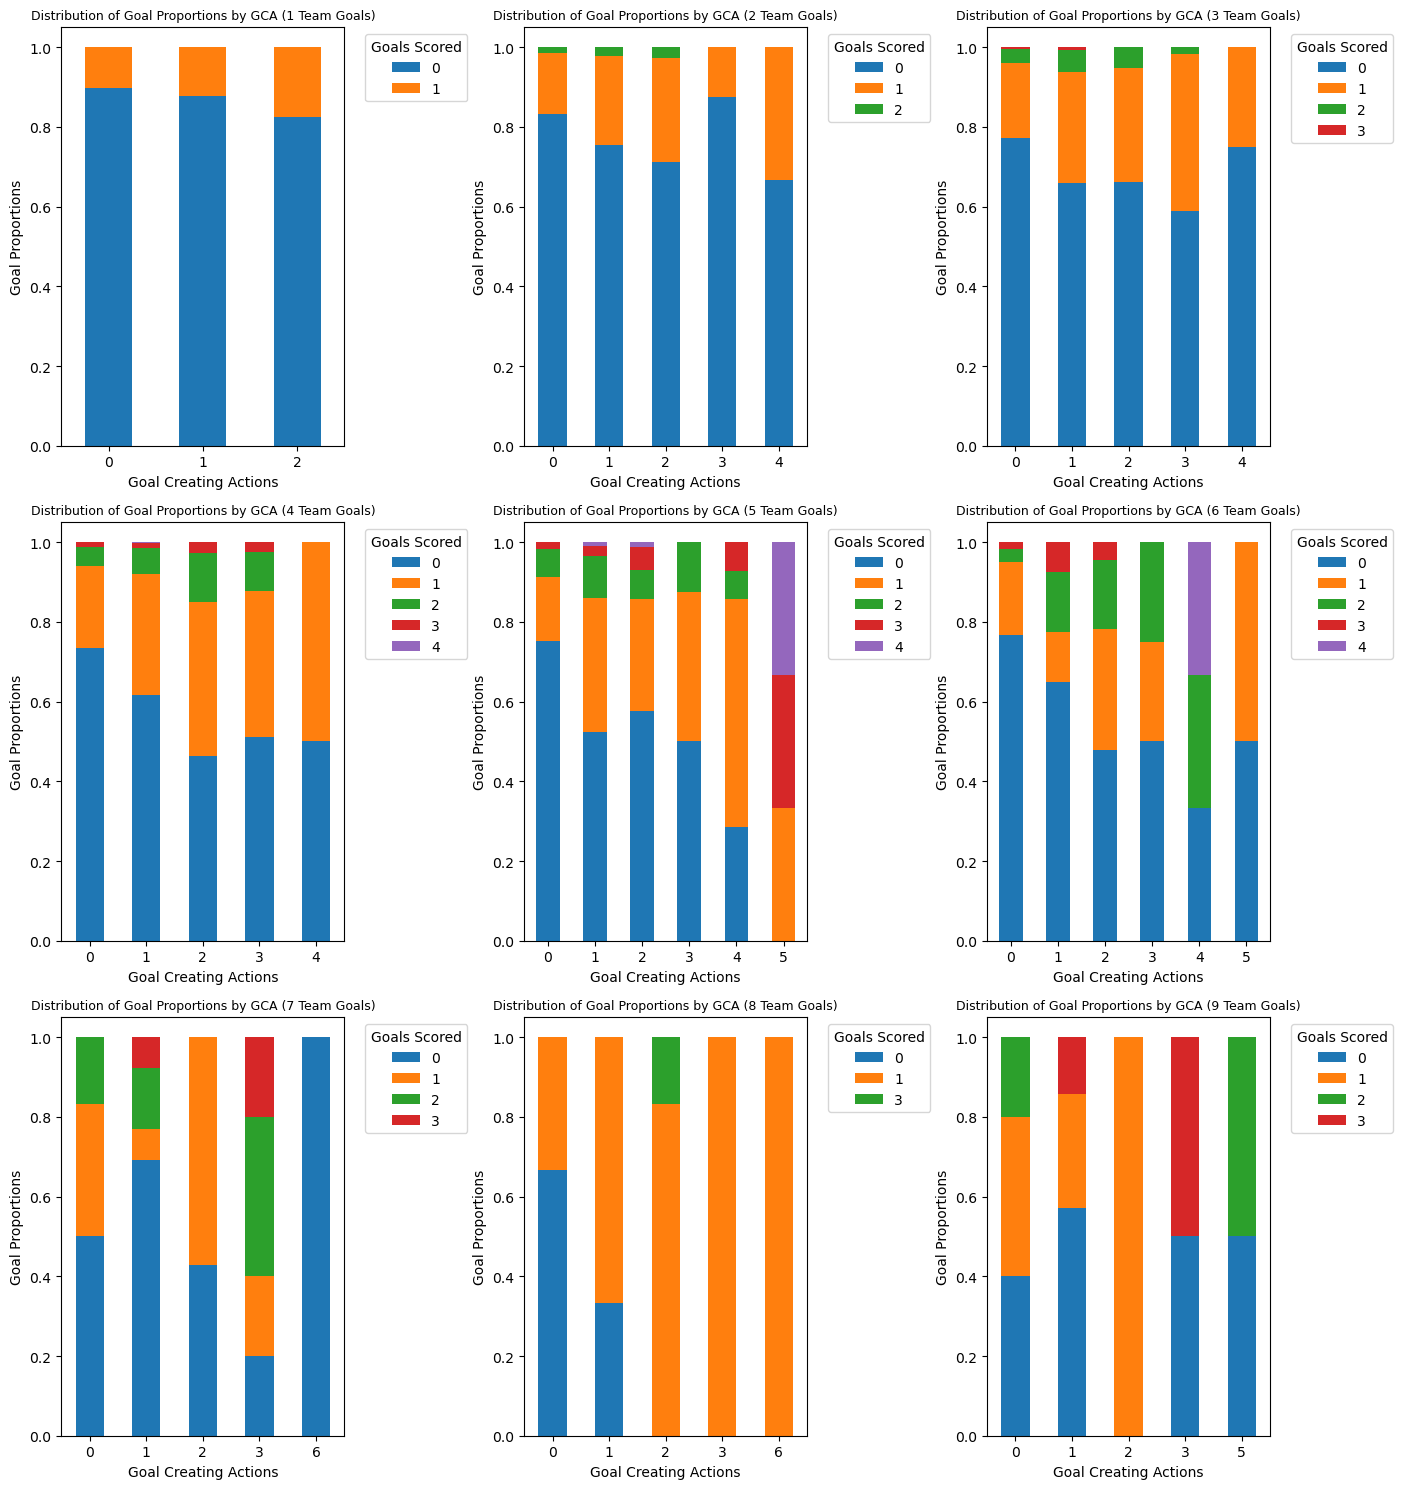

In [161]:
def gca_teamgoals_plotter (df, ax):
    goals_by_gca = df.groupby(['Goal Creating Actions', 'Goals']).size().unstack(fill_value = 0)
    goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

    goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
    ax.set_title(f'Distribution of Goal Proportions by GCA ({i+1} Team Goals)', fontsize=9)  # Dynamic title
    ax.set_xlabel('Goal Creating Actions')
    ax.set_ylabel('Goal Proportions')
    ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.tick_params(axis = 'x', rotation = 0)

fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter(df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()


There are a few takeaways from this set of plots. We can see that there is definitely a positive relationship between GCA and Team Goals and how these two features affect goal proportions. For example, we can see that for observations where 1 team goal was scored, the 10% of the observations that also accumulated 1 GCA scored at least 1 goal. This proportion increases to just over 20% when 2 team goals are scored and so on. This pattern continues steadily to 5 team goals, where almost 50% of the observations with 5 team goals and 1 GCA score at least 1 goal. For the observations with more than 5 team goals, this pattern gets a little bit muddied. However, this is most likely due to a small sample size. Regardless of this though, there does still seem to be a relationship between GCA and Goals when keeping Team Goals constant. 

Let's next have a look at the relationship between different types of GCA and Goals. 

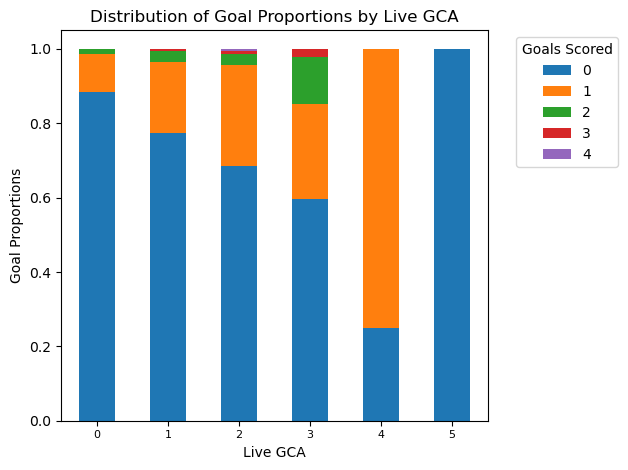

In [164]:
goals_by_livegca = att_explore.groupby(['Live GCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_livegca = goals_by_livegca.div(goals_by_livegca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_livegca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Live GCA')
ax.set_xlabel('Live GCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see a pretty clear pattern where an increased number of Live GCA accumulated is assoicated with a greater proportion of the observations recording at least 1 goal scored. Let's have a look to see if this pattern continues to hold if we hold Team Goals constant. 

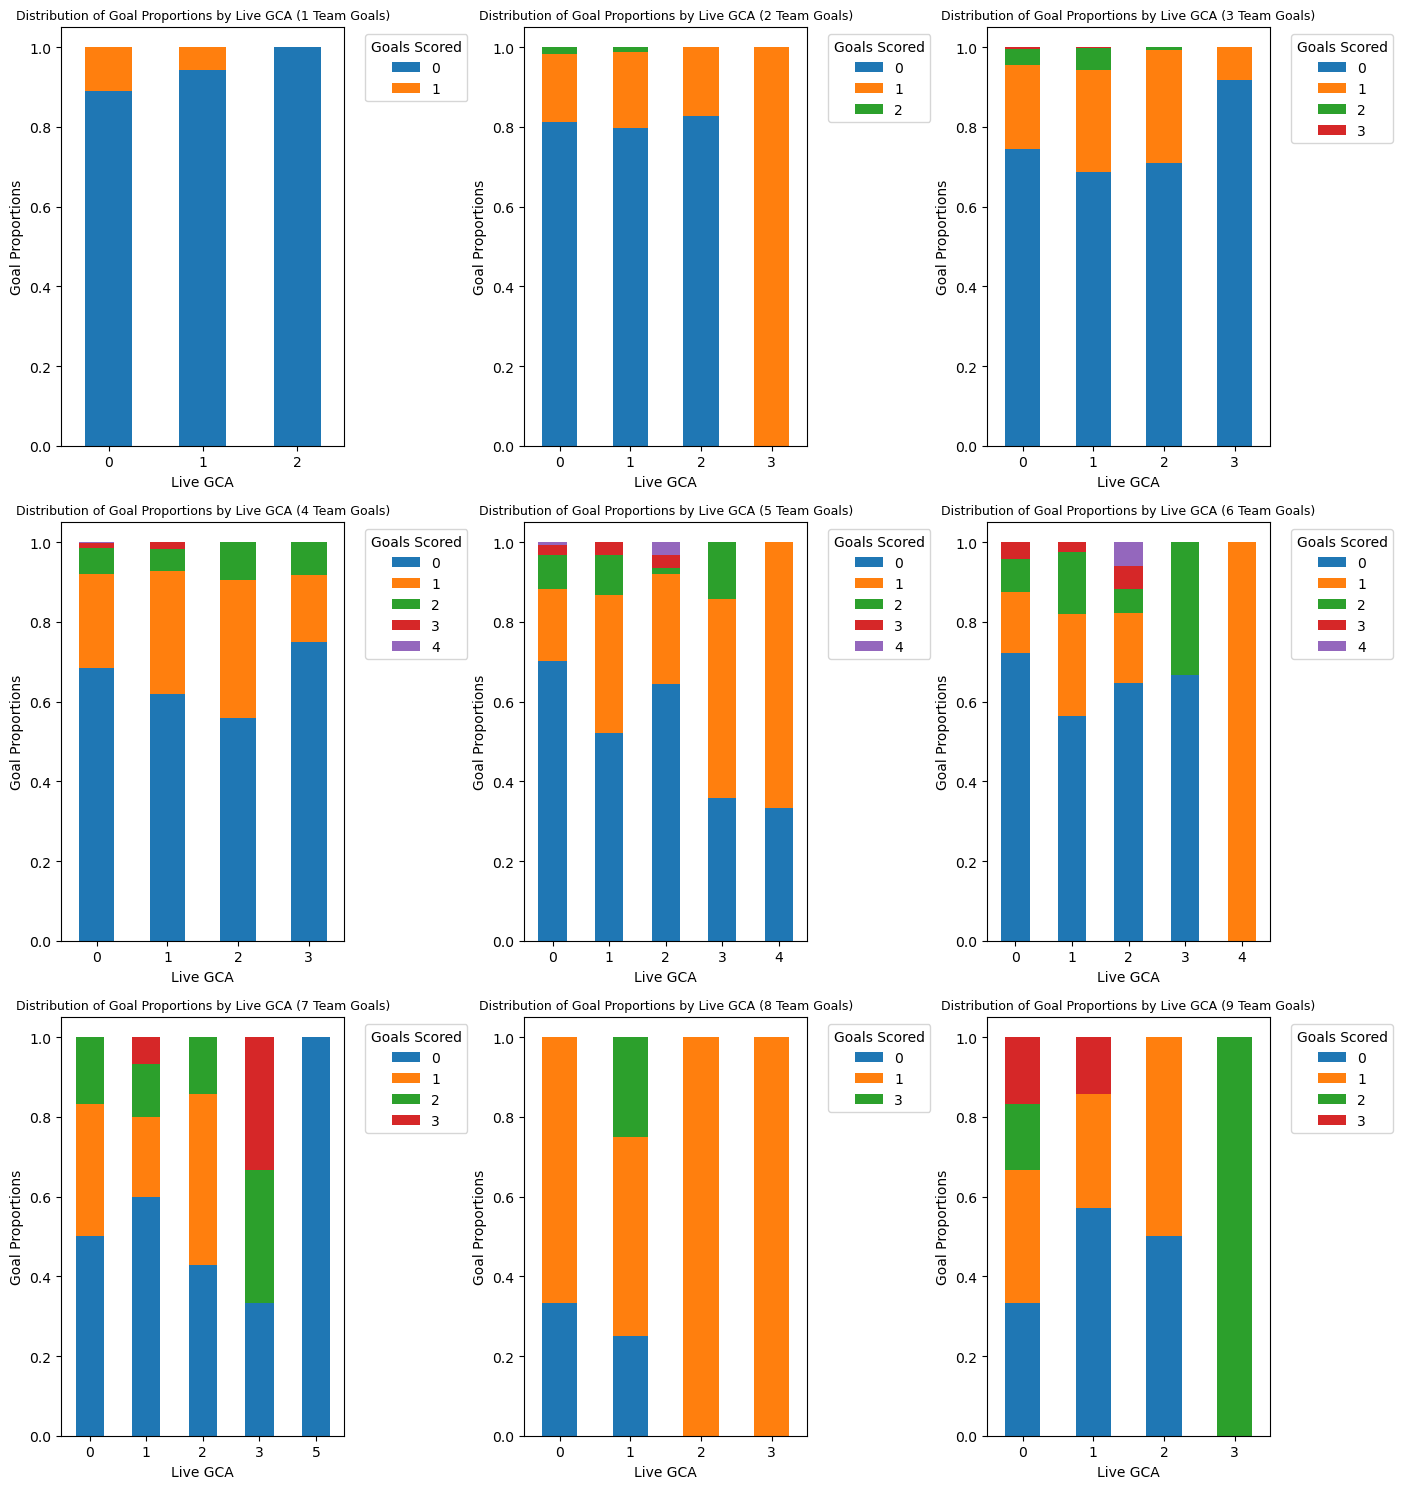

In [165]:
#modify gca_teamgoals_plotter by allowing us to specify the feature we wish to plot, instead of holding it constant at 'Goal Creating Actions' 
def gca_teamgoals_plotter (feature, df, ax):
    goals_by_gca = df.groupby([feature, 'Goals']).size().unstack(fill_value = 0)
    goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

    goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
    ax.set_title(f'Distribution of Goal Proportions by {feature} ({i+1} Team Goals)', fontsize=9)  # Dynamic title
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Goal Proportions')
    ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.tick_params(axis = 'x', rotation = 0)

fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Live GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

Looking at this set of plots, it doesn't appear as if there is any significant relationship between Live GCA and the proportion of goals scored. For observations with between 1 to 3 team goals, the proportion of observations that record at least 1 goal is pretty constant when holding team goals constant. However, the proportion increases when the proportion of team goals increases (this is not surprising). The plots look more interesting when the number of team goals is 4 or greater. For example, observations with 8 team goals almost always record at least 1 goal scored regardless of the number of Live GCA accumulated. 

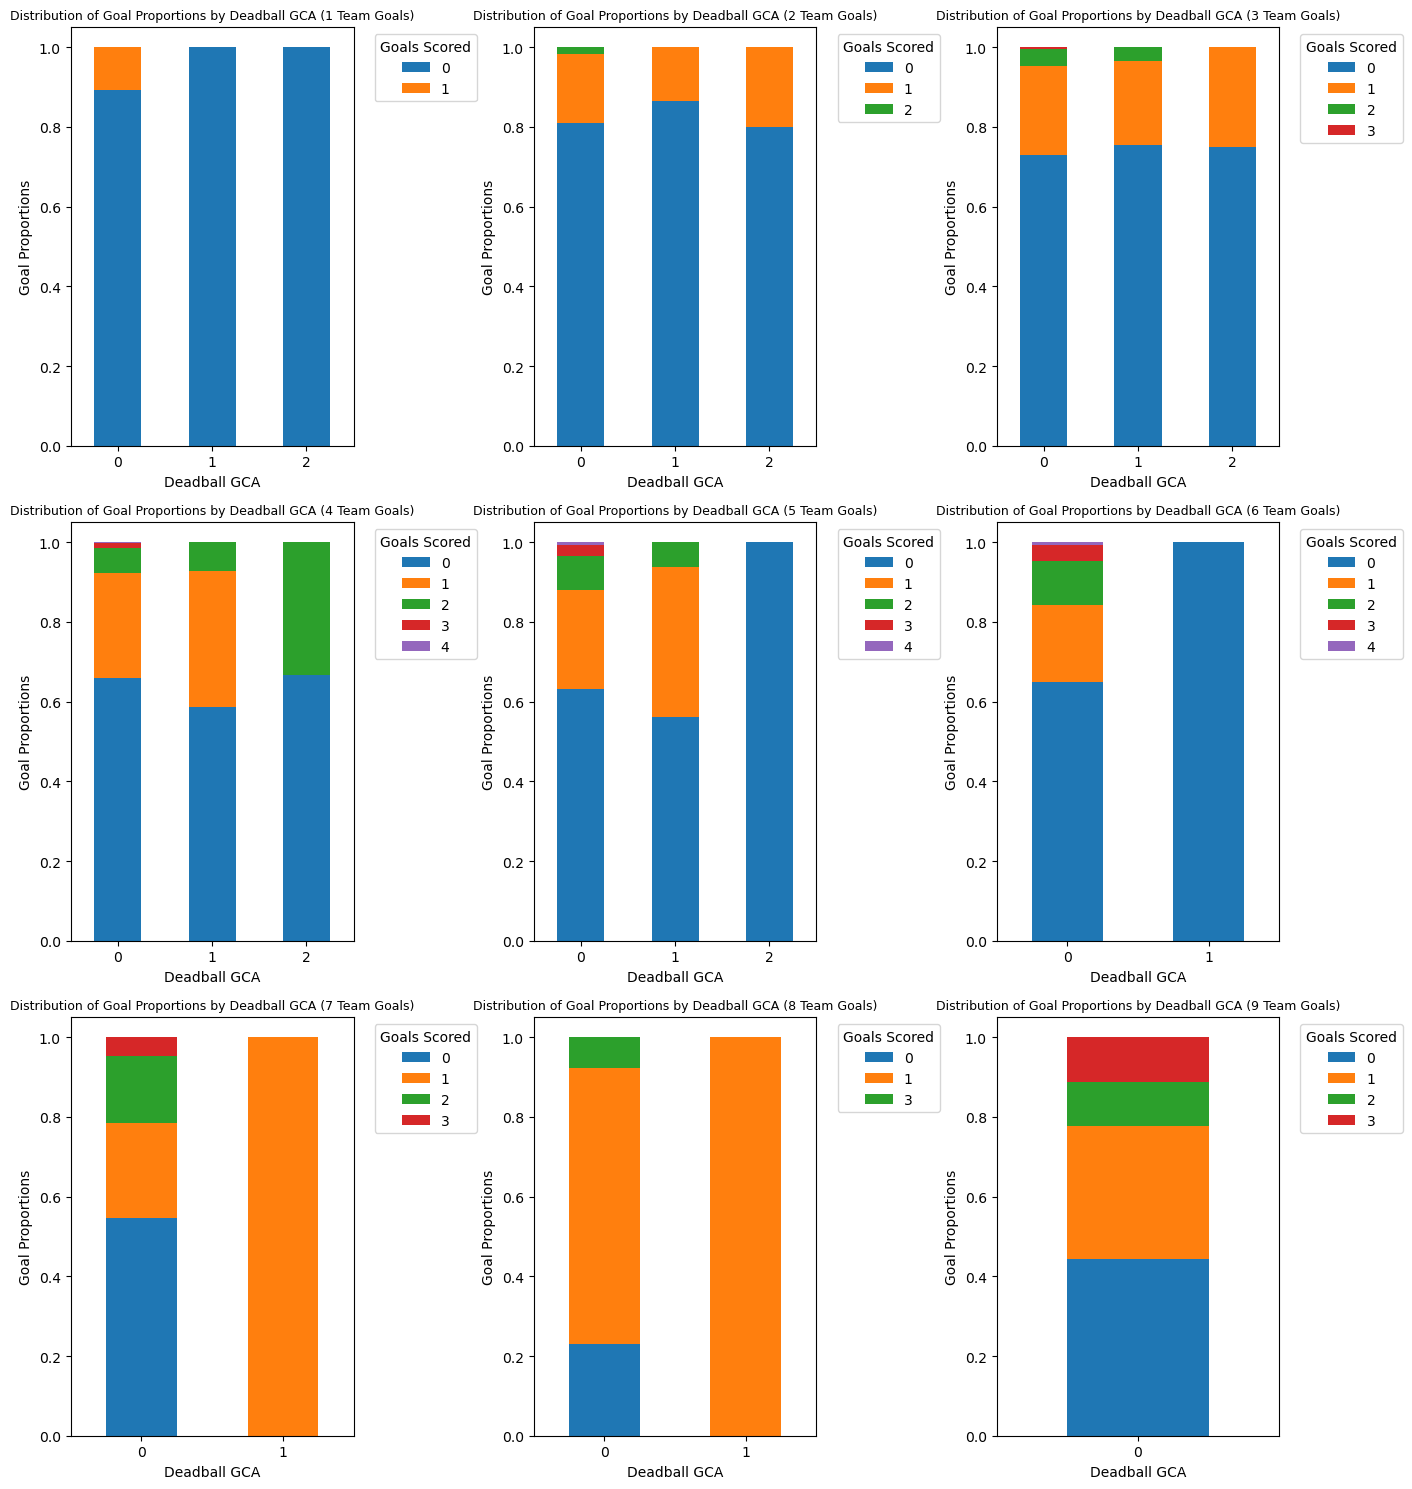

In [166]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Deadball GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

Once again, we see a similar pattern here where there isn't much variation in the proportion of goals scored for different values of Deadball GCA accumulated when keeping Team Goals constant. 

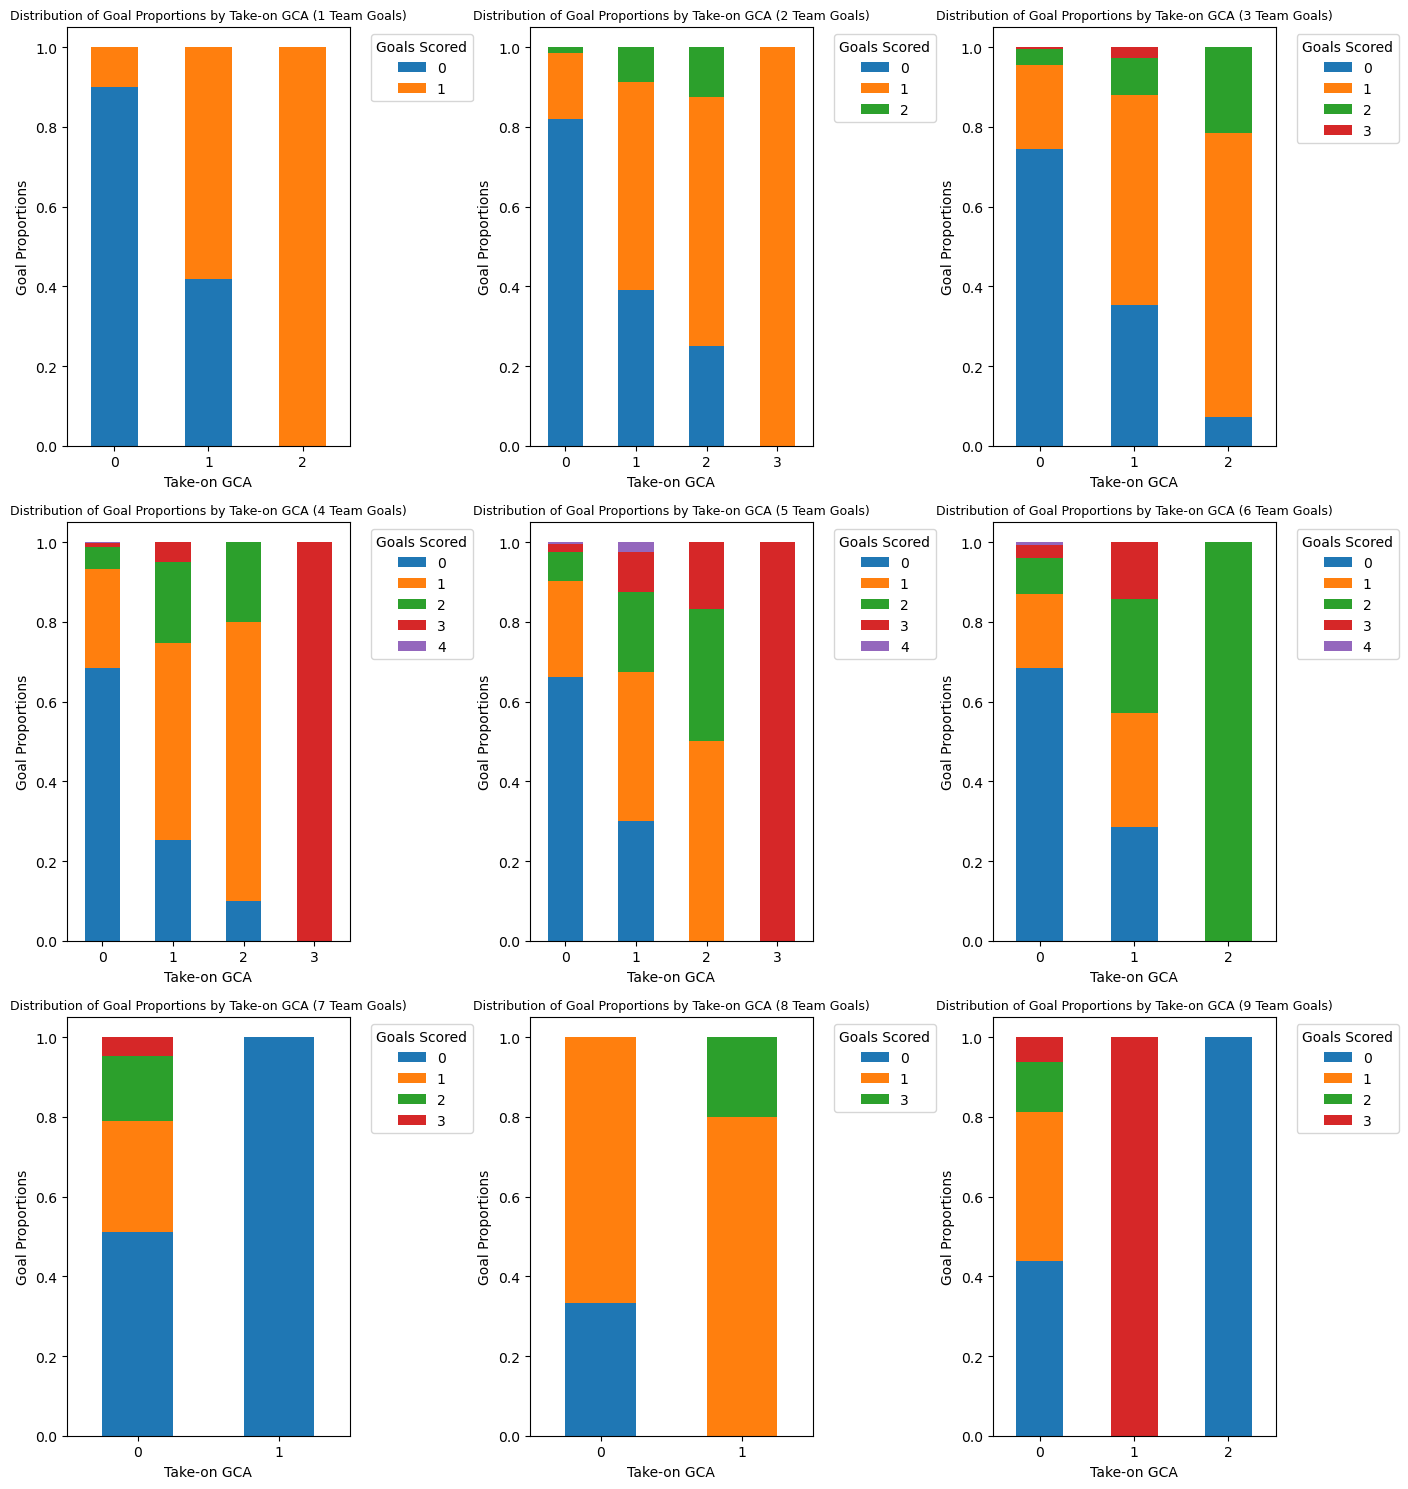

In [168]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Take-on GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

These set of plots show us that there is potentially quite a strong relationship between the number of Take-on GCA accumulated and Goals. For example, the proportion of observations with 2 team goals,  2 Take-on GCA and at least 1 goal scored is at least 70%. Just to check this isn't a sample size issue, let's look at how many observations have both 2 team goals and 2 take-on GCA. 

In [174]:
teamgoals_df[2].loc[teamgoals_df[2]['Take-on GCA'] == 2]

Day  Matchweek Venue Result             Team       Opponent Start  \
36566  Sun         10  Home  W 3–1         West Ham         Fulham     N   
37166  Mon         28  Home  W 3–2          Chelsea  Newcastle Utd     N   
18398  Sun         34  Home  W 3–1    Newcastle Utd    Southampton     N   
2381   Sun         23  Away  L 3–4  Manchester City      Liverpool     Y   
22760  Sat         11  Home  W 3–1          Everton       Brighton     Y   
36861  Sat         10  Home  W 3–0          Watford   Huddersfield     Y   
23102  Sat         17  Home  W 3–0    Newcastle Utd         Fulham     Y   
31257  Sat          1  Away  L 3–4     Leeds United      Liverpool     Y   
35181  Sat          5  Home  D 3–3          Chelsea    Southampton     Y   
5217   Sat         17  Home  W 3–2          Watford   Cardiff City     Y   
11027  Sat         29  Away  W 3–1   Crystal Palace        Burnley     Y   
4630   Sat         26  Away  W 3–0   Manchester Utd         Fulham     Y   
7092   Sat         35  Away  W 3–0         Brighton         Wolves     Y   
5210   Sat         10  Home  W 3–0          Watford   Huddersfield     Y   

      Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
36566       FW              11      1  ...   0   0   0   0          0   
37166       AM              20      1  ...   0   0   0   0          0   
18398       FW              45      2  ...   0   0   0   0          0   
2381        LW              90      1  ...   0   0   0   0          0   
22760    FW,RW              90      2  ...   0   0   1   0          0   
36861       AM              90      1  ...   0   0   0   0          0   
23102       CM              90      0  ...   0   0   0   0          0   
31257       LM              90      1  ...   0   0   0   0          0   
35181       FW              89      2  ...   0   0   0   0          0   
5217     FW,AM              86      1  ...   0   0   0   0          0   
11027       RW              78      1  ...   0   0   1   0          0   
4630        LW              69      1  ...   0   0   0   0          0   
7092     WB,AM              88      1  ...   0   0   0   1          0   
5210        FW              64      1  ...   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
36566            0                 0        0                   NaN   
37166            0                 0        0                   NaN   
18398            0                 0        0                   NaN   
2381             0                 0        1                   NaN   
22760            0                 0        1                   NaN   
36861            0                 0        0                   NaN   
23102            1                 0        0                   NaN   
31257            0                 1        0                   NaN   
35181            0                 0        0                   NaN   
5217             0                 0        0                   NaN   
11027            0                 0        1                   NaN   
4630             0                 0        1                   NaN   
7092             0                 0        0                   NaN   
5210             0                 0        0                   NaN   

       SOT Percentage  
36566        1.000000  
37166        1.000000  
18398        0.500000  
2381         0.500000  
22760        0.500000  
36861        1.000000  
23102        0.500000  
31257        1.000000  
35181        0.666667  
5217         0.333333  
11027        1.000000  
4630         0.666667  
7092         1.000000  
5210         0.250000  

[14 rows x 127 columns]

So there are only 14 observations that have both 2 team goals and 2 take-on GCA. So the pattern that we are seeing could potentially be attributed to a lack of sample size. 

In [175]:
teamgoals_df[2].loc[teamgoals_df[2]['Take-on GCA'] == 1]

Day  Matchweek Venue Result             Team        Opponent Start  \
38830  Sat         17  Home  W 3–0    Newcastle Utd          Fulham     Y   
35919  Sat         10  Away  W 3–0          Chelsea   Newcastle Utd     Y   
21904  Wed         27  Home  W 3–0          Chelsea        Brighton     Y   
36529  Sat         36  Home  W 3–0        Brentford     Southampton     Y   
2480   Sat         28  Away  W 3–0  Manchester City          Fulham     Y   
...    ...        ...   ...    ...              ...             ...   ...   
39585  Sun         30  Home  W 3–0    Newcastle Utd   Sheffield Utd     Y   
7378   Fri          6  Away  W 3–0     Leeds United     Aston Villa     Y   
25601  Sat         29  Home  D 3–3         Brighton       Brentford     Y   
37333  Thu         20  Away  W 3–2          Arsenal  Crystal Palace     Y   
1821   Thu         32  Home  W 3–0   Leicester City       West Brom     Y   

       Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
38830        LW              83      0  ...   0   0   0   0          0   
35919        AM              87      0  ...   0   0   0   0          0   
21904        LW              83      1  ...   0   0   0   0          0   
36529        FW              90      0  ...   0   0   0   0          0   
2480         LW              90      1  ...   0   0   0   0          0   
...         ...             ...    ...  ...  ..  ..  ..  ..        ...   
39585        RM              89      1  ...   0   1   0   0          0   
7378         CM              90      0  ...   0   0   0   0          0   
25601  RW,LB,RM              90      0  ...   0   1   1   0          1   
37333     AM,FW              90      2  ...   0   0   0   0          0   
1821         FW              84      1  ...   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
38830            0                 0        1                   NaN   
35919            0                 0        0                   NaN   
21904            0                 0        1                   NaN   
36529            0                 0        0                   NaN   
2480             0                 0        1                   NaN   
...            ...               ...      ...                   ...   
39585            0                 1        0                   NaN   
7378             1                 0        0                   NaN   
25601            0                 1        1                   NaN   
37333            0                 0        0                   NaN   
1821             0                 0        0                   NaN   

       SOT Percentage  
38830        0.250000  
35919             NaN  
21904        0.333333  
36529        0.333333  
2480         1.000000  
...               ...  
39585        1.000000  
7378         0.500000  
25601        0.500000  
37333        0.750000  
1821         0.500000  

[116 rows x 127 columns]

To further reiterate this point, we can see that there are only 116 observations that simultaneously have 1 Take-on GCA and 2 Team Goals. 

Something else we can investigate is the relationship between Goals and the proportion of GCA over Team Goals. In other words, we can group observations by how the number of GCA accumulated is related to the Team Goals. So observations with 1 GCA and 2 Team Goals will be grouped together with observations that have 2 GCA and 4 Team Goals. Grouping observations in this manner is essentially a way of grouping observations by attacking involvement. For example, observations that have a high attacking involvement may be more likely to score more goals because they are more involved in the attacking phases of the game (i.e. they are consistently in positions to both accumulate GCA and goals). However, we need to first check the relationship between GCA and Team Goals. I want to see whether or not there are any observations with more GCA than Team Goals (there shouldn't be, because GCA should only be accumulated when a team goal is scored.)

In [189]:
gca_greaterthan_teamgoals_counter = []

for i, df in enumerate(teamgoals_df):
    count = (df['Goal Creating Actions'] > i+1).sum()
    gca_greaterthan_teamgoals_counter.append(
        f'For DataFrame {i}, the number of observations that have more GCA than Team Goals is {count}'
    )
gca_greaterthan_teamgoals_counter

['For DataFrame 0, the number of observations that have more GCA than Team Goals is 91',
 'For DataFrame 1, the number of observations that have more GCA than Team Goals is 27',
 'For DataFrame 2, the number of observations that have more GCA than Team Goals is 8',
 'For DataFrame 3, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 4, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 5, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 6, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 7, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 8, the number of observations that have more GCA than Team Goals is 0']

So there are actually a few observations that have more GCA than Team Goals (predominantly when the number of Team Goals is not particularly high). This doesn't really make sense to me, let's investigate further by looking at the observations that have 1 team goal, but more than 1 GCA. 

In [191]:
teamgoals_df[0][(teamgoals_df[0]['Goal Creating Actions'] > 1)]

Day  Matchweek Venue Result             Team        Opponent Start  \
15131  Sat         28  Away  L 1–4         West Ham       Liverpool     Y   
26819  Sat         18  Home  D 1–1  Manchester City         Everton     Y   
2047   Sat         12  Away  W 1–0      Aston Villa          Wolves     Y   
9893   Fri         18  Away  D 1–1    Sheffield Utd     Aston Villa     N   
17932  Sat         13  Home  L 1–2          Burnley        West Ham     Y   
...    ...        ...   ...    ...              ...             ...   ...   
11226  Wed         28  Away  L 1–5      Bournemouth         Arsenal     Y   
35123  Sat          2  Away  W 1–0        West Brom         Burnley     N   
6980   Wed         24  Away  L 1–4         West Ham  Leicester City     Y   
16280  Sat         37  Away  L 1–2          Burnley       Tottenham     Y   
3235   Sun         37  Home  D 1–1     Leeds United        Brighton     Y   

      Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
15131       CM              90      0  ...   0   0   0   0          0   
26819       RW              90      0  ...   0   0   1   0          0   
2047        LM              90      0  ...   0   0   0   0          0   
9893        AM              33      0  ...   0   0   0   0          0   
17932       LM              80      0  ...   0   0   0   0          0   
...        ...             ...    ...  ...  ..  ..  ..  ..        ...   
11226       CM              90      0  ...   0   0   0   0          0   
35123    FW,LM              20      1  ...   0   0   0   0          0   
6980        FW              90      0  ...   0   0   0   0          0   
16280       CM              90      0  ...   0   0   0   0          0   
3235        FW              90      0  ...   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
15131            1                 0        0                   NaN   
26819            0                 0        1                   NaN   
2047             0                 1        0                   NaN   
9893             0                 0        0                   NaN   
17932            0                 1        0                   NaN   
...            ...               ...      ...                   ...   
11226            1                 0        0                   NaN   
35123            0                 1        0                   NaN   
6980             0                 0        0                   NaN   
16280            1                 0        0                   NaN   
3235             0                 0        0                   NaN   

       SOT Percentage  
15131             NaN  
26819        0.500000  
2047         0.000000  
9893              NaN  
17932        1.000000  
...               ...  
11226        0.333333  
35123        0.500000  
6980              NaN  
16280             NaN  
3235         0.000000  

[91 rows x 127 columns]

When looking at the first few observations in this list and going back through these games, we can see that it is possible to accumulate more than 1 GCA for each team goal if the player is performing two consecutive GCA that leads to a goal. The first observation involves a West Ham midfielder (Cheikhou Kouyate) accumulating 2 GCA even though West Ham only scored 1 goal. This was because the goal scored by West Ham involved Kouyate first making a tackle to win possession of the ball, followed by a through ball (live pass) which found the West Ham striker for a goal. Therefore, the last two actions leading to the goal were both performed by Kouyate, which is why he was able to accumulate two GCA despite the team only scoring 1 goal. The second observation involves a Manchester City right winger (Riyad Mahrez) also accumulating 2 GCA for 1 team goal. In this occasion, Mahrez first dribbled past a player (Take-on GCA), followed by a cut back (Live GCA) leading to a goal. Based on these two examples, we can see how it is possible to accumulate more GCA than Team Goals. 

In [194]:
teamgoals_df[0][(teamgoals_df[0]['Goal Creating Actions'] > 1) & (teamgoals_df[0]['Goals'] > 0)]

Day  Matchweek Venue Result             Team        Opponent Start  \
29641  Sat         26  Away  L 1–3         West Ham        Brighton     Y   
12505  Mon          2  Home  D 1–1        Liverpool  Crystal Palace     Y   
18020  Sat          5  Away  W 1–0      Southampton   Sheffield Utd     Y   
10582  Sat         35  Away  W 1–0           Fulham     Bournemouth    Y*   
24154  Sun          7  Away  D 1–1        Liverpool   Newcastle Utd     Y   
31013  Wed         15  Away  L 1–2        Tottenham  Manchester Utd     Y   
5190   Sat         11  Home  L 1–2          Watford         Chelsea     Y   
15798  Mon         34  Home  L 1–2          Burnley        West Ham     Y   
11532  Sat         25  Away  D 1–1          Chelsea     Southampton     Y   
35267  Tue         22  Away  L 1–2          Arsenal          Wolves     Y   
27745  Sat         22  Away  W 1–0        Liverpool        Brighton     Y   
28246  Sat         11  Away  W 1–0   Manchester Utd          Fulham    Y*   
26694  Sun          6  Away  W 1–0           Wolves     Southampton     Y   
7236   Sat          9  Home  W 1–0      Southampton       West Brom     N   
33064  Sun         36  Away  W 1–0  Manchester City         Burnley     Y   
35123  Sat          2  Away  W 1–0        West Brom         Burnley     N   

      Position  Minutes Played  Goals  ...  RB  RM  RW  WB  Defenders  \
29641       FW              90      1  ...   0   0   0   0          0   
12505    LW,FW              90      1  ...   0   0   0   0          0   
18020    AM,WB              73      1  ...   0   0   0   1          0   
10582       FW              90      1  ...   0   0   0   0          0   
24154       LM              90      1  ...   0   0   0   0          0   
31013       AM              90      1  ...   0   0   0   0          0   
5190     FW,RM              90      1  ...   0   1   0   0          0   
15798       FW              85      1  ...   0   0   0   0          0   
11532       AM              90      1  ...   0   0   0   0          0   
35267       LW              60      1  ...   0   0   0   0          0   
27745       FW              89      1  ...   0   0   0   0          0   
28246    AM,LM              90      1  ...   0   0   0   0          0   
26694       FW              90      1  ...   0   0   0   0          0   
7236        RM              10      1  ...   0   1   0   0          0   
33064       FW              82      1  ...   0   0   0   0          0   
35123    FW,LM              20      1  ...   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
29641            0                 0        0                   NaN   
12505            0                 0        1                   NaN   
18020            0                 0        0                   NaN   
10582            0                 0        0                   1.0   
24154            0                 1        0                   NaN   
31013            0                 0        0                   NaN   
5190             0                 1        0                   1.0   
15798            0                 0        0                   1.0   
11532            0                 0        0                   1.0   
35267            0                 0        1                   NaN   
27745            0                 0        0                   1.0   
28246            0                 1        0                   NaN   
26694            0                 0        0                   NaN   
7236             0                 1        0                   NaN   
33064            0                 0        0                   NaN   
35123            0                 1        0                   NaN   

       SOT Percentage  
29641        1.000000  
12505        0.666667  
18020        1.000000  
10582        0.250000  
24154        0.200000  
31013        1.000000  
5190         0.000000  
15798             NaN  
11532        0.000000  
35267  

From the above, we can also see that there are 16 observations where the player scored 1 goal, were involved in a game with 1 team goal, and also accumulated more than 1 GCA. In other words, there are 16 observations where the player scored the only goal of the game for their team, whilst accumulating more than 1 GCA in the process. The second observation in thte list involves a Liverpool LW (Luis Diaz) who both scored the only goal for the team in that game, whilst accumulating 2 GCA. The video shows that Diaz dribbled past two players (2 take-on GCA) before scoring, which is how he is able to both score whilst accumulating 2 GCA.  Similarly, the first observation (Javier Hernandez, West Ham) also involves a player who dribbled past two players (2 take-on GCA) before scoring the only game of the game for their team. 

In [203]:
#adding feature 'Team Goals' to att_explore, which is just the number of team goals scored by each observation
att_explore['Team Goals'] = (
    att_explore['Result']
    .str.replace('–', '-', regex=False)  # Replace en dash with hyphen
    .str.split(' ')  # Split by space
    .str[1]  # Get the second part (the score)
    .str.split('-')  # Split the score by hyphen
    .str[0]  # Extract the first team's goals
    .astype(int)  # Convert to integer
)

att_explore[['Day', 'Matchweek', 'Venue', 'Result', 'Team', 'Opponent', 'Team Goals']].head()

Day  Matchweek Venue Result             Team         Opponent  \
10000  Sun         32  Away  L 1–2   Crystal Palace   Leicester City   
24977  Sat         29  Away  L 1–2      Bournemouth        Liverpool   
37756  Sun         37  Away  D 0–0     Huddersfield  Manchester City   
18759  Sun         34  Away  D 2–2      Southampton         Brighton   
168    Sun         38  Home  W 5–0  Manchester City     Norwich City   

       Team Goals  
10000           1  
24977           1  
37756           0  
18759           2  
168             5

In [218]:
#creating a new list which captures information about the the involvement each observation has given the Team Goals scored in the game played by
#each observation, this is done by looking at the GCA recorded for each observation, and dividing this value by the number of Team Goals scored 
#by this observation

gca_teamgoals_prop = (att_explore['Goal Creating Actions'] / att_explore['Team Goals']).tolist()
pd.Series(gca_teamgoals_prop).unique()

In [220]:
# Replace values based on conditions, purpose is to reduce the number of unique values (grouping)
for i in range(len(gca_teamgoals_prop)):
    if np.isnan(gca_teamgoals_prop[i]):
        gca_teamgoals_prop[i] = 'No Team Goals'  # Assigning a value
    elif gca_teamgoals_prop[i] == 0:
        gca_teamgoals_prop[i] = '0% Involvement'
    elif 0 < gca_teamgoals_prop[i] <= 0.25:
        gca_teamgoals_prop[i] = '0-25% Involvement'
    elif 0.25 < gca_teamgoals_prop[i] <= 0.5:
        gca_teamgoals_prop[i] = '25-50% Involvement'
    elif 0.5 < gca_teamgoals_prop[i] <= 0.75:
        gca_teamgoals_prop[i] = '50-75% Involvement'
    elif 0.75 < gca_teamgoals_prop[i] <= 1:
        gca_teamgoals_prop[i] = '75-100% Involvement'
    elif gca_teamgoals_prop[i] == 1:
        gca_teamgoals_prop[i] = '100% Involvement'
    elif gca_teamgoals_prop[i] > 1:
        gca_teamgoals_prop[i] = '> 100% Involvement'

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [237]:
gca_teamgoals_df = pd.DataFrame({
        'GCA Team Goals Prop': gca_teamgoals_prop,  
        'Goals': att_explore['Goals'].tolist(), 
        'Assists': att_explore['Assists'].tolist()    
    })

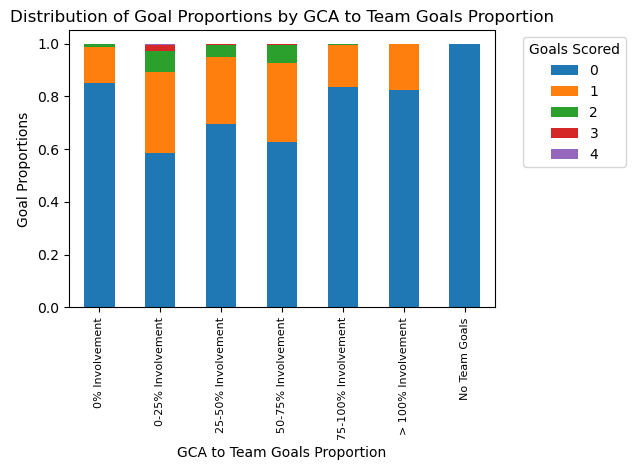

In [238]:
goals_by_gcateamgoalsprop = gca_teamgoals_df.groupby(['GCA Team Goals Prop', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_gcateamgoalsprop = goals_by_gcateamgoalsprop.div(goals_by_gcateamgoalsprop.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_gcateamgoalsprop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by GCA to Team Goals Proportion')
ax.set_xlabel('GCA to Team Goals Proportion')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

This plot shows that there is no real relationship that we can identify between the feature 'GCA to Team Goals Proportion' and the proportion of observations that recorded at least 1 goal. Surprisingly, the observations that recorded between 0 and 25% involvement (i.e. the observations whose number of GCA is only between 0 and 25% when divided by Team Goals) had the highest proportion of observations with at least 1 goal (just over 40%). This number then decreases, with only 20% of the observations that record between 75-100% involvement recording at least 1 goal. Given the conclusions from above, we expected the proportion of obsevations with at least 1 goal to increase as the GCA to Team Goals proportion increases. Clearly, this is not the case though. 

We can also have a quick look at the relationship between GCA to Team Goals Proportion and Assists. 

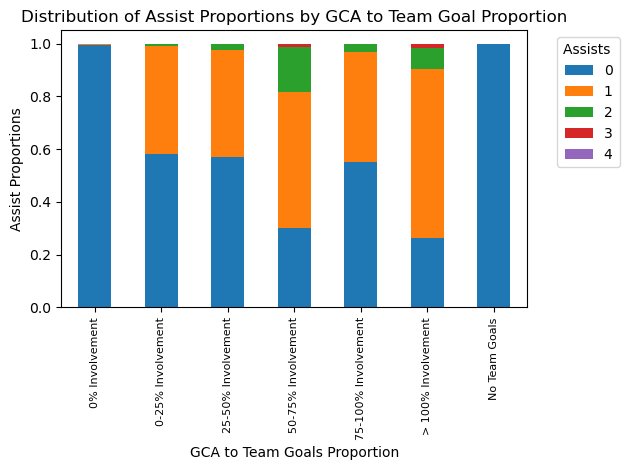

In [241]:
assists_by_gcateamgoalsprop = gca_teamgoals_df.groupby(['GCA Team Goals Prop', 'Assists']).size().unstack(fill_value = 0)
assistprop_by_gcateamgoalsprop = assists_by_gcateamgoalsprop.div(assists_by_gcateamgoalsprop.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

assistprop_by_gcateamgoalsprop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Assist Proportions by GCA to Team Goal Proportion')
ax.set_xlabel('GCA to Team Goals Proportion')
ax.set_ylabel('Assist Proportions')
ax.legend(title = 'Assists ', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Again, we don't really see a relationship between the GCA to Team Goals Proportion and Assists. Therefore, we can probably discard this feature. 

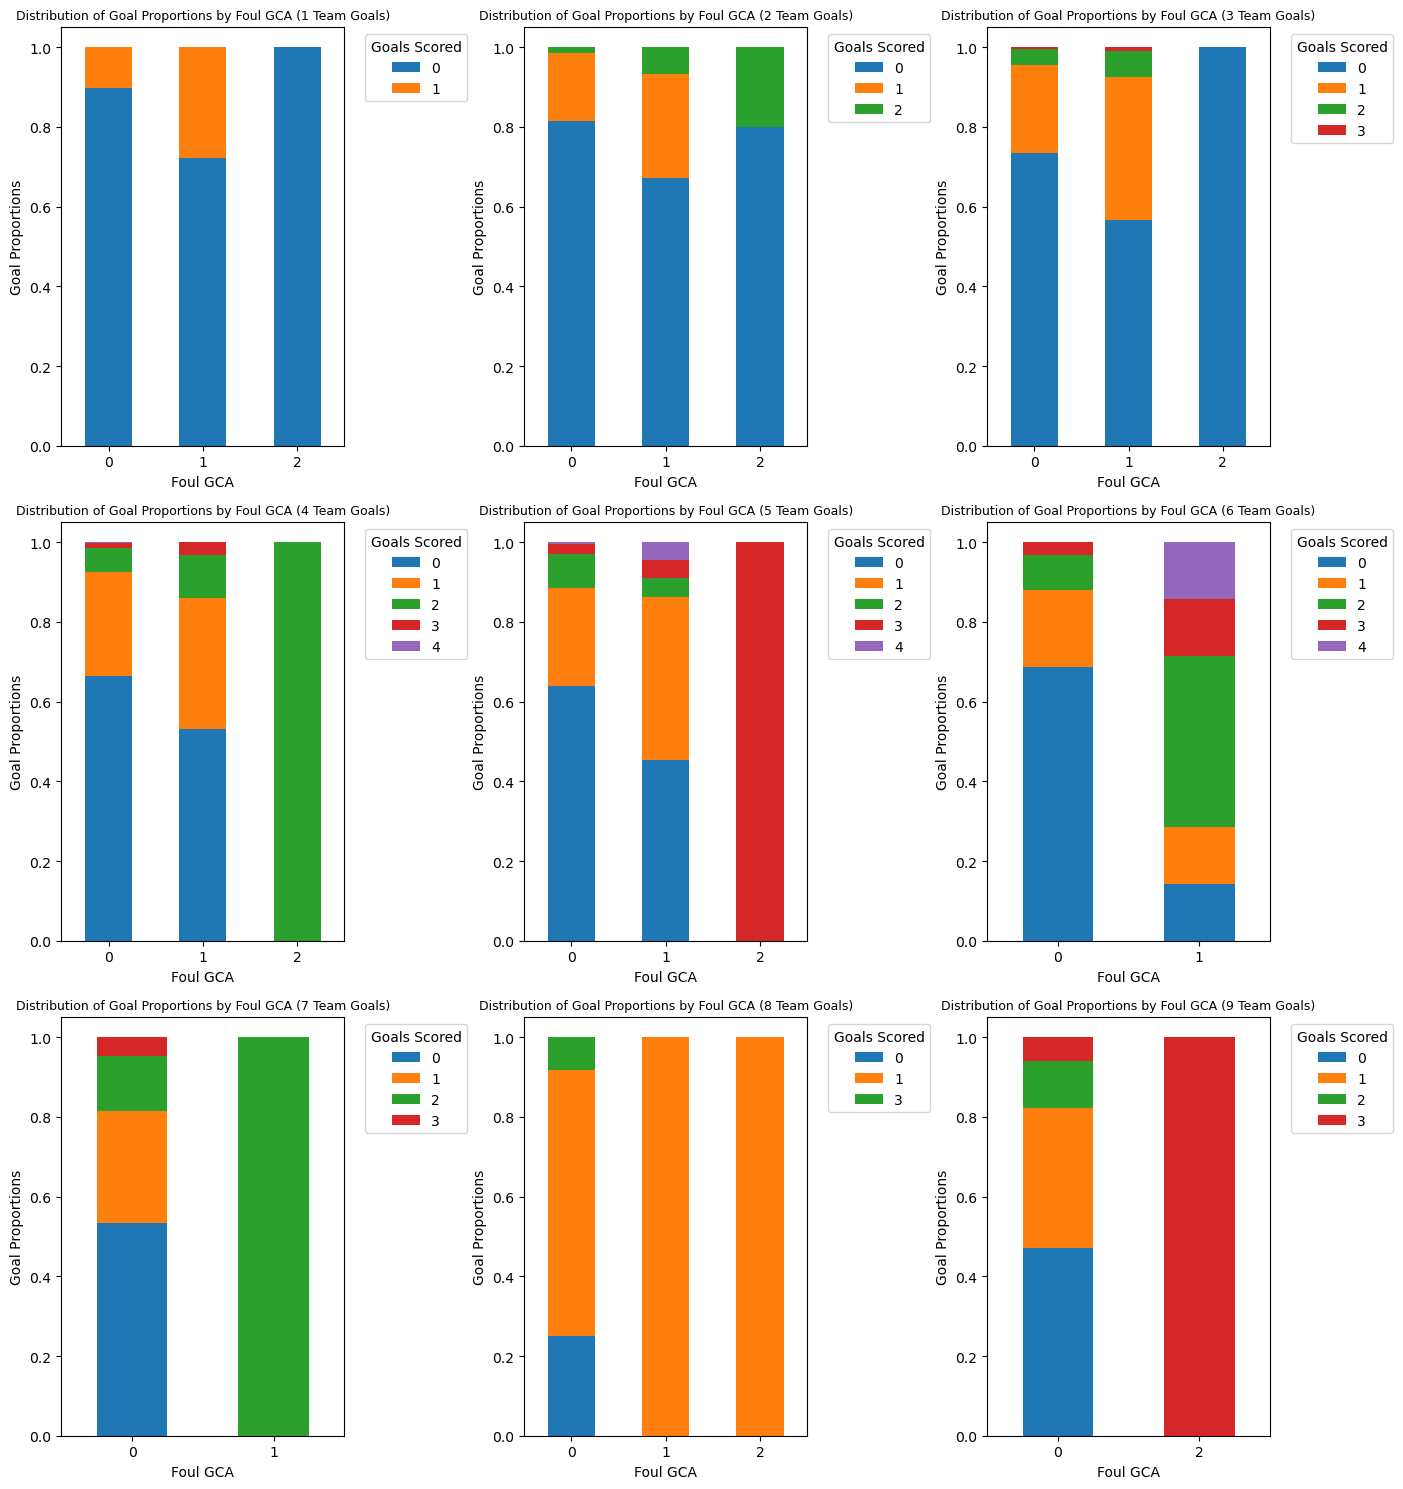

In [242]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Foul GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()